<a href="https://colab.research.google.com/github/Anant-Upadhyay/Machine_learning_WOC/blob/main/Anant_Upadhyay_ML_Bootcamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prerequisites

In [ ]:
#First we import all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Linear Regression**
In this part we will train a model linear regression model with multiple features

In [ ]:
#Now we load and print our training data
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/linear_train.csv") #Loading data from google drive
linear_train_data = np.array(df) #Converting loaded data in a matrix
X_train = linear_train_data[:,1:21] #Extracting X_train(Input data)
Y_train = linear_train_data[:,21] ##Extracting Y_train(Labels)
Y_train = Y_train.reshape(Y_train.size,1)
# Printing the first 5 rows of our loaded data
print("Input\n",X_train[:5])
print("labels\n",Y_train[:5])
print(X_train.shape)
print(Y_train.shape)

Input
 [[-2.84685568e+02  2.84567363e+02  1.84627063e+01  1.23804349e-02
  -5.23945804e+01 -9.42412935e-01  6.74619000e+00  1.95956259e+01
   5.54989342e+02  1.56015074e+03  7.24516543e+01  3.34519920e+01
  -9.17121371e+00  5.28122484e+02 -1.95959388e+03 -4.73485285e+01
   7.67129260e+02 -1.20010842e+01  8.39780551e+01  7.37317448e+02]
 [-4.28480005e+02  3.07240676e+02  2.26328973e+01 -9.96571386e-02
   6.29468547e+00  3.04407459e+01  9.59197746e+01 -5.24509925e+01
  -8.72531179e+02  1.54493351e+03  1.37910992e+02  1.48483314e+01
  -3.35568666e+01 -5.69261772e+02 -2.01446309e+03  2.00421324e+01
   7.69298704e+02  1.80573704e+01 -5.55216301e+01  7.75407458e+02]
 [-2.58008787e+01  2.37433758e+02 -4.67504670e-01 -1.15813166e-01
  -7.83707930e+00  2.15989215e+01  1.58095089e+02  2.55439748e+00
   1.36298244e+02  1.55070566e+03  9.15344488e+01 -1.26624490e+01
   2.89563090e+01  1.06950459e+03 -1.93252477e+03  1.84196836e+01
   7.81523541e+02  7.06526251e+01  3.02121708e+02  8.10402101e+02]


## Creating the model
As we are making a linear model, we will first initialize a random array **w** having n = 20 features and a random scalar value **b**

In [ ]:
# Initialize initial w and b (having small values)
np.random.seed(1) #Used so that we get the same random state on multiple executions of code
w_initial = 0.01*(np.random.randn(20,1)-0.5)
b_initial = np.random.randn()
print(w_initial)
print(b_initial)

[[ 0.01124345]
 [-0.01111756]
 [-0.01028172]
 [-0.01572969]
 [ 0.00365408]
 [-0.02801539]
 [ 0.01244812]
 [-0.01261207]
 [-0.00180961]
 [-0.0074937 ]
 [ 0.00962108]
 [-0.02560141]
 [-0.00822417]
 [-0.00884054]
 [ 0.00633769]
 [-0.01599891]
 [-0.00672428]
 [-0.01377858]
 [-0.00457786]
 [ 0.00082815]]
-1.1006191772129212


##Predict function
We know f_wb is given as f_wb = **w** * **x** + b
Here we create a predict function to make a prediction on the given data


In [ ]:
def predict(X,w,b):
  """
  Arguments
  X(2D numpy array of training examples) Shape(m,n)
  w(numpy array of model parameters) Shape(n,1)
  b(model parameter) scalar 
  """
  m,n = X.shape
  a = np.matmul(X,w)
  a = a.reshape(m,1)
  f_wb = a + b
  return f_wb

Now lets test our model on the first 5 training examples of our data

In [ ]:
  f_wb = predict(X_train[:5],w_initial,b_initial)
  print("Prediction:-\n",f_wb)
  print("Expected Output:-\n",Y_train[:5])

Prediction:-
 [[-41.86049   ]
 [-29.89561446]
 [-42.56027805]
 [-32.59871104]
 [-25.32883862]]
Expected Output:-
 [[-218.01623149]
 [ 154.14084898]
 [ 394.84970115]
 [ -83.93218298]
 [-120.6403571 ]]


##Computing Cost
As you can see the prediction is far off from the expected output so now we compute the cost function , as a metric to measure how far off is our model from the training examples 

In [ ]:
def compute_cost(X,Y,w,b):
  """
   Arguments
   X(2-D numpy array containing the training examples) Shape(m,n)
   Y(1-D numpy array containing the output label of all the training examples) Shape(m,1)
   w(numpy array of model parameters) Shape(n,1)
   b(model parameter) scalar 
  """
  m = len(Y) #Getting the number of training examples
  f_wb = predict(X,w,b)
  err = (f_wb - Y)**2
  err = err.reshape(m,1)
  cost = np.sum(err) # specific cost for each training example is added and divided by 2m to give final cost
  cost = cost/(2*m)
  return cost

Computing Cost of our initial prediction:

In [ ]:
J = compute_cost(X_train,Y_train,w_initial,b_initial)
print("Cost:",J)

Cost: 31167.228610995036


##Gradient descent
After knowing the cost of the model we know define a function to reduce the cost using gradient descent

In [ ]:
def gradient_descent(X,Y,w_in,b_in,alpha,iters,predict,compute_cost):
  
  J_history = [] #We create a list containg cost after every iteration(For later plotting and analysis)
  w = w_in.copy() 
  b = b_in
  m,n = X.shape #Getting the number of training examples
  for i in range(iters):
    #Compute gradient dj_dw and dj_db
    f_wb = predict(X,w,b)
    err = f_wb - Y
    dj_dw = (np.matmul(err.T,X).T)/m
    dj_db = np.sum(err)/m 
    #Update parameters w,b (Simultaneously)
    w = w-alpha*dj_dw
    b = b-alpha*dj_db
    #Record Cost J after every iteration
    J_history.append(compute_cost(X, Y, w, b)) #Add the current cost to J_history
    # Print cost after interval of 10 times,[-1] refers to the last element(reverse indexing)
    if i%(np.math.ceil(iters / 10)) == 0:
      print("Iteration :",i," Cost :",J_history[-1]) #F-strings used to encode variables i and J_history  
  return w, b, J_history #return final w,b and J_history(for graphing)

##Tuning Hyperparameters

###Choosing the learning rate(alpha)
Let's start by choosing the learning rate alpha by trying 3 examples 1e-7 , 1e-8 and 1e-6 and see which fits best

Iteration : 0  Cost : 30429.49411572381
Iteration : 100  Cost : 24474.5846484354
Iteration : 200  Cost : 23704.91041353227
Iteration : 300  Cost : 23299.7804772362
Iteration : 400  Cost : 22986.490959004383
Iteration : 500  Cost : 22706.697431558394
Iteration : 600  Cost : 22444.770551590544
Iteration : 700  Cost : 22194.776257932306
Iteration : 800  Cost : 21953.613984512915
Iteration : 900  Cost : 21719.37006320191


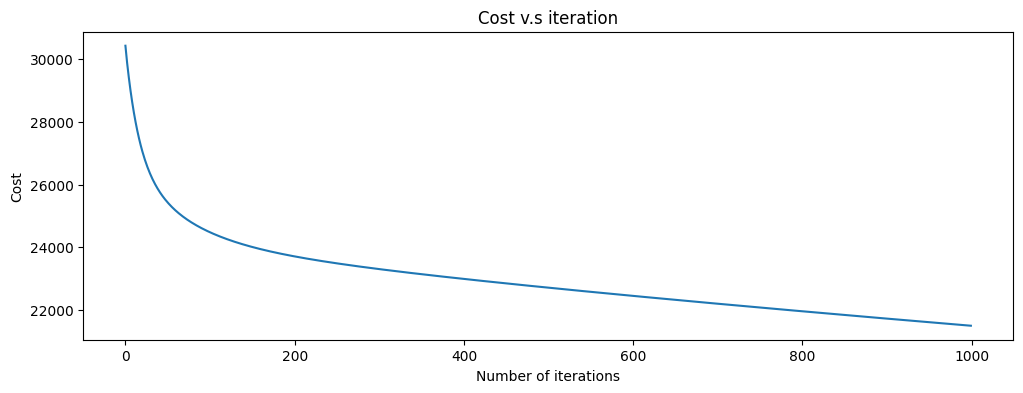

In [ ]:
##For alpha = 1e-7
w_final,b_final,J_history = gradient_descent(X_train,Y_train,w_initial,b_initial,0.0000001,1000,predict,compute_cost)
plt.figure(figsize=(12,4))
plt.plot(J_history)
plt.title("Cost v.s iteration")
plt.ylabel("Cost")
plt.xlabel("Number of iterations")
plt.show()

Iteration : 0  Cost : 49693.987059627514
Iteration : 10  Cost : 7.085125994836758e+20
Iteration : 20  Cost : 2.337203463241347e+37
Iteration : 30  Cost : 7.709841762261004e+53
Iteration : 40  Cost : 2.54328135885385e+70
Iteration : 50  Cost : 8.389640500736549e+86
Iteration : 60  Cost : 2.7675297303055327e+103
Iteration : 70  Cost : 9.129379032930672e+119
Iteration : 80  Cost : 3.011550720277649e+136
Iteration : 90  Cost : 9.93434242141809e+152


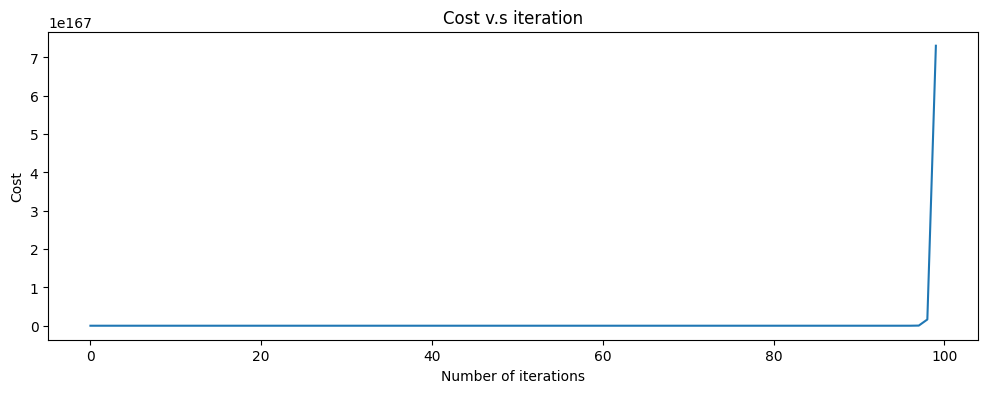

In [ ]:
# Now trying for alpha = 1e-6 and reduce the number of iterations to 100 (will be justified)
w_final,b_final,J_history = gradient_descent(X_train,Y_train,w_initial,b_initial,0.000001,100,predict,compute_cost)
plt.figure(figsize=(12,4))
plt.plot(J_history)
plt.title("Cost v.s iteration")
plt.ylabel("Cost")
plt.xlabel("Number of iterations")
plt.show()

As you can see the model is clearly overshooting,the cost keeps on increasing , so we can conclude the learning rate is too high and we don't need to go above 100 iterations

Iteration : 0  Cost : 31067.551058066565
Iteration : 100  Cost : 28460.01701920383
Iteration : 200  Cost : 27166.968790863208
Iteration : 300  Cost : 26365.230184575106
Iteration : 400  Cost : 25835.782607408404
Iteration : 500  Cost : 25462.172459563346
Iteration : 600  Cost : 25181.698460515905
Iteration : 700  Cost : 24959.95015547023
Iteration : 800  Cost : 24777.508492128745
Iteration : 900  Cost : 24622.983586375318


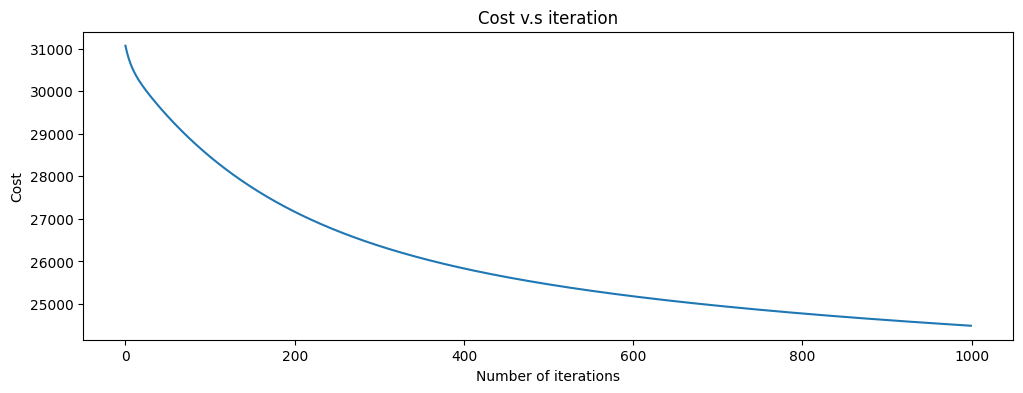

In [ ]:
# Now trying for alpha = 1e-8 
w_final,b_final,J_history = gradient_descent(X_train,Y_train,w_initial,b_initial,0.00000001,1000,predict,compute_cost)
plt.figure(figsize=(12,4))
plt.plot(J_history)
plt.title("Cost v.s iteration")
plt.ylabel("Cost")
plt.xlabel("Number of iterations")
plt.show()

As you can see after some iterations the the decrease in the cost function decreases very slowly,although higher number of iterations might further decrease the cost function it would be computationaly intesive and higher learning rate might lead to faster convergence.

From the above results we can conclude the learning rate 1e-7 is ideal for our model

###Deciding the number of iterations
Let's try 3 different combinations, no.of iteration = 100 ,1000 and 10000,100000 and measure performance in each of the 4 test cases

Iteration : 0  Cost : 30429.49411572381
Iteration : 10  Cost : 28293.829498763476
Iteration : 20  Cost : 27057.46265113693
Iteration : 30  Cost : 26291.098754623443
Iteration : 40  Cost : 25783.63915187524
Iteration : 50  Cost : 25423.802333180116
Iteration : 60  Cost : 25152.12688093084
Iteration : 70  Cost : 24936.177160593015
Iteration : 80  Cost : 24757.716264641473
Iteration : 90  Cost : 24606.054150426713


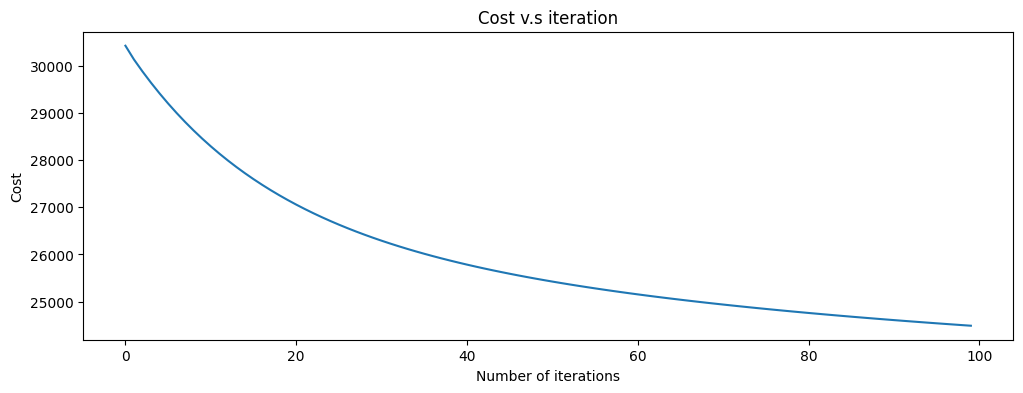

In [ ]:
##For 100 iterations
w_final,b_final,J_history = gradient_descent(X_train,Y_train,w_initial,b_initial,0.0000001,100,predict,compute_cost)
plt.figure(figsize=(12,4))
plt.plot(J_history)
plt.title("Cost v.s iteration")
plt.ylabel("Cost")
plt.xlabel("Number of iterations")
plt.show()

Here it seems the function could still be decreasing further and might yield better results at higher number of iterations

Iteration : 0  Cost : 30429.49411572381
Iteration : 100  Cost : 24474.5846484354
Iteration : 200  Cost : 23704.91041353227
Iteration : 300  Cost : 23299.7804772362
Iteration : 400  Cost : 22986.490959004383
Iteration : 500  Cost : 22706.697431558394
Iteration : 600  Cost : 22444.770551590544
Iteration : 700  Cost : 22194.776257932306
Iteration : 800  Cost : 21953.613984512915
Iteration : 900  Cost : 21719.37006320191


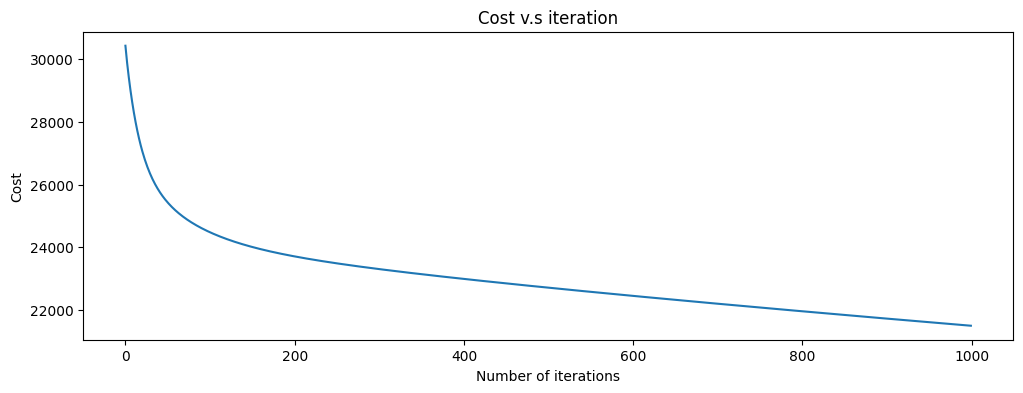

In [ ]:
##For 1000 iterations
w_final,b_final,J_history = gradient_descent(X_train,Y_train,w_initial,b_initial,0.0000001,1000,predict,compute_cost)
plt.figure(figsize=(12,4))
plt.plot(J_history)
plt.title("Cost v.s iteration")
plt.ylabel("Cost")
plt.xlabel("Number of iterations")
plt.show()

Here it seems that the cost function has pretty much converged, however let's zoom in to the tail end of the plot

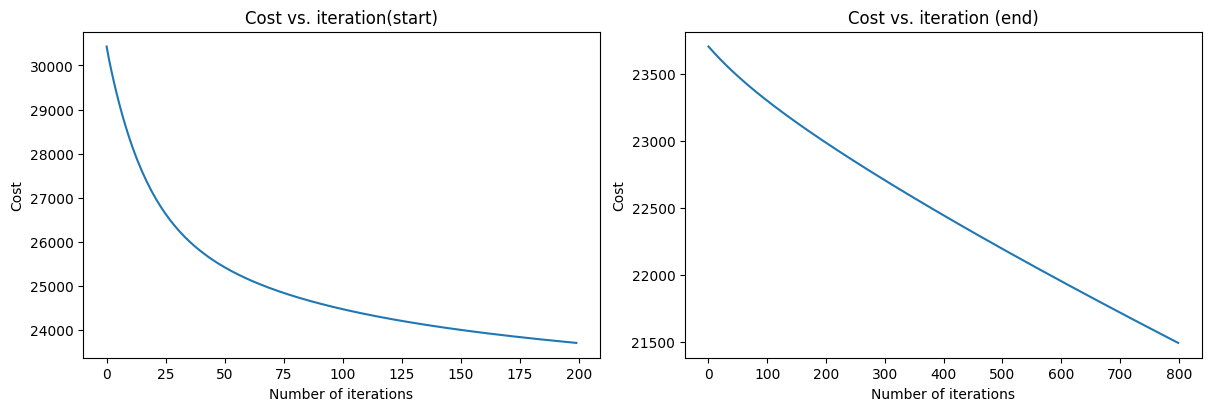

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4)) #We create 2 subplots ax1 and ax2 to see the cost at start and end
ax1.plot(J_history[:200]) #1st subplot plots till the first 100 examples
ax2.plot(J_history[200:]) #2nd subplot plots on the examples after 200 iterations
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('Number of iterations')  ;  ax2.set_xlabel('Number of iterations') 
plt.show()

It seems the cost function could further decrease if we increased the number of iterations. Let's try 10000 iterations

Iteration : 0  Cost : 30429.49411572381
Iteration : 1000  Cost : 21490.786134112168
Iteration : 2000  Cost : 19412.69048024698
Iteration : 3000  Cost : 17621.106734141526
Iteration : 4000  Cost : 16067.89579331466
Iteration : 5000  Cost : 14719.450781794985
Iteration : 6000  Cost : 13547.172241636512
Iteration : 7000  Cost : 12526.600751086371
Iteration : 8000  Cost : 11636.803352650333
Iteration : 9000  Cost : 10859.853773672105


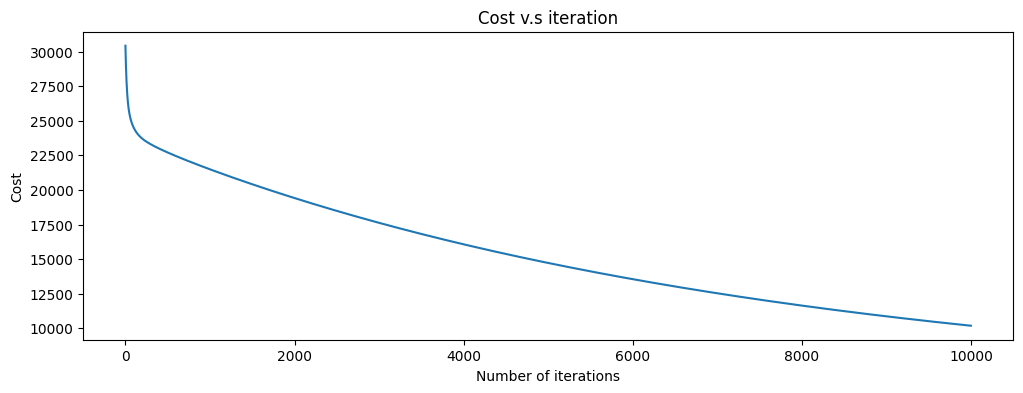

In [ ]:
##For 10000 iterations
w_final,b_final,J_history = gradient_descent(X_train,Y_train,w_initial,b_initial,0.0000001,10000,predict,compute_cost)
plt.figure(figsize=(12,4))
plt.plot(J_history)
plt.title("Cost v.s iteration")
plt.ylabel("Cost")
plt.xlabel("Number of iterations")
plt.show()

As we can see that our cost function has come down significantly lets try to go even higher and run our model for 100,000 iterations and see the improvements

Iteration : 0  Cost : 30429.49411572381
Iteration : 10000  Cost : 10180.390247302823
Iteration : 20000  Cost : 6591.018493802885
Iteration : 30000  Cost : 5480.23047135839
Iteration : 40000  Cost : 5078.091577298504
Iteration : 50000  Cost : 4914.3013648467095
Iteration : 60000  Cost : 4842.0053088313
Iteration : 70000  Cost : 4808.153405037613
Iteration : 80000  Cost : 4791.4728975238295
Iteration : 90000  Cost : 4782.83848383028


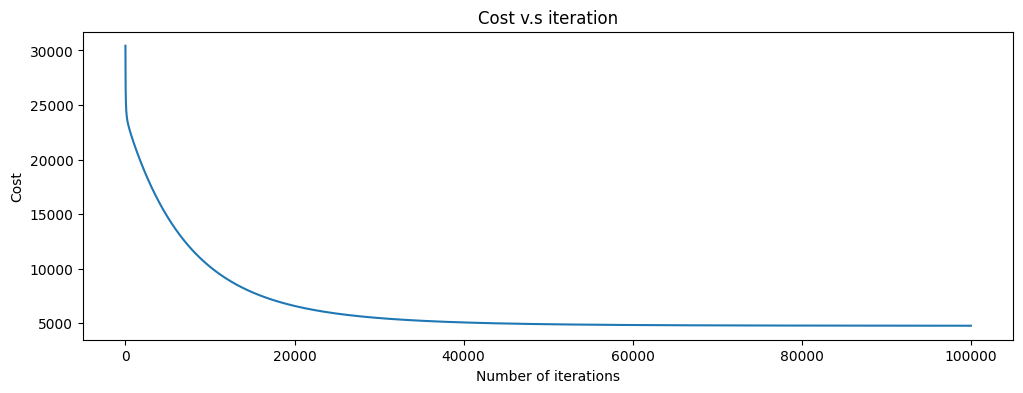

In [ ]:
##For 100000 iterations
w_final,b_final,J_history = gradient_descent(X_train,Y_train,w_initial,b_initial,0.0000001,100000,predict,compute_cost)
plt.figure(figsize=(12,4))
plt.plot(J_history)
plt.title("Cost v.s iteration")
plt.ylabel("Cost")
plt.xlabel("Number of iterations")
plt.show()

Now we will take the pretrained parameters w and b and again run gradient descent for 100,000 iterations to see if the cost further decreases significantly

Iteration : 0  Cost : 4778.148046328766
Iteration : 10000  Cost : 4775.482544835986
Iteration : 20000  Cost : 4773.907032805037
Iteration : 30000  Cost : 4772.9455313991
Iteration : 40000  Cost : 4772.344209171294
Iteration : 50000  Cost : 4771.961362302222
Iteration : 60000  Cost : 4771.714520592932
Iteration : 70000  Cost : 4771.553977578403
Iteration : 80000  Cost : 4771.448939260724
Iteration : 90000  Cost : 4771.379934313564


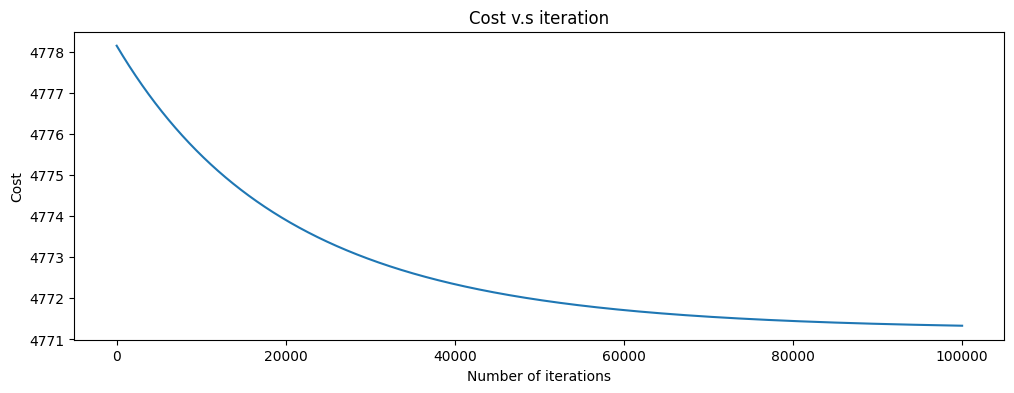

In [ ]:
#Using pretrained parameters we run the gradient descent for another 100000 iterations
w_final,b_final,J_history = gradient_descent(X_train,Y_train,w_final,b_final,0.0000001,100000,predict,compute_cost)
plt.figure(figsize=(12,4))
plt.plot(J_history)
plt.title("Cost v.s iteration")
plt.ylabel("Cost")
plt.xlabel("Number of iterations")
plt.show()

We can see the cost function saturates and after a point,and there is no point in having higher number of iterations

###Visualization of parameters
Here we will plot 20 different plots depicting the ith feature of X against the output label y(Predicted by our model) and we will also show the actual training data on the plot. 

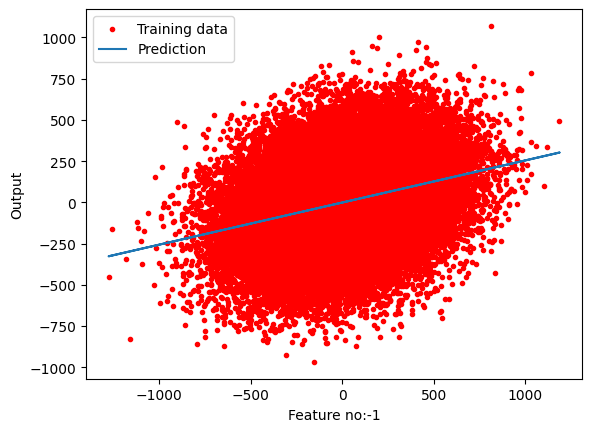

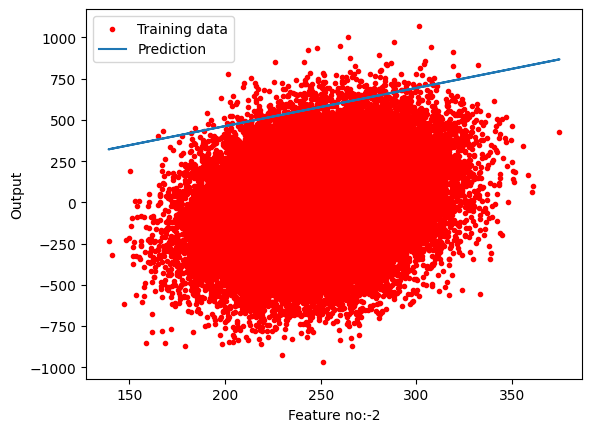

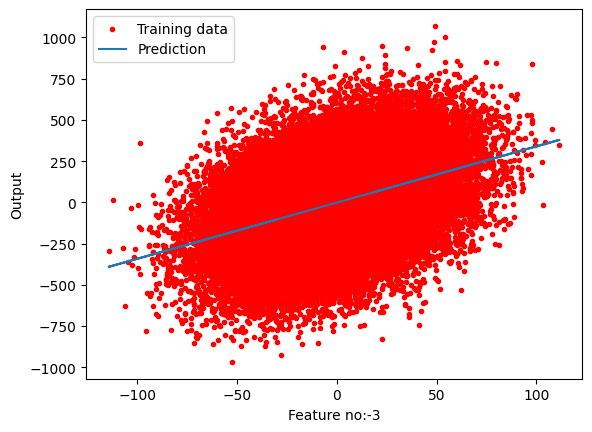

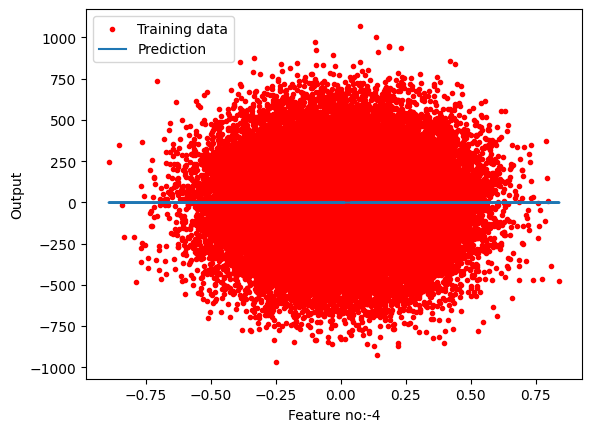

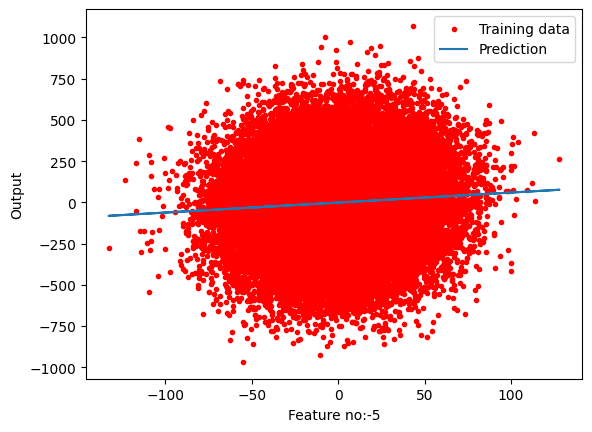

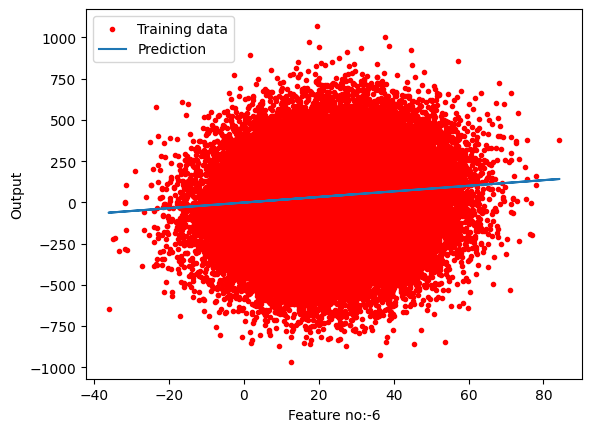

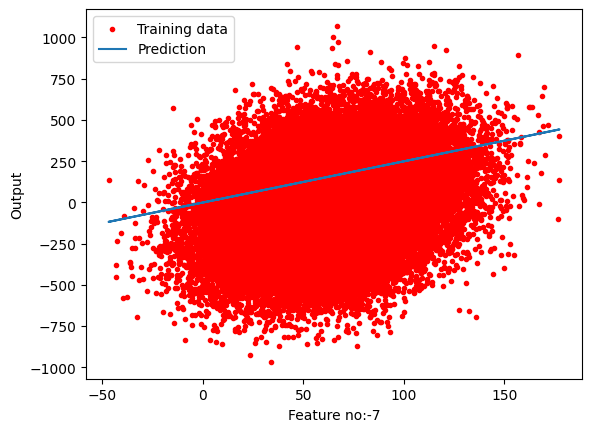

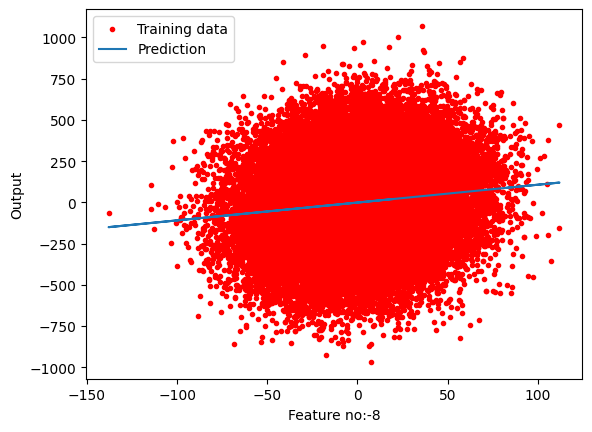

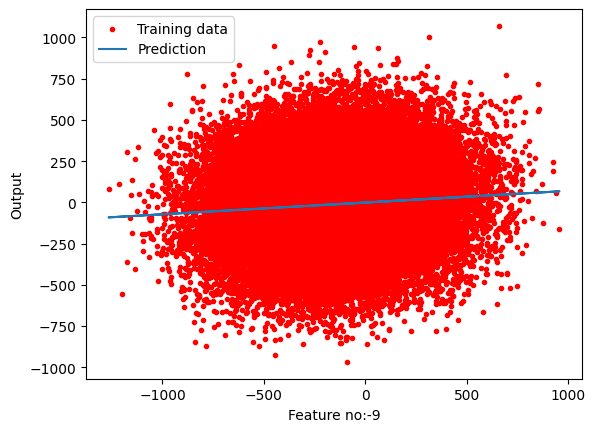

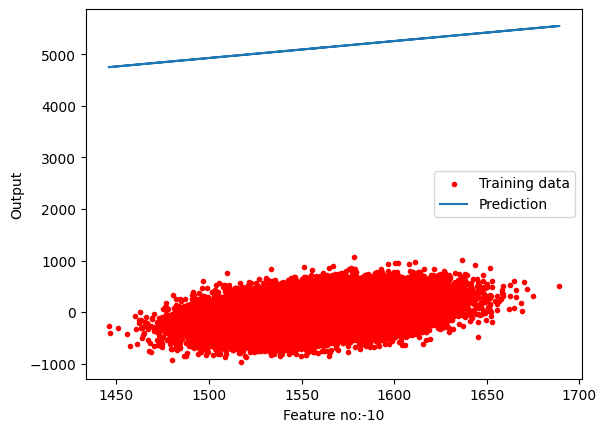

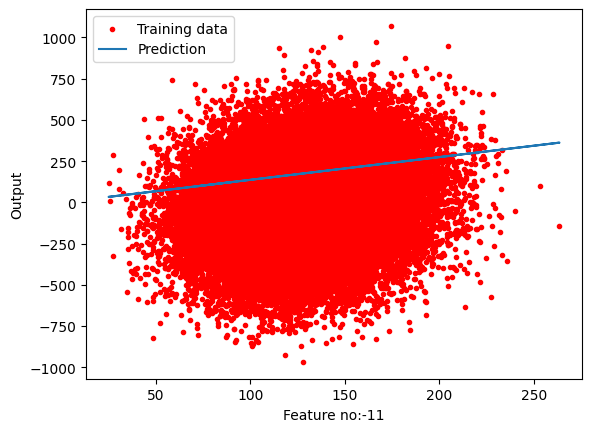

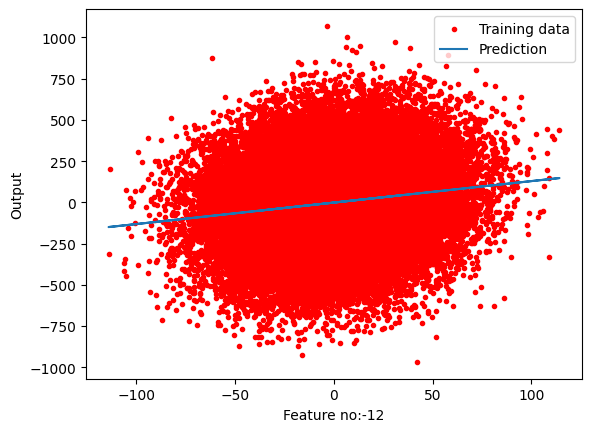

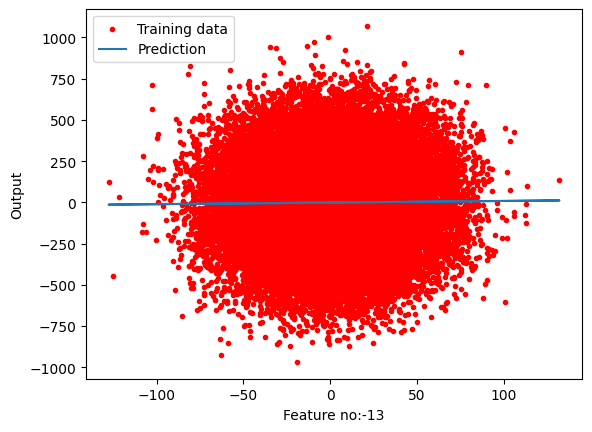

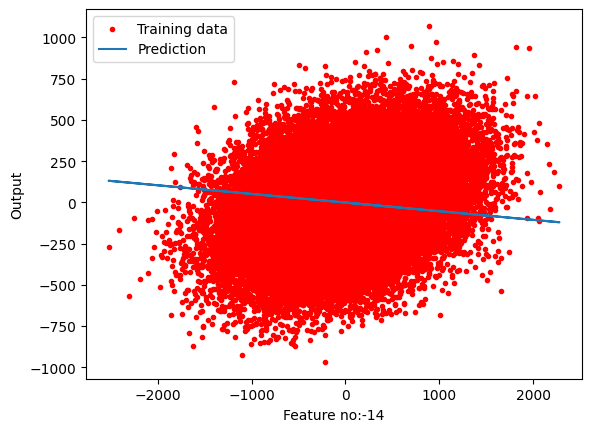

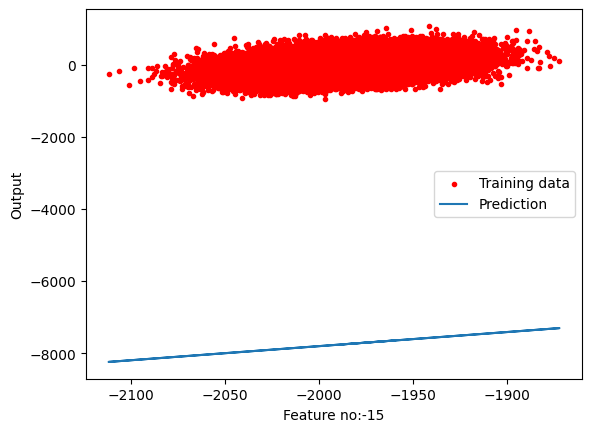

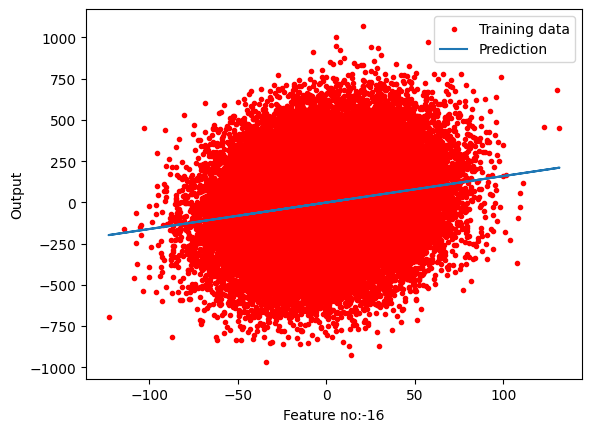

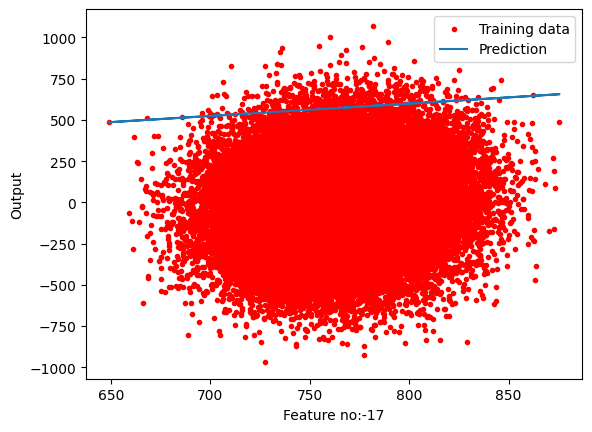

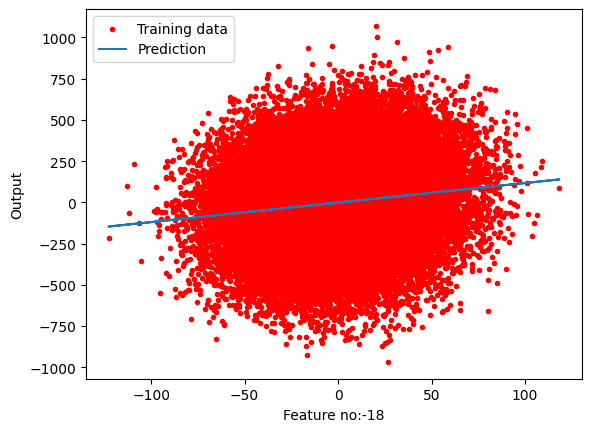

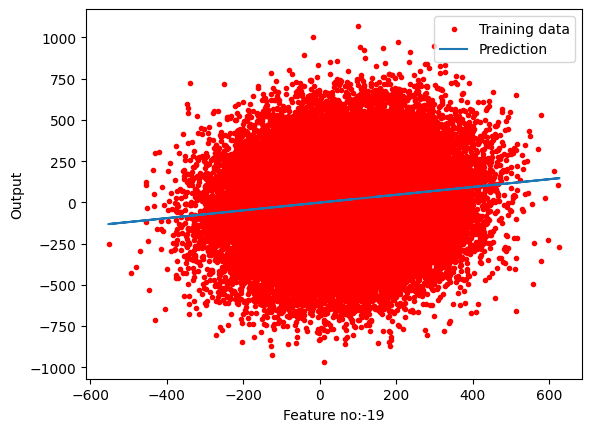

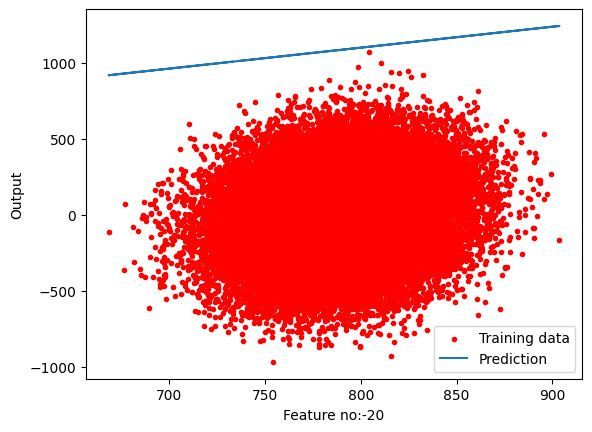

In [ ]:
for i in range(20):
  plt.scatter(X_train[:,i],Y_train, marker='.',c='r',label="Training data")
  plt.xlabel(f"Feature no:-{i+1}")
  plt.ylabel("Output")
  a = np.zeros(20)
  a[i] = 1
  a = a.reshape(20,1)
  f_wb = predict(X_train,a*w_final,b_final)
  plt.plot(X_train[:,i],f_wb,label="Prediction")
  plt.legend()
  plt.show()

##Feature scaling
Taking a closer look at the data we find out that the data in X_train is spread across a huge range (from near 0 to upto 1000).It seems that applying z-score normalization to all the features of x will allow it to come under similar ranges and hence give us a better chance at making more accurate predictions.(**Note:- Even the test data must be z-score normalized before being used as input for the model**)

In [ ]:
def z_score_normalization(X):
  """
  Arguments
  X(the input data which is to be normalized): Shape (m,n) 
  """
  # First get no.of training examples and features
  m,n = (X).shape
  mean = np.sum(X,axis=0)/m #Has the mean of each of the n features stored in a 1-D array
  mean = mean.reshape(1,-1)
  sq_X = X**2 #Squares the matrix(element wise)
  sq_mean = np.sum(sq_X,axis=0)/m #Mean of each of the n features in the squared matrix
  sq_mean = sq_mean.reshape(1,-1)
  std_dev = np.sqrt(sq_mean - (mean)**2) #Formula for standard deviation
  std_dev = std_dev.reshape(1,-1)
  ##Finally the normalized data can be written as
  X_normalized = (X - mean)/std_dev #here broadcasting is used to make these operations possible 
  return X_normalized, mean, std_dev

Let's print the first 5 rows of our new normalized data!!

In [ ]:
X_train_normalized,u,s = z_score_normalization(X_train)
print("Data:-",X_train_normalized[:5])
print("Mean:-",u)
print("std_dev:-",s)

Data:- [[-9.97229965e-01  1.20760112e+00  6.47141731e-01  5.58979636e-02
  -1.82633253e+00 -1.66062592e+00 -1.97997505e+00  6.92966534e-01
   2.45635721e+00  1.15316986e-03 -2.01506848e+00  1.17952361e+00
  -3.21477112e-01  9.29032750e-01  9.29032750e-01 -1.65097309e+00
   7.79641579e-02 -4.23566850e-01  1.47061762e-01 -1.81833211e+00]
 [-1.50051622e+00  2.00042615e+00  7.92971133e-01 -4.64416390e-01
   2.24844480e-01  5.21365212e-01  1.14846851e+00 -1.82080832e+00
  -2.52310984e+00 -5.32708976e-01  2.75708674e-01  5.29524455e-01
  -1.17286557e+00 -9.94084367e-01 -9.94084367e-01  6.97648543e-01
   1.53589938e-01  6.28584832e-01 -8.31581001e-01 -4.80629454e-01]
 [-9.11232394e-02 -4.40534845e-01 -1.48378631e-02 -5.39446690e-01
  -2.69057609e-01 -9.33843247e-02  3.32974183e+00  9.83819090e-02
   9.95881864e-01 -3.30206209e-01 -1.34725803e+00 -4.31683365e-01
   1.00968809e+00  1.87778082e+00  1.87778082e+00  6.41104828e-01
   5.79741858e-01  2.46960382e+00  1.67742154e+00  7.48365418e-01]


As you can see after normalization most of our training data belongs to the range -3 to 3 which makes gradient descent much easier.Let's train our model on the new normalized data!!

Iteration : 0  Cost : 30303.974745609376
Iteration : 1000  Cost : 7858.4962406842
Iteration : 2000  Cost : 5182.9676586294445
Iteration : 3000  Cost : 4825.919994384202
Iteration : 4000  Cost : 4777.42426038801
Iteration : 5000  Cost : 4770.814082523763
Iteration : 6000  Cost : 4769.911641160794
Iteration : 7000  Cost : 4769.788272408096
Iteration : 8000  Cost : 4769.771385440786
Iteration : 9000  Cost : 4769.76907097626


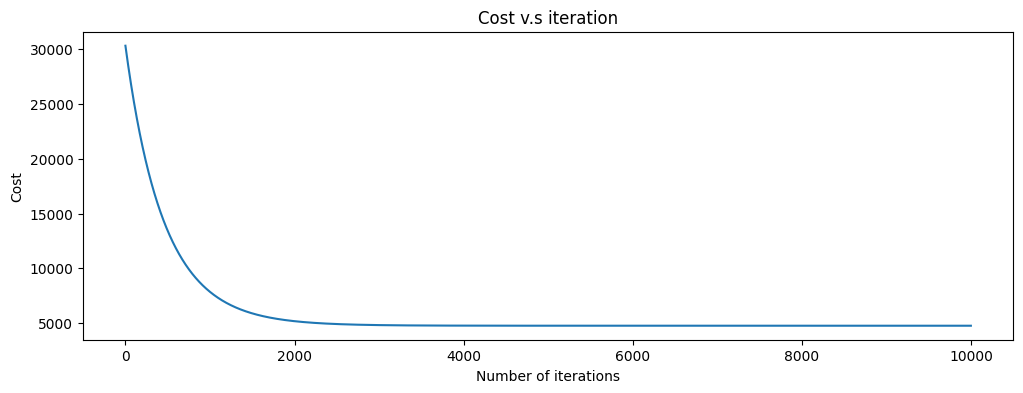

In [ ]:
#Training the model on 10000 iterations
w_final,b_final,J_history = gradient_descent(X_train_normalized,Y_train,w_initial,b_initial,0.001,10000,predict,compute_cost)
plt.figure(figsize=(12,4))
plt.plot(J_history)
plt.title("Cost v.s iteration")
plt.ylabel("Cost")
plt.xlabel("Number of iterations")
plt.show()

The cost decreases very slowly in the end so we will try a higher learning rate

Iteration : 0  Cost : 24955.797841402516
Iteration : 1000  Cost : 4769.768702764219
Iteration : 2000  Cost : 4769.768702764219
Iteration : 3000  Cost : 4769.768702764219
Iteration : 4000  Cost : 4769.768702764219
Iteration : 5000  Cost : 4769.768702764219
Iteration : 6000  Cost : 4769.768702764219
Iteration : 7000  Cost : 4769.768702764219
Iteration : 8000  Cost : 4769.768702764219
Iteration : 9000  Cost : 4769.768702764219


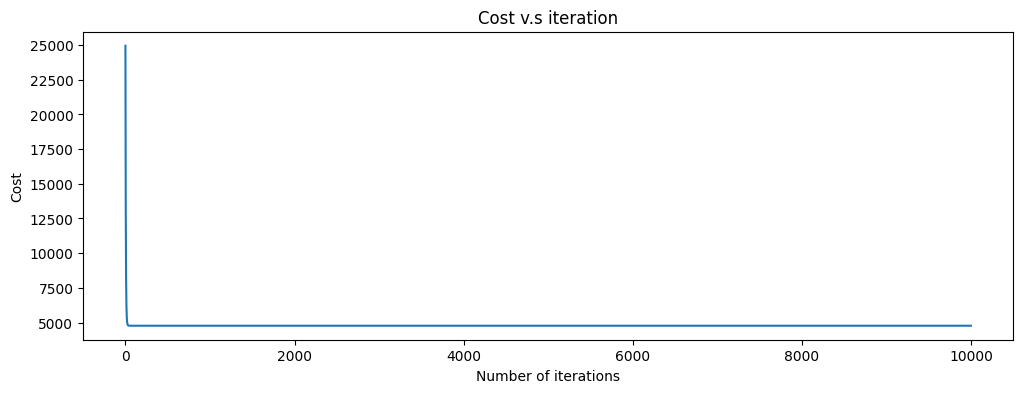

In [ ]:
w_final,b_final,J_history = gradient_descent(X_train_normalized,Y_train,w_initial,b_initial,0.1,10000,predict,compute_cost)
plt.figure(figsize=(12,4))
plt.plot(J_history)
plt.title("Cost v.s iteration")
plt.ylabel("Cost")
plt.xlabel("Number of iterations")
plt.show()

In [ ]:
print(w_final)
print(b_final)

[[72.99699525]
 [66.2490529 ]
 [97.4425186 ]
 [ 1.71779334]
 [17.36335083]
 [24.81613091]
 [71.23331344]
 [30.9955866 ]
 [20.35046335]
 [93.74922464]
 [39.36887221]
 [37.25519822]
 [ 2.82784069]
 [40.69356269]
 [40.70874093]
 [46.08723061]
 [21.51569207]
 [33.84608326]
 [33.68446217]
 [39.24757584]]
-0.36565073493115813


###Visualizing model after feature scaling

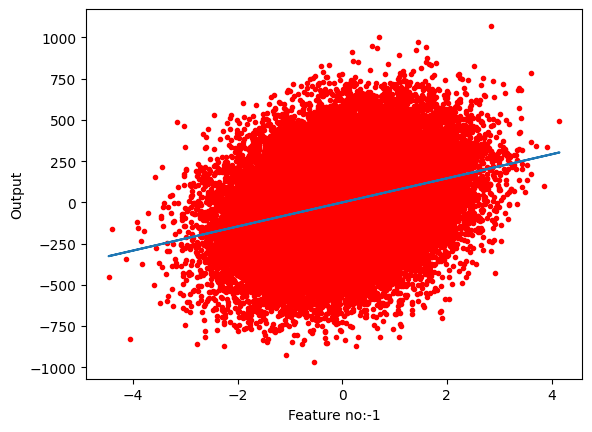

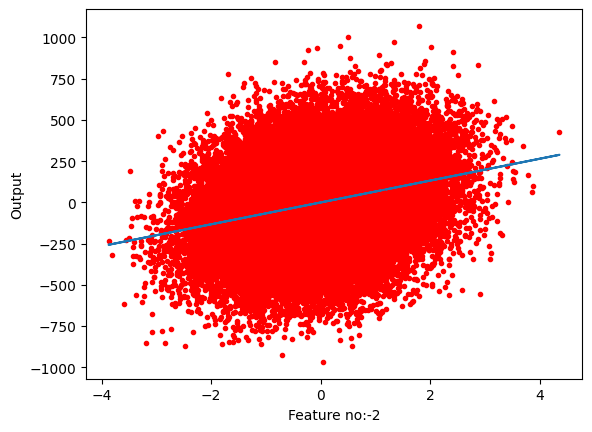

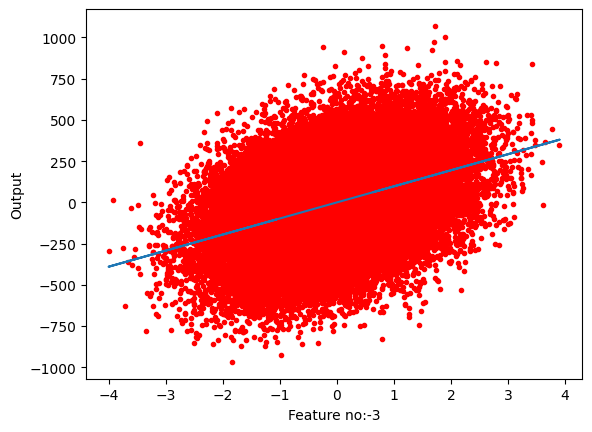

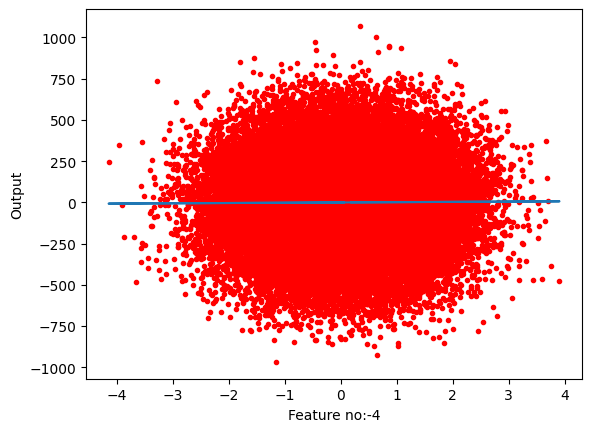

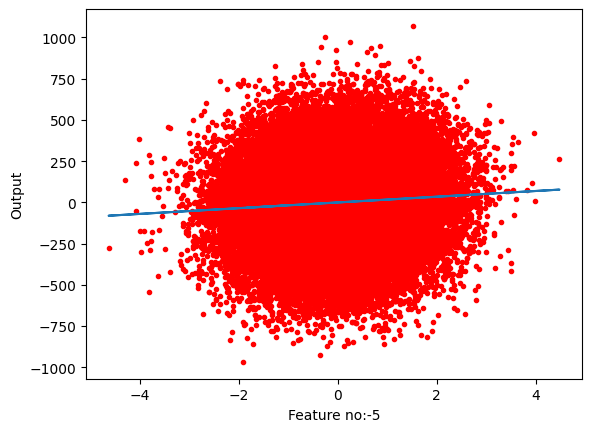

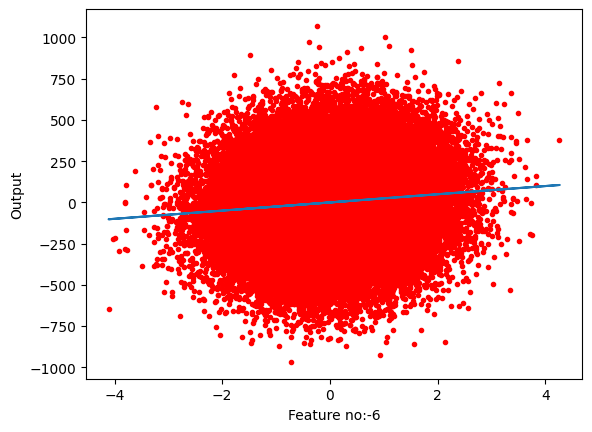

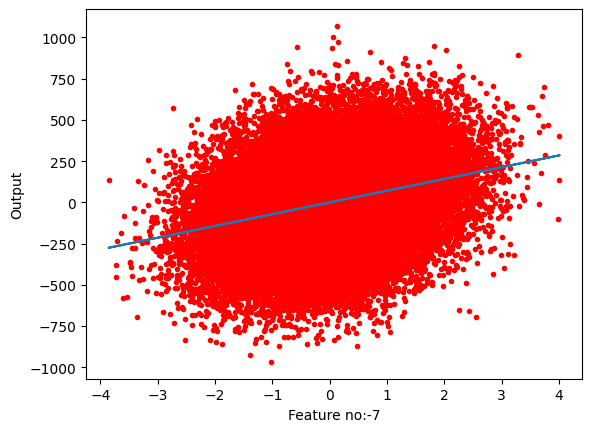

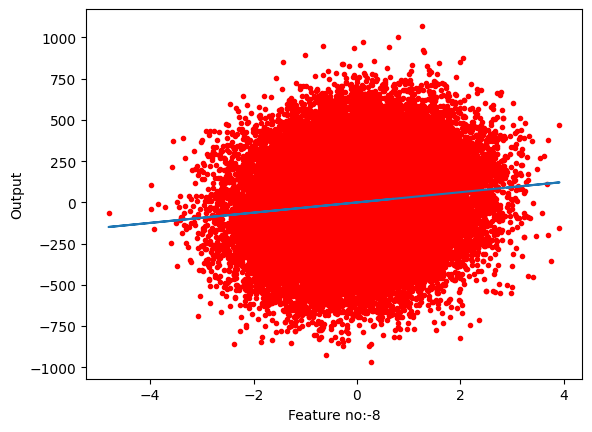

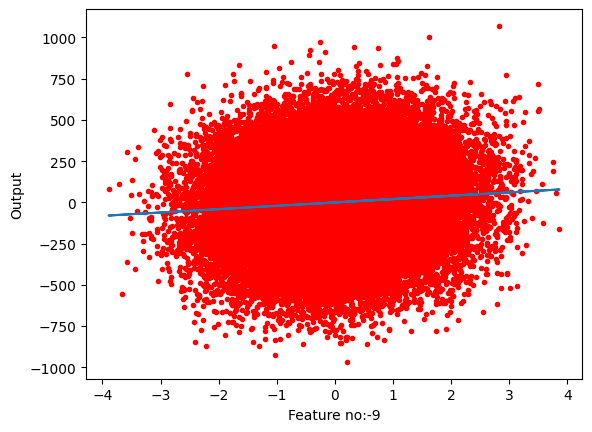

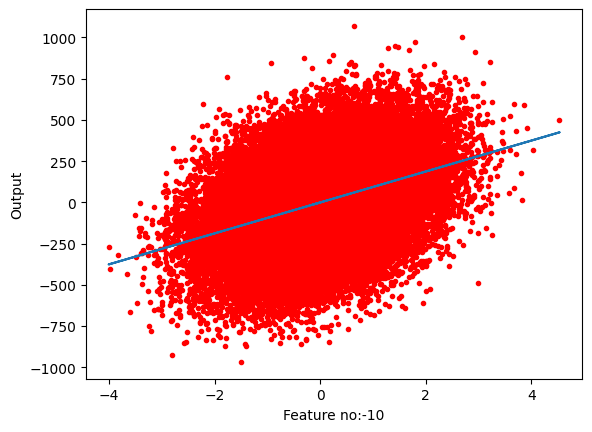

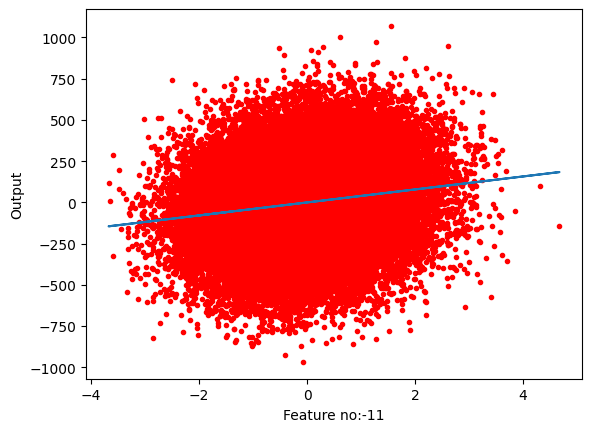

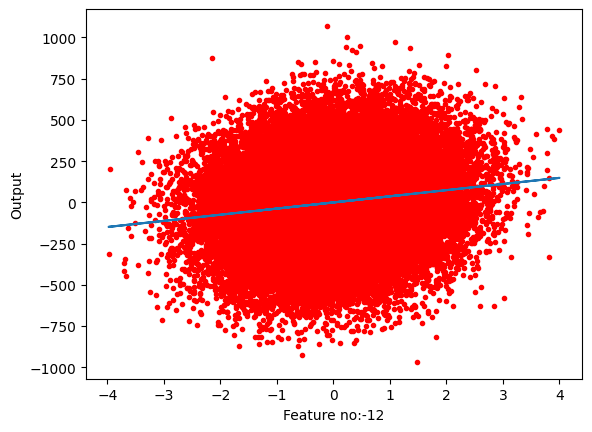

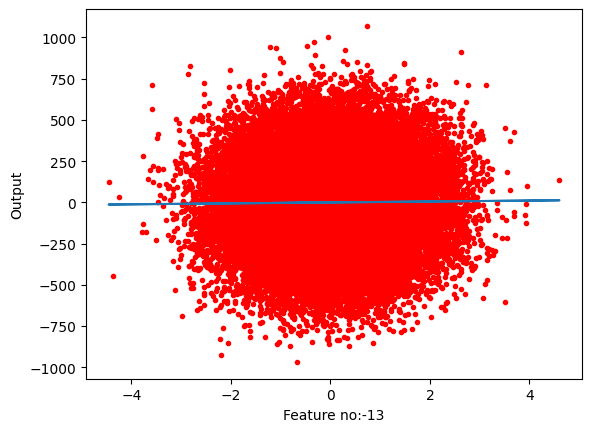

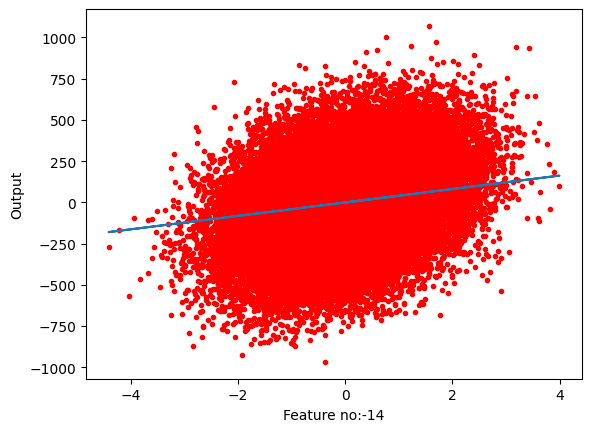

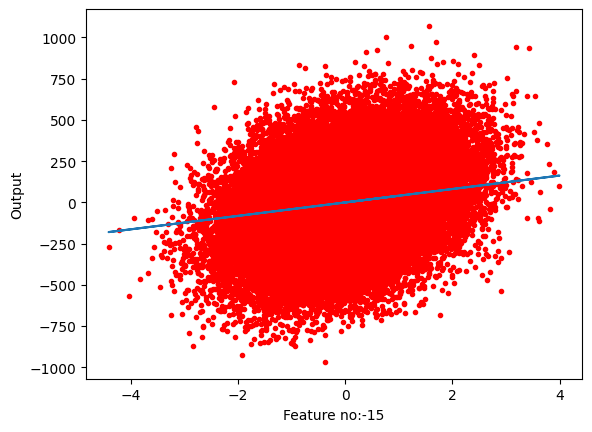

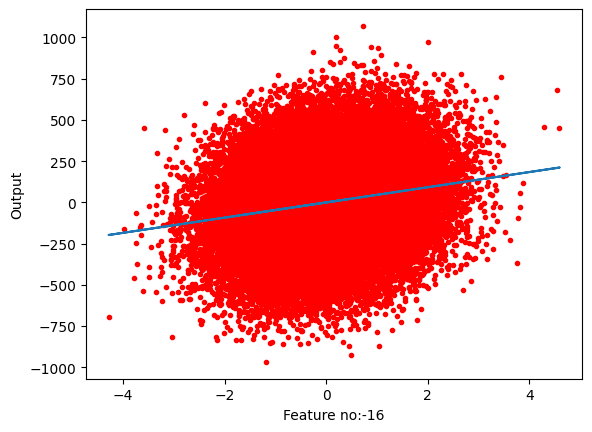

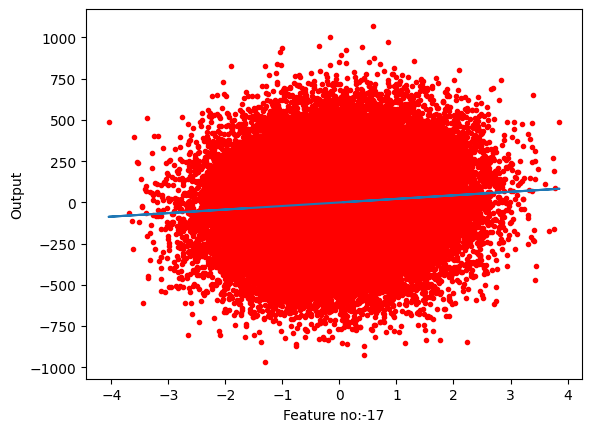

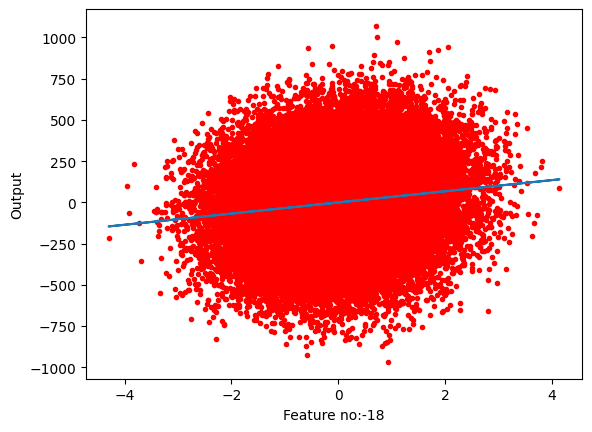

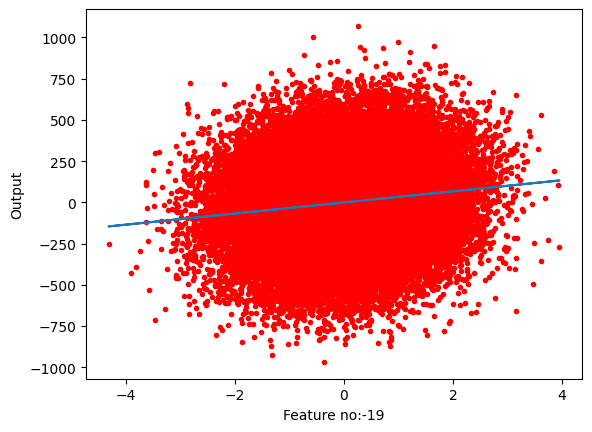

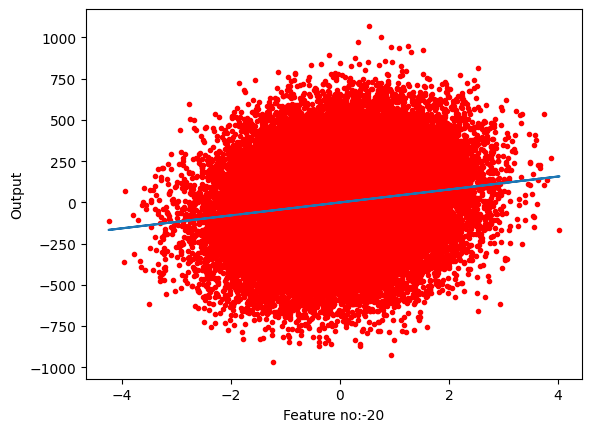

In [ ]:
for i in range(20):
  plt.scatter(X_train_normalized[:,i],Y_train, marker='.',c='r',label = "Training data")
  plt.xlabel(f"Feature no:-{i+1}")
  plt.ylabel("Output")
  a = np.zeros(20)
  a[i] = 1
  a = a.reshape(20,1)
  f_wb = predict(X_train_normalized,a*w_final,b_final)
  plt.plot(X_train_normalized[:,i],f_wb, label="Prediction")
  plt.show()

##Creating a cross validation set
No, matter how good our model does on the training set,there is always chance of overfitting,so we create a cross validation test,ratio of test to train is 80% train,20% test

In [ ]:
def train_test_split(X,Y,ratio):
    #ratio is the ratio of the train set to that of complete set
    m,n = X.shape
    a = m*ratio
    a = round(a)
    Z = np.append(X,Y,axis=1)
    np.random.seed(261)
    np.random.shuffle(Z)
    X = Z[:,:-1]
    Y = Z[:,-1]
    Y = Y.reshape(Y.size,1)
    X_train_r = X[:a]
    X_cv_r = X[a:]
    Y_train_r = Y[:a]
    Y_cv_r = Y[a:]
    return X_train_r,X_cv_r,Y_train_r,Y_cv_r

In [ ]:
X_train_r,X_cv_r,Y_train_r,Y_cv_r = train_test_split(X_train_normalized,Y_train,0.8)
print(X_train_r.shape)
print(Y_train_r.shape)
print(X_cv_r.shape)
print(Y_cv_r.shape)

(40000, 20)
(40000, 1)
(10000, 20)
(10000, 1)


Now we define another gradient descent function to account for J_cv

In [ ]:
def gradient_descent_cv(X,Y,w_in,b_in,alpha,iters,ratio,predict,compute_cost):
  
  J_train_history = [] #We create a list containg cost after every iteration(For later plotting and analysis)
  J_cv_history = []
  w = w_in.copy() 
  b = b_in
  X_train,X_cv,Y_train,Y_cv = train_test_split(X,Y,ratio)
  m,n = X_train.shape #Getting the number of training examples
  for i in range(iters):
    #Compute gradient dj_dw and dj_db
    f_wb = predict(X_train,w,b)
    err = f_wb - Y_train
    dj_dw = (np.matmul(err.T,X_train).T)/m
    dj_db = np.sum(err)/m 
    #Update parameters w,b (Simultaneously)
    w = w-alpha*dj_dw
    b = b-alpha*dj_db
    #Record Cost J after every iteration
    J_train_history.append(compute_cost(X_train, Y_train, w, b)) #Add the current cost to J_history
    J_cv_history.append(compute_cost(X_cv, Y_cv, w, b))
    # Print cost after interval of 10 times,[-1] refers to the last element(reverse indexing)
    if i%(np.math.ceil(iters / 10)) == 0:
      print("Iteration :",i," Cost :",J_train_history[-1]) #F-strings used to encode variables i and J_history  
  return w, b, J_train_history,J_cv_history #return final w,b and J_history(for graphing)

Iteration : 0  Cost : 29786.271433843613
Iteration : 100  Cost : 7770.358682225928
Iteration : 200  Cost : 5158.905621365943
Iteration : 300  Cost : 4815.235343374933
Iteration : 400  Cost : 4769.256922084135
Iteration : 500  Cost : 4763.083074208176
Iteration : 600  Cost : 4762.252463683817
Iteration : 700  Cost : 4762.140524840586
Iteration : 800  Cost : 4762.125413803829
Iteration : 900  Cost : 4762.123370485938


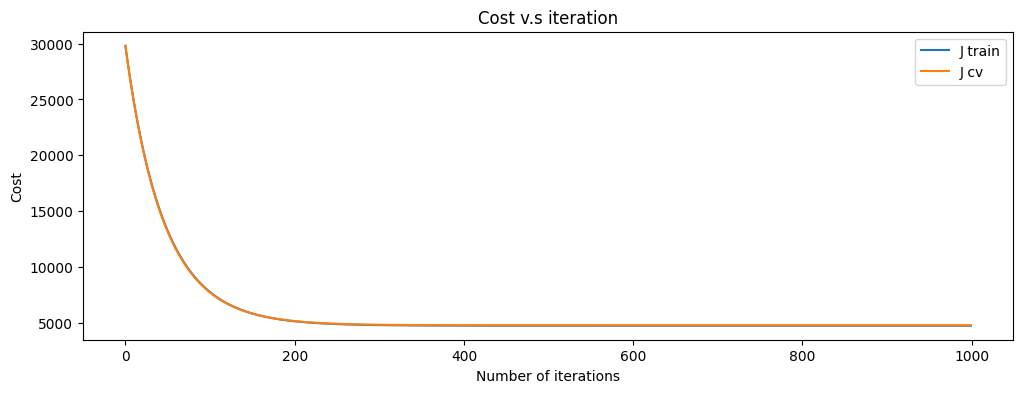

In [ ]:
w_final,b_final,J_train_history,J_cv_history = gradient_descent_cv(X_train_normalized,Y_train,w_initial,b_initial,0.01,1000,0.8,predict,compute_cost)
plt.figure(figsize=(12,4))
plt.plot(J_train_history , label = "J train")
plt.plot(J_cv_history , label = "J cv")
plt.title("Cost v.s iteration")
plt.ylabel("Cost")
plt.xlabel("Number of iterations")
plt.legend()
plt.show()

J train and J cv are almost overlapping

##Regularization
Now we finally introduce a regularized model(to ensure the values of weights are small enough to not overfit on the data)

In [ ]:
def compute_cost_l(X,Y,w,b,l):
  """
   Arguments
   X(2-D numpy array containing the training examples) Shape(m,n)
   Y(1-D numpy array containing the output label of all the training examples) Shape(m,1)
   w(numpy array of model parameters) Shape(n,1)
   b(model parameter) scalar 
  """
  m = len(Y) #Getting the number of training examples
  f_wb = predict(X,w,b)
  err = (f_wb - Y)**2
  err = err.reshape(m,1)
  cost = np.sum(err) # specific cost for each training example is added and divided by 2m to give final cost
  cost = cost/(2*m)
  cost += (l/2*m)*np.sum(w**2)
  #print(cost,"Cost of model")
  return cost

In [ ]:
def gradient_descent_cv_l(X,Y,w_in,b_in,alpha,iters,ratio,l,predict,compute_costs):
  J_train_history = [] #We create a list containg cost after every iteration(For later plotting and analysis)
  J_cv_history = []
  w = w_in.copy() 
  b = b_in
  X_train,X_cv,Y_train,Y_cv = train_test_split(X,Y,ratio)
  m,n = X_train.shape #Getting the number of training examples
  for i in range(iters):
    #Compute gradient dj_dw and dj_db
    f_wb = predict(X_train,w,b)
    err = f_wb - Y_train
    dj_dw = (np.matmul(err.T,X_train).T)/m
    dj_dw += (l/m)*w
    dj_db = np.sum(err)/m 
    #Update parameters w,b (Simultaneously)
    w = w-alpha*dj_dw
    b = b-alpha*dj_db
    #Record Cost J after every iteration
    #Note:- Even though we have applied regularization the method for computing training and testing error is still same
    J_train_history.append(compute_costs(X_train, Y_train, w, b)) #Add the current cost to J_history
    J_cv_history.append(compute_costs(X_cv, Y_cv, w, b))
    # Print cost after interval of 10 times,[-1] refers to the last element(reverse indexing)
    if i%(np.math.ceil(iters / 10)) == 0:
      print("Iteration :",i," Cost :",J_train_history[-1]) #F-strings used to encode variables i and J_history  
  return w, b, J_train_history,J_cv_history #return final w,b and J_history(for graphing)

Iteration : 0  Cost : 29786.271433843613
Iteration : 1000  Cost : 4762.123093725656
Iteration : 2000  Cost : 4762.123050269959
Iteration : 3000  Cost : 4762.123050269958
Iteration : 4000  Cost : 4762.123050269958
Iteration : 5000  Cost : 4762.123050269958
Iteration : 6000  Cost : 4762.123050269958
Iteration : 7000  Cost : 4762.123050269958
Iteration : 8000  Cost : 4762.123050269958
Iteration : 9000  Cost : 4762.123050269958


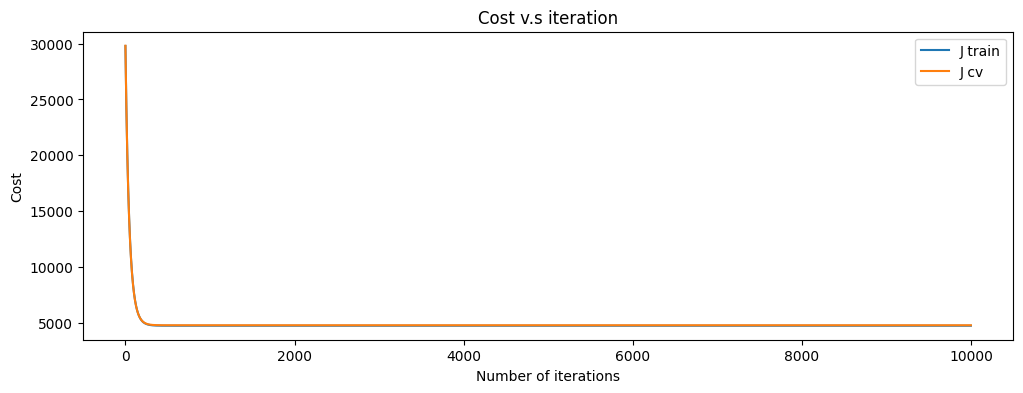

In [ ]:
#Final answer
w_ans,b_ans,J_train_history,J_cv_history = gradient_descent_cv_l(X_train_normalized,Y_train,w_initial,b_initial,0.01,10000,0.8,0.000001,predict,compute_cost)
plt.figure(figsize=(12,4))
plt.plot(J_train_history , label = "J train")
plt.plot(J_cv_history , label = "J cv")
plt.title("Cost v.s iteration")
plt.ylabel("Cost")
plt.xlabel("Number of iterations")
plt.legend()
plt.show()

J-train and J-cv are almost overlapping

##Calculating accuracy of model (Using R_2 square method)

In [ ]:
def compute_R_2(w,b,X,Y,compute_cost):
  m,n = Y.shape
  mean = np.sum(Y)/m
  sq_Y = Y**2 
  sq_mean = np.sum(sq_Y)/m 
  var_y = sq_mean - (mean)**2 
  r_2 = 1 -2*(compute_cost(X,Y,w,b))/(var_y)
  return r_2

In [ ]:
#Computing the accuracy of our trained model
r_2 = compute_R_2(w_ans,b_ans,X_train_normalized,Y_train,compute_cost)
print("Accuracy:",r_2*100,"%")

Accuracy: 84.28571211716304 %


##Generalizing Linear regression for n features (USING CLASSES)

The code below will be later used to make my own python library

In [ ]:
class LinearRegression:
  def __init__(self,X,Y,alpha,l,iters):
    self.X = X
    self.Y = Y
    m,n = X.shape
    self.m = m
    self.n = n
    self.alpha = alpha
    self.l = l
    self.iters = iters
    np.random.seed(2)
    self.w = 0.01*(np.random.randn(self.n,1)-0.5)
    self.b = np.random.randn()
    self.J_history = []
  
  def predict(self):
    a = np.matmul(self.X,self.w)
    a = a.reshape(self.m,1)
    f_wb = a + self.b
    return f_wb
  
  def compute_cost(self):
    f_wb = self.predict()
    err = (f_wb - self.Y)**2
    err = err.reshape(self.m,1)
    cost = np.sum(err) 
    cost = cost/(2*(self.m))
    return cost
  
  def gradient_descent(self):
    J_history = [] 
    for i in range(self.iters):
      f_wb = self.predict()
      err = f_wb - self.Y
      dj_dw = (np.matmul(err.T,self.X).T)/(self.m)
      dj_dw = dj_dw + (self.l/self.m)*(self.w)
      dj_db = np.sum(err)/(self.m) 
      self.w = self.w-(self.alpha)*dj_dw
      self.b = self.b-(self.alpha)*dj_db
      J_history.append(self.compute_cost()) 
      if i%(np.math.ceil((self.iters) / 10)) == 0:
        print("Iteration :",i," Cost :",J_history[-1]) 
    self.J_history = J_history   
    return self.w, self.b, J_history

  def reset_model(self):
    np.random.seed(2)
    self.w = 0.01*(np.random.randn(self.n,1)-0.5)
    self.b = np.random.randn()
    self.J_history = []

##Using our trained model to make a prediction on the test dataset

In [ ]:
#Now we load and print our test data
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/linear_test_data.csv") #Loading data from google drive
linear_test_data = np.array(df) #Converting loaded data in a matrix
test_id = linear_test_data[:,0] #Getting the Id's of all labels
test_id = test_id.reshape(test_id.size,1)
X_test = linear_test_data[:,1:21] #Extracting X_test
# Printing the first 5 rows of our loaded data
print("Input:-\n",X_test[:5])
print("Shape of test data:-",X_test.shape)
print("Test Id's:-\n",test_id[:5])

Input:-
 [[ 1.46790641e+02  2.23711806e+02 -8.81370769e-01 -3.22720648e-01
  -6.01713281e+00  4.71780307e+01  3.56027114e+01 -8.93331718e+00
   9.53860762e+01  1.51000080e+03  1.81354189e+02 -7.96667078e+00
   4.60404718e+01  6.61719092e+02 -1.95291405e+03 -5.49544410e+00
   8.15628857e+02  4.88054597e+00  1.25785551e+02  8.00204772e+02]
 [ 3.32536530e+01  2.85935229e+02 -3.35261115e+00  2.07564961e-01
   2.78653332e+01  1.45097164e+01  3.92818477e+01 -4.86443143e+00
  -5.95380114e+02  1.56528744e+03  1.45700293e+02  3.16793720e+01
   7.40357985e+01  4.79886479e+02 -1.96200568e+03  3.29002076e+01
   7.52489552e+02  3.07482642e+01  1.30832421e+02  7.36119143e+02]
 [ 1.80531799e+02  2.08420343e+02  9.84618777e+00  5.60998188e-02
  -5.84284956e+01  3.02145173e+01  6.62515809e+01  3.15233551e+01
  -4.43783229e+02  1.59533095e+03  1.06941506e+02  4.03398423e+01
  -1.46387842e+00 -1.19202069e+03 -2.04560103e+03  7.89492522e+01
   7.62424938e+02 -4.42265754e+01  7.93928048e+00  8.33656738e+02

Now we make a prediction on the test data

In [ ]:
#Before making a prediction we first have to normalize our data
X_train_normalized,mean,std_dev = z_score_normalization(X_train)
X_test_normalized = (X_test -mean)/std_dev
Y_test_prediction = predict(X_test_normalized,w_ans,b_ans)
#We also append the id's of data with our prediction
prediction = np.append(test_id,Y_test_prediction,axis = 1)
print(prediction[:5])

[[ 9.63960000e+04  9.14862918e+00]
 [ 8.01660000e+04  1.65772732e+02]
 [ 2.05160000e+04  7.21043611e+01]
 [ 8.88810000e+04 -1.01288297e+02]
 [ 6.91150000e+04  2.71851247e+01]]


Now finally we export our prediction back into a csv file

In [ ]:
dfp=pd.DataFrame(prediction) #Convert matrix to dataframe
dfp.columns = ["ids","prediction"] #Set labels to our dataframe
dfp.to_csv("linear_test_prediction.csv",index=False)#Convert dataframe to csv file

Also for ease of acess we store our trained w and b in npy files

In [ ]:
#These files can later be loaded using np.load()
np.save("linear_regression_w.npy",w_ans)
np.save("linear_regression_b.npy",b_ans)

In [ ]:
w_ans = np.load("linear_regression_w.npy")
b_ans = np.load("linear_regression_b.npy")
print("Weights:-\n",w_ans)
print("Bias:-\n",b_ans)

Weights:-
 [[73.52563721]
 [65.93137801]
 [97.44235044]
 [ 1.54526478]
 [16.76765221]
 [24.74158107]
 [71.21809057]
 [31.00855016]
 [20.61955009]
 [93.92263312]
 [39.1661767 ]
 [37.58222133]
 [ 2.86753625]
 [40.806531  ]
 [40.82170924]
 [46.19938408]
 [21.83954168]
 [33.63340415]
 [33.54396533]
 [39.15032029]]
Bias:-
 -0.37662984891248635


#Polynomial Regression
Here we will train a polynomial model using multiple features

##Creating the model

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/polynomial_train.csv") #Loading data from google drive
polynomial_train_data = np.array(df) #Converting loaded data in a matrix
X_train_p = polynomial_train_data[:,1:4]
Y_train_p = polynomial_train_data[:,4]
Y_train_p = Y_train_p.reshape(Y_train_p.size,1)

In [ ]:
print(X_train_p[:5])
print(Y_train_p[:5])

[[-1113.92458108   952.10540425  -276.04588086]
 [-2229.48022767  1111.48856784   -93.4541072 ]
 [ 2717.25771283    53.43123706  -179.22859092]
 [-1638.78396509  -632.91944742  -106.17023734]
 [ 5173.93433792  -721.89557709   -75.07484001]]
[[-1.29428892e+03]
 [-2.71468701e+04]
 [ 6.47430017e+04]
 [-7.34987079e+03]
 [ 1.65132815e+06]]


In this type of regression we have 3 different features A,B and C.We will combine these features to come up with a 3 degree polynomial model for making a prediction.The features are:-
a^3 ,b^3 ,c^3 ,(b^2)*c ,b*(c^2) ,(a^2)*b ,(a^2)*c ,a*(b^2) ,a*(c^2) ,a*b*c ,a^2 ,b^2 ,c^2 ,a*b ,a*c ,b*c ,a ,b ,c
So we have 19 weights and 1 bias.Now we will restructure our data into a matrix having 19 features (each representing one polynomial term) 

In [ ]:
m,n = X_train_p.shape
A = X_train_p[:,0].reshape(m,1)
B = X_train_p[:,1].reshape(m,1)
C = X_train_p[:,2].reshape(m,1)
X_train_p_c = np.concatenate((A*A*A,B*B*B,C*C*C,B*B*C,B*C*C,A*A*B,A*A*C,A*B*B,A*C*C,A*B*C,A*A,B*B,C*C,A*B,B*C,C*A,A,B,C), axis=1)
print(X_train_p_c[:5])

[[-1.38218878e+09  8.63088025e+08 -2.10350628e+07 -2.50236889e+08
   7.25516965e+07  1.18139902e+09 -3.42525451e+08 -1.00977787e+09
  -8.48825328e+07  2.92766977e+08  1.24082797e+06  9.06504701e+05
   7.62013283e+04 -1.06057361e+06 -2.62824775e+05  3.07494292e+05
  -1.11392458e+03  9.52105404e+02 -2.76045881e+02]
 [-1.10818145e+10  1.37314058e+09 -8.16197347e+05 -1.15453843e+08
   9.70737453e+06  5.52474516e+09 -4.64521311e+08 -2.75431511e+09
  -1.94715449e+07  2.31583183e+08  4.97058209e+06  1.23540684e+06
   8.73367015e+03 -2.47804179e+06 -1.03873172e+05  2.08354084e+05
  -2.22948023e+03  1.11148857e+03 -9.34541072e+01]
 [ 2.00628437e+10  1.52540683e+05 -5.75733992e+06 -5.11679183e+05
   1.71636563e+06  3.94508977e+08 -1.32333242e+09  7.75749115e+06
   8.72861646e+07 -2.60215612e+07  7.38348948e+06  2.85489709e+03
   3.21228878e+04  1.45186441e+05 -9.57640533e+03 -4.87010271e+05
   2.71725771e+03  5.34312371e+01 -1.79228591e+02]
 [-4.40113933e+09 -2.53539320e+08 -1.19676358e+06 -4.25

In [ ]:
#Now we normalize our data
X_train_normalized_p_c,u,s = z_score_normalization(X_train_p_c)
print(X_train_normalized_p_c[:5])

[[-0.03000799  0.28318438 -2.30563662 -1.18440351  2.55849345 -0.0871772
   0.43767567 -0.36329674 -0.86212377  0.82431996 -0.59837387  0.41640414
   2.17658081 -0.49685094 -1.8908444   0.67499917 -0.41384769  0.98132788
  -1.77549966]
 [-0.13837994  0.59550384  0.71893402 -0.21718762  0.10709049  0.32831469
   0.3765727  -0.97550886 -0.21431281  0.65286871 -0.27464718  0.82461278
  -0.83677647 -1.15376619 -0.55475053  0.46515753 -0.80507801  1.20523369
   0.78992095]
 [ 0.20959302 -0.24521518 -0.02021897  0.60764823 -0.20461918 -0.16245244
  -0.05357235 -0.00621209  0.84298379 -0.06899984 -0.06521714 -0.70513814
   0.20787324  0.06194973  0.23787646 -1.00666103  0.92976497 -0.28115405
  -0.41521346]
 [-0.06373811 -0.40055781  0.66200454  0.30611777 -0.54986364 -0.36279536
   0.46642174 -0.23931204 -0.20441924 -0.30466805 -0.47297273 -0.21150288
  -0.72339986  0.47535533  0.88320971  0.39242217 -0.5979182  -1.24535817
   0.61125889]
 [ 1.5329136  -0.47566868  0.77773218  0.33056261 -0.

##Running Gradient descent

Iteration : 0  Cost : 2345347954055.9814
Iteration : 1000  Cost : 319180476303.8189
Iteration : 2000  Cost : 319124849663.1041
Iteration : 3000  Cost : 319120173880.97186
Iteration : 4000  Cost : 319119778883.7237
Iteration : 5000  Cost : 319119744919.9182
Iteration : 6000  Cost : 319119741779.5563
Iteration : 7000  Cost : 319119741403.9423
Iteration : 8000  Cost : 319119741327.6918
Iteration : 9000  Cost : 319119741303.2526


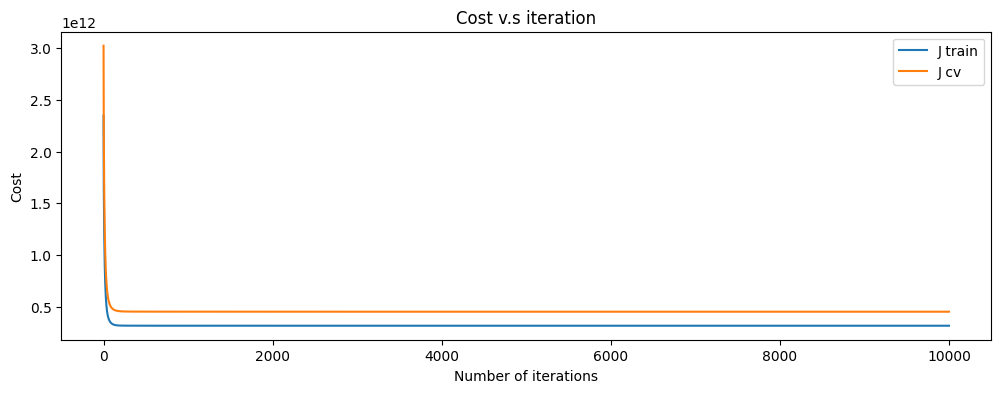

In [ ]:
#Now we can run our function on predefined gradient descent for linear regression
np.random.seed(3)
w_initial_p = 0.01*(np.random.randn(19,1)-0.5)
w_initial_p = w_initial_p.reshape(19,1)
b_initial_p = np.random.randn()
w_final_p,b_final_p,J_train_history_p,J_cv_history_p = gradient_descent_cv_l(X_train_normalized_p_c,Y_train_p,w_initial_p,b_initial_p,0.1,10000,0.8,0,predict,compute_cost)
plt.figure(figsize=(12,4))
plt.plot(J_train_history_p , label = "J train")
plt.plot(J_cv_history_p , label = "J cv")
plt.title("Cost v.s iteration")
plt.ylabel("Cost")
plt.xlabel("Number of iterations")
plt.legend()
plt.show()

##Visualization of the 3 degree Polynomial model
We will now plot our output prediction against each of the features A,B,C.Note :- While plotting for A features of B and C will be 0,and so on for B as well as C

###Feature A

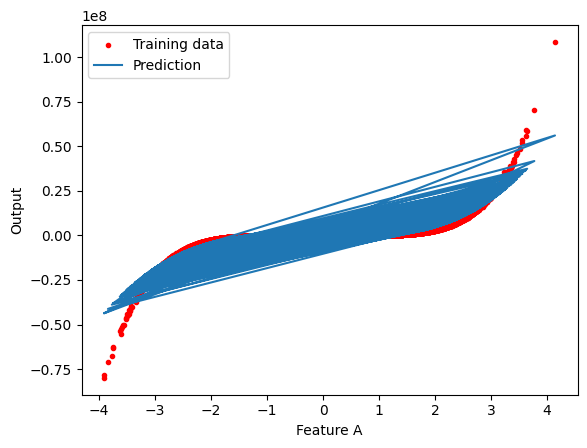

In [ ]:
plt.scatter(X_train_normalized_p_c[:,-3],Y_train_p, marker='.',c='r', label = "Training data")
plt.xlabel("Feature A")
plt.ylabel("Output")
a = np.array([[1],[0],[0],[0],[0],[0],[0],[0],[0],[0],[1],[0],[0],[0],[0],[0],[1],[0],[0]])
f_wb = predict(X_train_normalized_p_c,a*w_final_p,b_final_p)
plt.plot(X_train_normalized_p_c[:,-3],f_wb, label = "Prediction")
plt.legend()
plt.show()

###Feature B

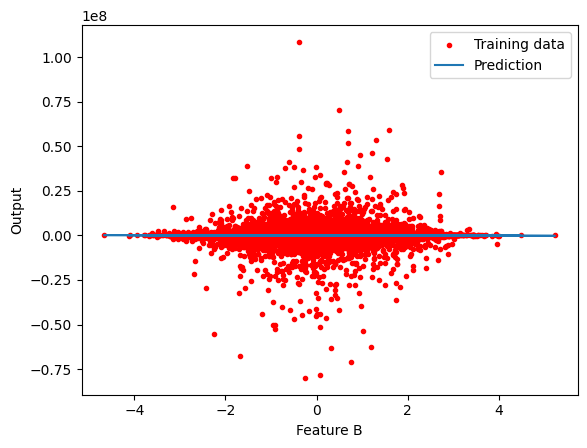

In [ ]:
plt.scatter(X_train_normalized_p_c[:,-2],Y_train_p, marker='.',c='r',label = "Training data")
plt.xlabel("Feature B")
plt.ylabel("Output")
b = np.array([[0],[1],[0],[0],[0],[0],[0],[0],[0],[0],[0],[1],[0],[0],[0],[0],[0],[1],[0]])
f_wb = predict(X_train_normalized_p_c,b*w_final_p,b_final_p)
plt.plot(X_train_normalized_p_c[:,-2],f_wb, label = "Prediction")
plt.legend()
plt.show()

###Feature C

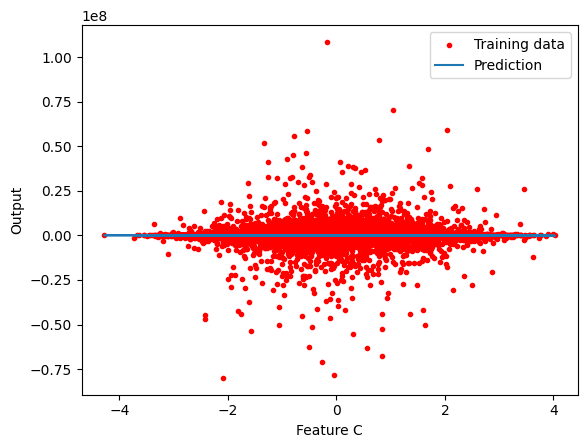

In [ ]:
plt.scatter(X_train_normalized_p_c[:,-1],Y_train_p, marker='.',c='r' , label = "Training data")
plt.xlabel("Feature C")
plt.ylabel("Output")
c = np.array([[0],[0],[1],[0],[0],[0],[0],[0],[0],[0],[0],[0],[1],[0],[0],[0],[0],[0],[1]])
f_wb = predict(X_train_normalized_p_c,c*w_final_p,b_final_p)
plt.plot(X_train_normalized_p_c[:,-1],f_wb, label = "Prediction")
plt.legend()
plt.show()

##Computing Accuracy of 3 degree polynomial model(Using R_2 score):-

In [ ]:
r_2 = compute_R_2(w_final_p,b_final_p,X_train_normalized_p_c,Y_train_p,compute_cost)
print("Accuracy:",r_2*100,"%")

Accuracy: 89.628974984456 %


##Generalizing Polynomial Regression for n features(USING CLASSES)
Following code will later be used to make my own python library

In [ ]:
##Functions defined outside of classes are not to be directly accessible by the users of the library
def combo(k,i):
  if(k == 1):
    return np.array([[i]],dtype=int)
  matrix = np.empty((0,k),dtype=int)
  for j in range(i+1):
    m,n = combo(k-1,j).shape
    a = np.full([m,1],i-j,dtype=int)
    mt = np.append(a,combo(k-1,j),axis=1)
    matrix = np.append(matrix,mt,axis = 0)
  return matrix

def get_terms(X,d):
  m,n = X.shape
  e = np.empty((m,0))
  for i in range(1,d+1): 
    c = np.empty((m,0))
    mat = combo(n,i)
    a,b = mat.shape
    for j in range(a):
      f = np.prod(np.power(X,mat[j]),axis=1)
      f = f.reshape(m,1)
      c = np.append(c,f,axis = 1)
    e = np.append(e,c,axis=1)
  return e

def z_score_normalization(X):
  m,n = (X).shape
  mean = np.sum(X,axis=0)/m 
  sq_X = X**2 
  sq_mean = np.sum(sq_X,axis=0)/m 
  sq_mean = sq_mean.reshape(1,-1)
  std_dev = np.sqrt(sq_mean - (mean)**2)
  std_dev = std_dev.reshape(1,-1)
  X_normalized = (X - mean)/std_dev  
  return X_normalized,mean,std_dev

def compute_cost(X,Y,w,b):
  m = len(Y) 
  f_wb = predict(X,w,b)
  err = (f_wb - Y)**2
  err = err.reshape(m,1)
  cost = np.sum(err)
  cost = cost/(2*m)
  return cost

def predict (X,w,b):
  m,n = X.shape
  a = np.matmul(X,w)
  a = a.reshape(m,1)
  f_wb = a + b
  return f_wb

class PolynomialRegression:
  def __init__(self,X,degree,Y,alpha,l,iters,ratio):
    self.degree = degree
    G = get_terms(X,self.degree)
    self.X,u,s = z_score_normalization(G)
    self.Y = Y
    m,n = self.X.shape
    self.m = m
    self.n = n
    self.alpha = alpha
    self.l = l
    self.iters = iters
    self.ratio = ratio
    np.random.seed(4)
    self.w = 0.01*(np.random.randn(self.n,1)-0.5)
    self.b = np.random.randn()
    self.J_train_history = []
    self.J_cv_history = []
  
  def predict(self):
    a = np.matmul(self.X,self.w)
    a = a.reshape(self.m,1)
    f_wb = a + self.b
    return f_wb
  
  def compute_cost(self):
    f_wb = self.predict()
    err = (f_wb - self.Y)**2
    err = err.reshape(self.m,1)
    cost = np.sum(err) 
    cost = cost/(2*(self.m))
    return cost
  
  def gradient_descent_cv_l(self):
    J_train_history = []
    J_cv_history = []
    m,n = self.X.shape
    a = m*self.ratio
    a = round(a)
    Z = np.append(self.X,self.Y,axis=1)
    np.random.seed(262)
    np.random.shuffle(Z)
    X_int = Z[:,:-1]
    Y_int = Z[:,-1]
    Y_int = Y_int.reshape(Y_int.size,1)
    X_train = X_int[:a]
    X_cv = X_int[a:]
    Y_train = Y_int[:a]
    Y_cv = Y_int[a:]
    m,n = X_train.shape 
    for i in range(self.iters):
      f_wb = predict(X_train,self.w,self.b)
      err = f_wb - Y_train
      dj_dw = np.matmul(err.T,X_train).T/(self.m)
      dj_dw += (self.l/self.m)*(self.w)
      dj_db = np.sum(err)/(self.m) 
      self.w = self.w-(self.alpha)*dj_dw
      self.b = self.b-(self.alpha)*dj_db   
      J_train_history.append(compute_cost(X_train, Y_train, self.w, self.b)) 
      J_cv_history.append(compute_cost(X_cv, Y_cv, self.w, self.b))
      if i%(np.math.ceil(self.iters / 10)) == 0:
        print("Iteration :",i," Cost :",J_train_history[-1])   
    self.J_train_history = J_train_history
    self.J_cv_history = J_cv_history
    return self.w, self.b, J_train_history,J_cv_history 
  
  def reset_model(self):
    np.random.seed(4)
    self.w = np.random.randn(self.n,1)
    self.b = np.random.randn()
    self.J_train_history = []
    self.J_cv_history = []
  
  def r2_score(self):
    m,n = self.Y.shape
    mean = np.sum(self.Y)/m
    sq_Y = (self.Y)**2 
    sq_mean = np.sum(sq_Y)/m 
    var_y = sq_mean - (mean)**2 
    r_2 = 1 -2*(compute_cost(self.X,self.Y,self.w,self.b))/(var_y)
    return r_2

In [ ]:
test2 = PolynomialRegression(X_train_p,5,Y_train_p,0.01,0,100000,0.8)
print(test2.predict())
print(test2.compute_cost())

[[0.2490198 ]
 [0.19639275]
 [0.18779623]
 ...
 [0.18455751]
 [0.18784268]
 [0.19454643]]
3337943926378.7275


Iteration : 0  Cost : 3027571276228.5938
Iteration : 10000  Cost : 223365139.8619814
Iteration : 20000  Cost : 9227323.78153695
Iteration : 30000  Cost : 1513317.037379556
Iteration : 40000  Cost : 458673.7597659585
Iteration : 50000  Cost : 202511.70054633592
Iteration : 60000  Cost : 116657.28812626179
Iteration : 70000  Cost : 77323.45535421919
Iteration : 80000  Cost : 54722.66805927883
Iteration : 90000  Cost : 40027.10197986611


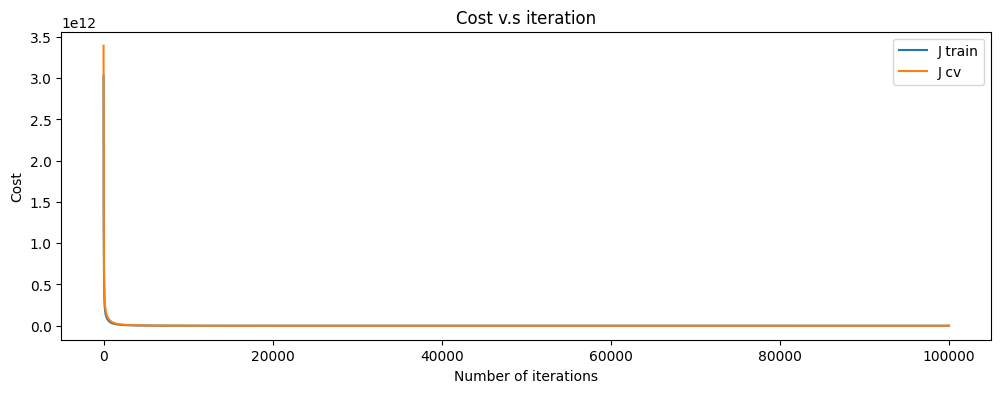

In [ ]:
#Note the parameters w and b, which we receive are of the modified test set(After normalization)
test2.reset_model()
test2.w,test2.b,test2.J_train_history,test2.J_cv_history = test2.gradient_descent_cv_l()
plt.figure(figsize=(12,4))
plt.plot(test2.J_train_history, label="J train")
plt.plot(test2.J_cv_history, label="J cv" )
plt.title("Cost v.s iteration")
plt.ylabel("Cost")
plt.xlabel("Number of iterations")
plt.legend()
plt.show()

Iteration : 0  Cost : 29856.643688493466
Iteration : 10000  Cost : 22575.644775008484
Iteration : 20000  Cost : 17253.562436637596
Iteration : 30000  Cost : 13306.857238353949
Iteration : 40000  Cost : 10347.7182995575
Iteration : 50000  Cost : 8108.858041730049
Iteration : 60000  Cost : 6401.540908017289
Iteration : 70000  Cost : 5090.206790451084
Iteration : 80000  Cost : 4076.2439520664216
Iteration : 90000  Cost : 3287.1944315005326


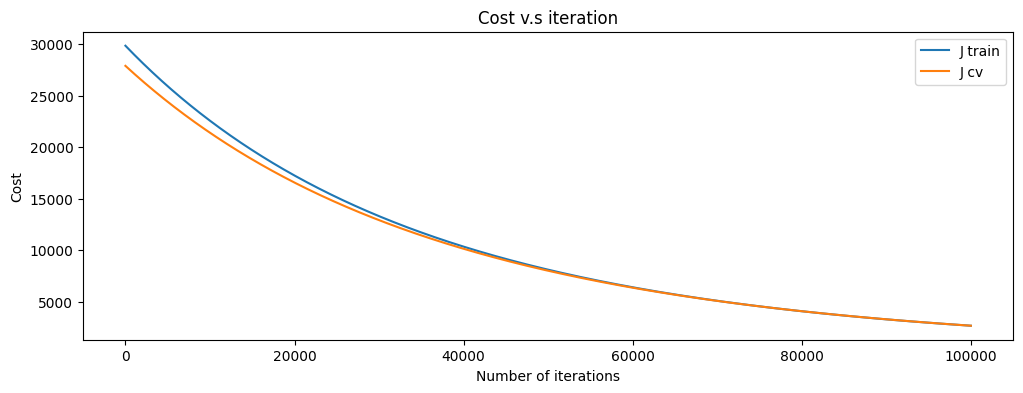

In [ ]:
#We run code for another 10000 iterations
test2.w,test2.b,test2.J_train_history,test2.J_cv_history = test2.gradient_descent_cv_l()
plt.figure(figsize=(12,4))
plt.plot(test2.J_train_history, label="J train")
plt.plot(test2.J_cv_history, label="J cv" )
plt.title("Cost v.s iteration")
plt.ylabel("Cost")
plt.xlabel("Number of iterations")
plt.legend()
plt.show()

In [ ]:
#We run code for another 10000 iterations
test2.w,test2.b,test2.J_train_history,test2.J_cv_history = test2.gradient_descent_cv_l()
plt.figure(figsize=(12,4))
plt.plot(test2.J_train_history, label="J train")
plt.plot(test2.J_cv_history, label="J cv" )
plt.title("Cost v.s iteration")
plt.ylabel("Cost")
plt.xlabel("Number of iterations")
plt.legend()
plt.show()

Iteration : 0  Cost : 2669.369321747788
Iteration : 10000  Cost : 2182.6942612565713
Iteration : 20000  Cost : 1797.057923403069
Iteration : 30000  Cost : 1489.69560746536
Iteration : 40000  Cost : 1243.29711941064
Iteration : 50000  Cost : 1044.6276103690177


KeyboardInterrupt: ignored

In [ ]:
#We run code for another 10000 iterations
test2.w,test2.b,test2.J_train_history,test2.J_cv_history = test2.gradient_descent_cv_l()
plt.figure(figsize=(12,4))
plt.plot(test2.J_train_history, label="J train")
plt.plot(test2.J_cv_history, label="J cv" )
plt.title("Cost v.s iteration")
plt.ylabel("Cost")
plt.xlabel("Number of iterations")
plt.legend()
plt.show()

In [ ]:
#We run code for another 10000 iterations
test2.w,test2.b,test2.J_train_history,test2.J_cv_history = test2.gradient_descent_cv_l()
plt.figure(figsize=(12,4))
plt.plot(test2.J_train_history, label="J train")
plt.plot(test2.J_cv_history, label="J cv" )
plt.title("Cost v.s iteration")
plt.ylabel("Cost")
plt.xlabel("Number of iterations")
plt.legend()
plt.show()

In [ ]:
#We run code for another 10000 iterations
test2.w,test2.b,test2.J_train_history,test2.J_cv_history = test2.gradient_descent_cv_l()
plt.figure(figsize=(12,4))
plt.plot(test2.J_train_history, label="J train")
plt.plot(test2.J_cv_history, label="J cv" )
plt.title("Cost v.s iteration")
plt.ylabel("Cost")
plt.xlabel("Number of iterations")
plt.legend()
plt.show()

In [ ]:
#We run code for another 10000 iterations
test2.w,test2.b,test2.J_train_history,test2.J_cv_history = test2.gradient_descent_cv_l()
plt.figure(figsize=(12,4))
plt.plot(test2.J_train_history, label="J train")
plt.plot(test2.J_cv_history, label="J cv" )
plt.title("Cost v.s iteration")
plt.ylabel("Cost")
plt.xlabel("Number of iterations")
plt.legend()
plt.show()

In [ ]:
#We run code for another 10000 iterations
test2.w,test2.b,test2.J_train_history,test2.J_cv_history = test2.gradient_descent_cv_l()
plt.figure(figsize=(12,4))
plt.plot(test2.J_train_history, label="J train")
plt.plot(test2.J_cv_history, label="J cv" )
plt.title("Cost v.s iteration")
plt.ylabel("Cost")
plt.xlabel("Number of iterations")
plt.legend()
plt.show()

In [ ]:
#We run code for another 10000 iterations
test2.w,test2.b,test2.J_train_history,test2.J_cv_history = test2.gradient_descent_cv_l()
plt.figure(figsize=(12,4))
plt.plot(test2.J_train_history, label="J train")
plt.plot(test2.J_cv_history, label="J cv" )
plt.title("Cost v.s iteration")
plt.ylabel("Cost")
plt.xlabel("Number of iterations")
plt.legend()
plt.show()

In [ ]:
#We run code for another 10000 iterations
test2.w,test2.b,test2.J_train_history,test2.J_cv_history = test2.gradient_descent_cv_l()
plt.figure(figsize=(12,4))
plt.plot(test2.J_train_history, label="J train")
plt.plot(test2.J_cv_history, label="J cv" )
plt.title("Cost v.s iteration")
plt.ylabel("Cost")
plt.xlabel("Number of iterations")
plt.legend()
plt.show()

##Computing accuracy of 5 degree polynomial model

In [ ]:
##Checking Accuracy
r2 = test2.r2_score()
print("Accuracy:",r2*100,"%")

##Using our trained model to make a prediction on the test dataset

In [ ]:
#Now we load and print our test data
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/polynomial_test_data.csv") #Loading data from google drive
polynomial_test_data = np.array(df) #Converting loaded data in a matrix
test_id_p = polynomial_test_data[:,0] #Getting the Id's of all labels
test_id_p = test_id_p.reshape(test_id_p.size,1)
X_test_p = polynomial_test_data[:,1:] #Extracting X_test
# Printing the first 5 rows of our loaded data
print("Input:-\n",X_test_p[:5])
print("Shape of test data:-",X_test_p.shape)
print("Test Id's:-\n",test_id_p[:5])

Now we make a prediction on the test data

In [ ]:
#Before making a prediction we first have modify and normalize our data
G = get_terms(X_train_p,5)
X_train_p_normalized,mean,std_dev = z_score_normalization(G)
X_test_m_normalized = (get_terms(X_test_p,5)-mean)/std_dev
Y_test_prediction_p = predict(X_test_m_normalized,test2.w,test2.b)
#We also append the id's of data with our prediction
prediction_p = np.append(test_id_p,Y_test_prediction_p,axis=1)
print(prediction_p[:5])

Now finally we export our prediction back into a csv file

In [ ]:
dfp=pd.DataFrame(prediction_p) #Convert matrix to dataframe
dfp.columns = ["ids","prediction"] #Set labels to our dataframe
dfp.to_csv("polynomial_test_prediction.csv",index=False)#Convert dataframe to csv file

Saving trained parameters for easier access later

In [ ]:
#These files can later be loaded using np.load()
np.save("polynomial_regression_w.npy",test2.w)
np.save("polynomial_regression_b.npy",test2.b)

In [ ]:
#First save the files in the same folder of this notebook
w_ans = np.load("polynomial_regression_w.npy")
b_ans = np.load("polynomial_regression_b.npy")
print("Weights:-\n",w_ans)
print("Bias:-\n",b_ans)

#Visualizing the data for classification tasks

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/classification_train.csv") #Loading data from google drive
classification_train_data = np.array(df) #Converting loaded data in a matrix
X_train_c = classification_train_data[:,2:786]
Y_train_c = classification_train_data[:,1]
Y_train_c = Y_train_c.reshape(Y_train_c.size,1)

In [ ]:
print(X_train_c[:5])
print(Y_train_c[:5])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[8]
 [4]
 [1]
 [8]
 [2]]


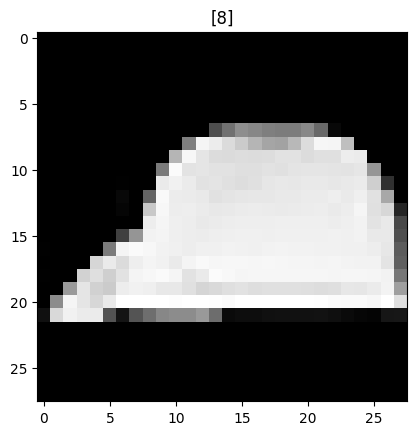

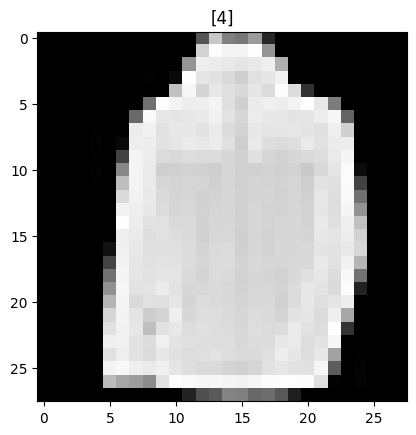

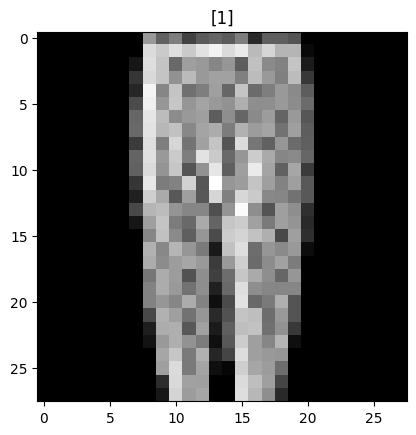

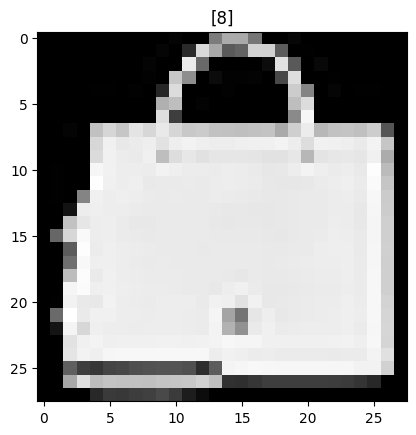

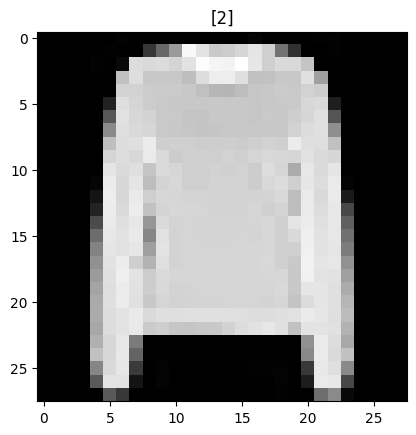

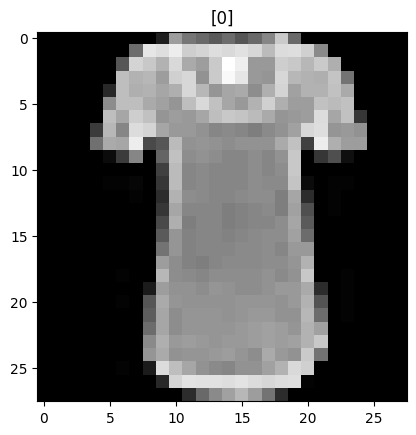

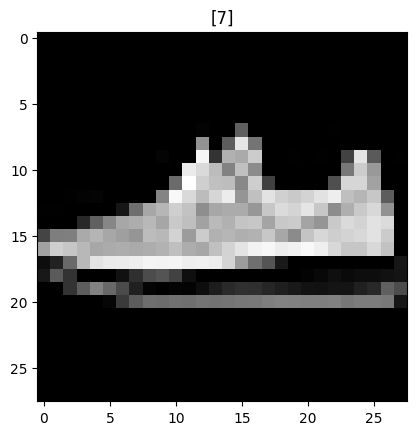

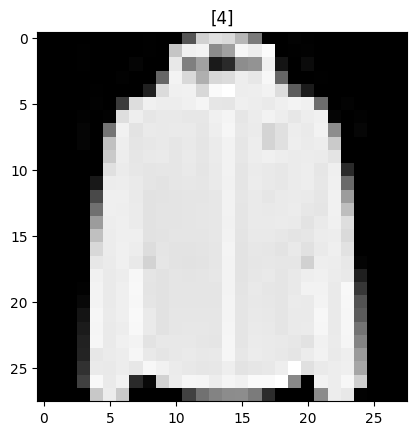

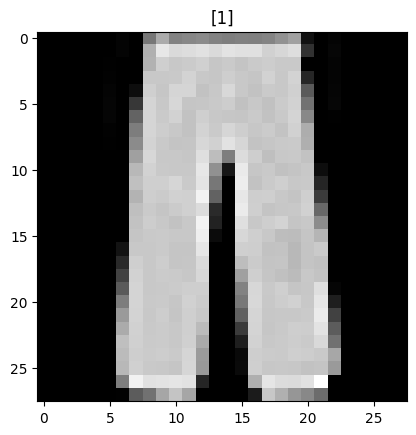

In [ ]:
#Here we write code to display some of the images with their labels
for i in range(9):
  data = X_train_c[i].reshape(28,28)
  plt.imshow(data,cmap="Greys_r")
  plt.title(f"{Y_train_c[i]}")
  plt.show()

# KNN
(K nearest neigbours algorithm)

##Creating the model

In [ ]:
def predict_knn(X,Y,k,p):
  a,b = X.shape
  m,n = p.shape #Get number of predictions to be made and number of features
  f = len(np.unique(Y))
  a = np.sum((p)**2,axis=1).reshape(-1,1)
  a = a - 2*np.matmul(p,X.T)
  a = a + np.sum((X.T)**2,axis=0).reshape(1,-1)
  a = np.argsort(a,axis=1)
  a = Y[a].reshape(-1,Y.size)  
  c = a[:,:k]
  c = pd.DataFrame(c)
  d = np.array(c.mode(axis=1,numeric_only=True))
  d = d[:,0]
  ans = np.array(d,dtype=int).reshape(d.size,1)
  return ans

In [ ]:
p = X_train_c[:5]
predict_knn(X_train_c,Y_train_c,3,p)

array([[8],
       [4],
       [1],
       [8],
       [2]])

##Visualizing KNN data

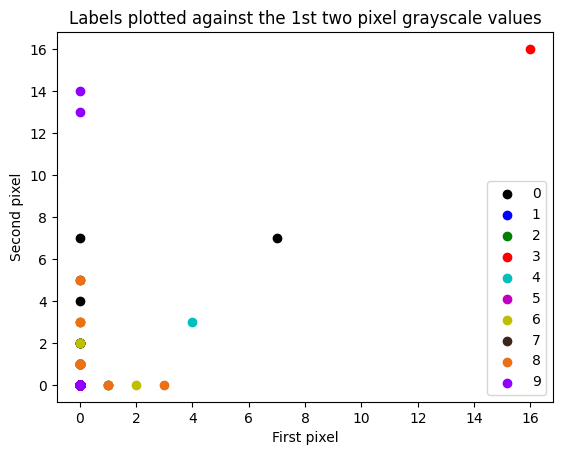

In [ ]:
#We will pick the first 2 features of our training dataset and plot it on the 2D plane(After normalization)
X_plot = X_train_c[:,:2]
X_plot_0 = []
X_plot_1 = []
X_plot_2 = []
X_plot_3 = []
X_plot_4 = []
X_plot_5 = []
X_plot_6 = []
X_plot_7 = []
X_plot_8 = []
X_plot_9 = []
Y_plot = Y_train_c
for i in range(Y_train_c.size):
  if Y_plot[i] == 0:
    X_plot_0.append(X_plot[i])
  elif Y_plot[i] == 1:
    X_plot_1.append(X_plot[i])
  elif Y_plot[i] == 2:
    X_plot_2.append(X_plot[i])
  elif Y_plot[i] == 3:
    X_plot_3.append(X_plot[i])
  elif Y_plot[i] == 4:
    X_plot_4.append(X_plot[i])
  elif Y_plot[i] == 5:
    X_plot_5.append(X_plot[i])
  elif Y_plot[i] == 6:
    X_plot_6.append(X_plot[i])
  elif Y_plot[i] == 7:
    X_plot_7.append(X_plot[i])
  elif Y_plot[i] == 8:
    X_plot_8.append(X_plot[i])
  elif Y_plot[i] == 9:
    X_plot_9.append(X_plot[i])
X_0 = np.array(X_plot_0)
X_1 = np.array(X_plot_1)
X_2 = np.array(X_plot_2)
X_3 = np.array(X_plot_3)
X_4 = np.array(X_plot_4)
X_5 = np.array(X_plot_5)
X_6 = np.array(X_plot_6)
X_7 = np.array(X_plot_7)
X_8 = np.array(X_plot_8)
X_9 = np.array(X_plot_9)
plt.scatter(X_0[:,0],X_0[:,1],color='k',marker='o',label=0)
plt.scatter(X_1[:,0],X_1[:,1],color='b',marker='o',label=1)
plt.scatter(X_2[:,0],X_2[:,1],color='g',marker='o',label=2)
plt.scatter(X_3[:,0],X_3[:,1],color='r',marker='o',label=3)
plt.scatter(X_4[:,0],X_4[:,1],color='c',marker='o',label=4)
plt.scatter(X_5[:,0],X_5[:,1],color='m',marker='o',label=5)
plt.scatter(X_6[:,0],X_6[:,1],color='y',marker='o',label=6)
plt.scatter(X_7[:,0],X_7[:,1],color='#3d251e',marker='o',label=7)
plt.scatter(X_8[:,0],X_8[:,1],color='#ed7014',marker='o',label=8)
plt.scatter(X_9[:,0],X_9[:,1],color='#8f00ff',marker='o',label=9)
plt.title("Labels plotted against the 1st two pixel grayscale values")
plt.xlabel("First pixel")
plt.ylabel("Second pixel")
plt.legend()
plt.show()

##Computing accuracy of KNN model
For computing accuracy we first need to split our training dataset

In [ ]:
X_train_c_t,X_cv_c,Y_train_c_t,Y_cv_c = train_test_split(X_train_c,Y_train_c,0.999)
print(X_train_c_t.shape)
print(X_cv_c.shape)
print(Y_train_c_t.shape)
print(Y_cv_c.shape)

(29970, 784)
(30, 784)
(29970, 1)
(30, 1)


In [ ]:
def accuracy_knn(X_train,X_cv,Y_train,Y_cv,k):
  cnt = 0
  m,n = X_cv.shape
  cnt = (predict_knn(X_train,Y_train,k,X_cv) == Y_cv).sum()
  return cnt/m

##Plotting K v.s Accuracy

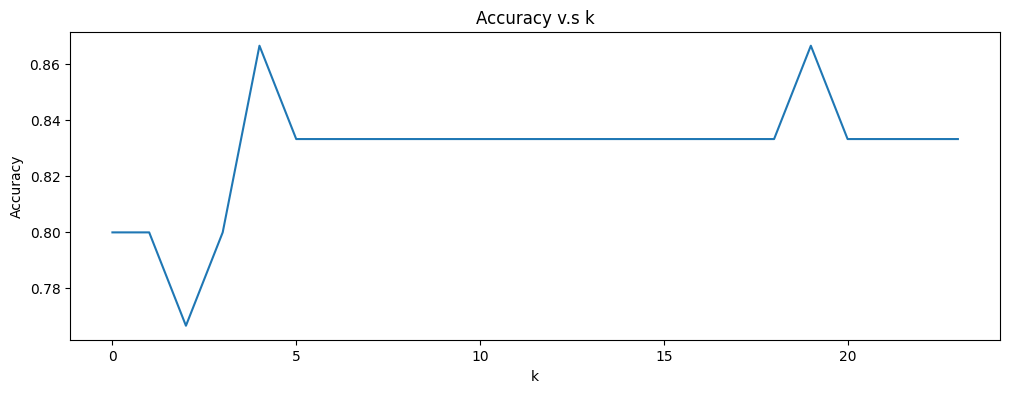

In [ ]:
#Takes time(approx 2 minutes)
acc = []
for i in range(1,25):
  acc.append(accuracy_knn(X_train_c_t,X_cv_c,Y_train_c_t,Y_cv_c,i))
plt.figure(figsize=(12,4))
plt.plot(acc)
plt.title("Accuracy v.s k")
plt.ylabel("Accuracy")
plt.xlabel("k")
plt.show()

Most ideal value of k seems to be 4

##Generalizing knn using classes

In [ ]:
def train_test_split(X,Y,ratio):
    #ratio is the ratio of the train set to that of complete set
    m,n = X.shape
    a = m*ratio
    a = round(a)
    Z = np.append(X,Y,axis=1)
    np.random.seed(261)
    np.random.shuffle(Z)
    X = Z[:,:-1]
    Y = Z[:,-1]
    Y = Y.reshape(Y.size,1)
    X_train_r = X[:a]
    X_cv_r = X[a:]
    Y_train_r = Y[:a]
    Y_cv_r = Y[a:]
    return X_train_r,X_cv_r,Y_train_r,Y_cv_r

def predict_knn(X,Y,k,p):
   a,b = X.shape
   m,n = p.shape #Get number of predictions to be made and number of features
   f = len(np.unique(Y))
   a = np.sum((p)**2,axis=1).reshape(-1,1)
   a = a - 2*np.matmul(p,X.T)
   a = a + np.sum((X.T)**2,axis=0).reshape(1,-1)
   a = np.argsort(a,axis=1)
   a = Y[a].reshape(-1,Y.size)  
   c = a[:,:k]
   c = pd.DataFrame(c)
   d = np.array(c.mode(axis=1,numeric_only=True))
   d = d[:,0]
   ans = np.array(d,dtype=int).reshape(d.size,1)
   return ans

class knn:
  def __init__(self,X,Y,k,p,ratio):
    self.X = X
    self.Y = Y
    self.k = k
    self.p = p
    self.ratio = ratio
    self.f = len(np.unique(self.Y))
  
  def predict_knn(self):
   a,b = self.X.shape
   m,n = self.p.shape #Get number of predictions to be made and number of features
   f = len(np.unique(self.Y))
   a = np.sum((self.p)**2,axis=1).reshape(-1,1)
   a = a - 2*np.matmul(self.p,self.X.T)
   a = a + np.sum((self.X.T)**2,axis=0).reshape(1,-1)
   a = np.argsort(a,axis=1)
   a = self.Y[a].reshape(-1,self.Y.size)  
   c = a[:,:self.k]
   c = pd.DataFrame(c)
   d = np.array(c.mode(axis=1,numeric_only=True))
   d = d[:,0]
   ans = np.array(d,dtype=int).reshape(d.size,1)
   return ans

  def accuracy_knn(self):
    X_train_c_t,X_cv_c_t,Y_train_c_t,Y_cv_c_t = train_test_split(self.X,self.Y,self.ratio)
    cnt = 0
    m,n = X_cv_c_t.shape
    cnt = (predict_knn(X_train_c_t,Y_train_c_t,self.k,X_cv_c_t) == Y_cv_c_t).sum()
    return cnt/m

##Visualizing performance of knn model

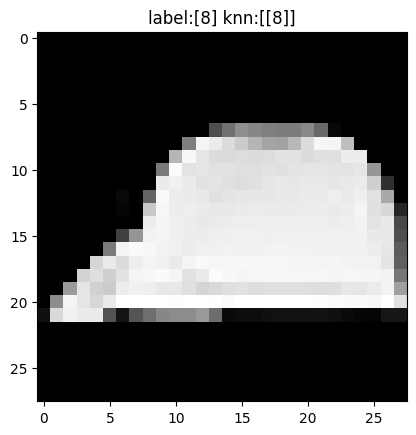

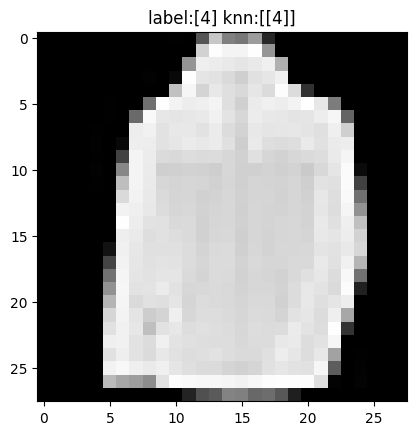

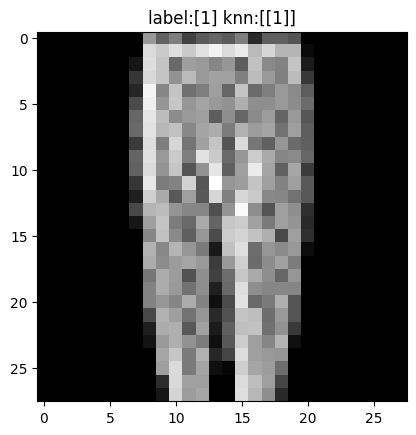

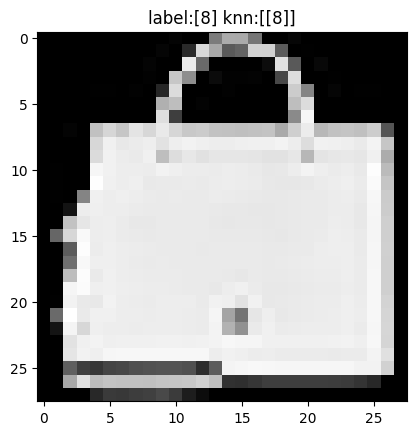

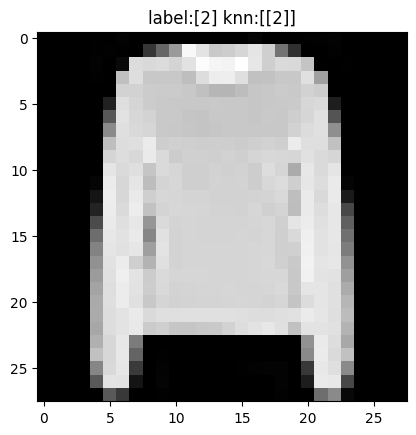

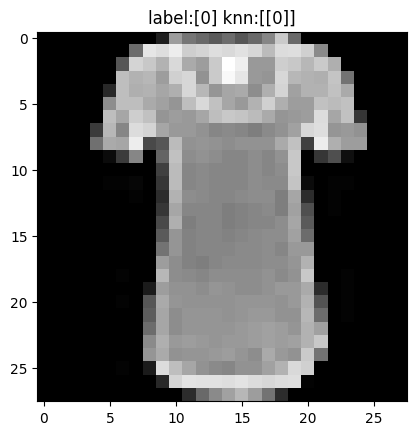

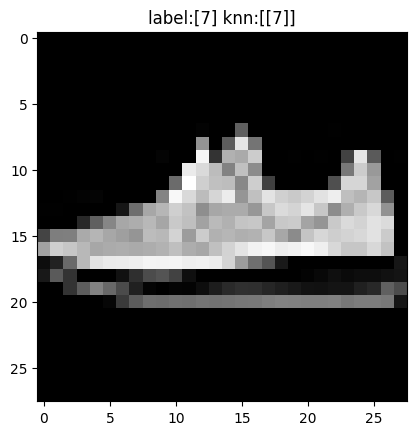

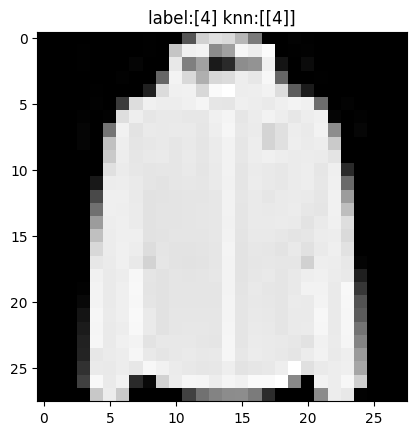

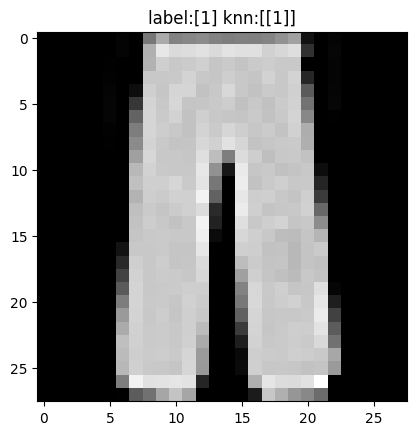

In [ ]:
for i in range(9):
  data = X_train_c[i].reshape(28,28)
  plt.imshow(data,cmap="Greys_r")
  Y_knn = predict_knn(X_train_c,Y_train_c,3,X_train_c[i].reshape(1,-1))
  plt.title(f"label:{Y_train_c[i]} knn:{Y_knn}")
  plt.show()

##Making a prediction on test dataset

In [ ]:
#Now we load and print our test data
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/classification_test.csv") #Loading data from google drive
classification_test_data = np.array(df) #Converting loaded data in a matrix
test_id_c = classification_test_data[:,0] #Getting the Id's of all labels
test_id_c = test_id_c.reshape(test_id_c.size,1)
X_test_c = classification_test_data[:,1:] #Extracting X_test
# Printing the first 5 rows of our loaded data
print("Input:-\n",X_test_c[:5])
print("Shape of test data:-",X_test_c.shape)
print("Test Id's:-\n",test_id_c[:5])

Input:-
 [[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ... 56  0  0]
 [ 0  0  0 ...  0  0  0]]
Shape of test data:- (10000, 784)
Test Id's:-
 [[25672]
 [59964]
 [66230]
 [50801]
 [83307]]


Now we make a prediction on the test data

In [ ]:
#Code takes time approx 15 minutes
Y_test_prediction_c = predict_knn(X_train_c,Y_train_c,3,X_test_c)
print(Y_test_prediction_c)

[[0]
 [1]
 [2]
 ...
 [8]
 [8]
 [2]]


In [ ]:
#We also append the id's of data with our prediction
prediction_c = np.append(test_id_c,Y_test_prediction_c,axis=1)
print(prediction_c[:5])

[[25672     0]
 [59964     1]
 [66230     2]
 [50801     2]
 [83307     3]]


Now finally we export our prediction back into a csv file

In [ ]:
dfc=pd.DataFrame(prediction_c) #Convert matrix to dataframe
dfc.columns = ["ids","prediction"] #Set labels to our dataframe
dfc.to_csv("classification_test_prediction_knn.csv",index=False)#Convert dataframe to csv file

#Logistic Regression

##Creating the model
We are going to create a softmax model for making a prediction on multiple classes(SOFTMAX)

###Initializing model parameters

In [ ]:
np.random.seed(5)
#For initializing small values near 0
#As there are 10 different classes and 784 different features
w_initial_lo = 0.0001*(np.random.randn(10,784)-0.5)
b_initial_lo = np.random.randn(1,10)
print(w_initial_lo)
print(b_initial_lo)

[[-5.87725131e-06 -8.30870152e-05  1.93077119e-04 ... -2.57612020e-05
  -1.41537425e-05  8.17400999e-05]
 [-1.42252859e-04 -4.04551077e-05 -1.30263184e-05 ... -9.27897976e-05
  -1.01514431e-04 -6.67778733e-05]
 [-2.49518390e-05 -1.86120070e-04 -4.82677025e-05 ...  1.14532409e-04
  -6.40859818e-05 -4.44697017e-05]
 ...
 [-9.48996966e-05 -6.95780516e-05 -1.49641658e-04 ... -8.81383586e-06
  -5.96576888e-05 -2.79978488e-05]
 [ 1.19607906e-04 -8.25018652e-06 -1.33244712e-04 ... -4.46333316e-05
  -1.32000571e-04  9.52066223e-05]
 [-1.32164081e-04 -8.53541325e-05 -1.67749844e-04 ... -7.24122927e-05
  -9.74229087e-06 -8.76577026e-06]]
[[ 0.22712517  1.45446343 -1.56549323  1.90398779 -0.06411405 -0.25196006
   1.43297955  0.28065312  1.08591793 -0.18010609]]


###Modifying the data
Before running gradient descent we will apply one hot encoding to Y_train_c and we will generate a vector containing frequency of every class(Useful for gradient descent),After one-hot encoding we will perform other operations

In [ ]:
def modify_data_lo(X,Y):
  #Getting the frequency array
  Y_train_ca = np.bincount(Y.flatten())
  Y_train_ca = Y_train_ca.reshape(1,Y_train_ca.size)
  #One hot encoding the data (Run this cell after just after loading classification data)
  ab = pd.DataFrame(Y,columns = ["Category"])
  Y_train_cb = pd.get_dummies(ab,columns = ["Category"])
  Y_train_cb = np.array(Y_train_cb)
  return Y_train_cb,Y_train_ca

In [ ]:
Y_train_cw,Y_train_cb = modify_data_lo(X_train_c,Y_train_c)
print("For updating w:-\n",Y_train_cw)
print("For updating b:-\n",Y_train_cb)

For updating w:-
 [[0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
For updating b:-
 [[3000 3000 3000 3000 3000 3000 3000 3000 3000 3000]]


##Predict Function
We define 2 predict functions one for probability and other for actual prediction

In [ ]:
def predict_lo (X,w,b):
  """
  Arguments
  X(2D numpy array of training examples) Shape(m,n)
  w(numpy array of model parameters) Shape(n,1)
  b(model parameter) scalar 
  """
  m,n = X.shape
  a = np.matmul(X,w.T) + b
  #Applying softmax activation
  c = np.exp(a)
  d = np.sum(c,axis=1).reshape(m,1)
  probability = c/d
  prediction = probability.argmax(axis=1).reshape(m,1)
  return probability,prediction

In [ ]:
probability,prediction = predict_lo(X_train_c,w_initial_lo,b_initial_lo)
print(probability)
print(prediction)

[[0.04163149 0.24786711 0.00628009 ... 0.07964707 0.12463137 0.02534275]
 [0.01834674 0.26093741 0.00320272 ... 0.05755954 0.13020138 0.01963346]
 [0.02954873 0.21380408 0.0058406  ... 0.05137165 0.12699328 0.02950917]
 ...
 [0.0472017  0.22882276 0.00879049 ... 0.07179478 0.14165497 0.0409498 ]
 [0.04292753 0.15094227 0.00717456 ... 0.05562871 0.19049923 0.03397484]
 [0.02335323 0.25425646 0.00420351 ... 0.06213229 0.10087596 0.01957679]]
[[3]
 [3]
 [3]
 ...
 [1]
 [3]
 [3]]


##Computing Cost

In [ ]:
def compute_cost_lo(X,Y,w,b):
  m = len(Y) #Getting the number of training examples
  probability,prediction = predict_lo(X,w,b)
  l = np.choose(Y.T,probability.T).T
  loss = (-1)*np.log(l)
  cost = np.sum(loss)/m
  return cost

In [ ]:
print(compute_cost_lo(X_train_c,Y_train_c,w_initial_lo,b_initial_lo))

2.831184125048678


##Computing cost(with regularization)

In [ ]:
def compute_cost_lo_l(X,Y,w,b,l):
  m = len(Y)
  cost = compute_cost_lo(X,Y,w,b)
  cost += (l/2*m)*np.sum(w**2) #Adding regularized term
  return cost

In [ ]:
print(compute_cost_lo_l(X_train_c,Y_train_c,w_initial_lo,b_initial_lo,0.01))

2.8458999487437517


##Running Gradient descent

In [ ]:
def gradient_descent_lo(X,Y,w_in,b_in,alpha,iters,ratio,l,predict,compute_cost_lo,modify_data_lo):
  
  J_train_history = [] #We create a list containg cost after every iteration(For later plotting and analysis)
  J_cv_history = []
  w = w_in.copy() 
  b = b_in
  
  X_train,X_cv,Y_train,Y_cv = train_test_split(X,Y,ratio)
  m,n = X_train.shape #Getting the number of training examples
  Y_train = Y_train.astype(np.int64)
  Y_cv = Y_cv.astype(np.int64)
  X_w,X_b = modify_data_lo(X_train,Y_train)
  for i in range(iters):
    #Compute gradient dj_dw and dj_db
    probability,prediction = predict_lo(X_train,w,b)
    dj_db = (np.sum(probability,axis=0).reshape(1,-1) - X_b)/m #Here -1 in .reshape() automatically gets the possible dimension(According to the number of elements in the array)
    dj_dw = (l*w - np.matmul((X_w - probability).T,X_train))/m
    #Update parameters w,b (Simultaneously)
    w = w-alpha*dj_dw
    b = b-alpha*dj_db
    #Record Cost J after every iteration
    # Print cost after interval of 10 times,[-1] refers to the last element(reverse indexing)
    if i%(np.math.ceil(iters / 10)) == 0:
     #Note:- Even though we have applied regularization the method for computing training and testing error is kept same
      J_train_history.append(compute_cost_lo(X_train, Y_train, w, b)) #Add the current cost to J_history
      J_cv_history.append(compute_cost_lo(X_cv, Y_cv, w, b))
      print("Iteration :",i," Cost :",J_train_history[-1])  #F-strings used to encode variables i and J_history  
  return w, b, J_train_history,J_cv_history #return final w,b and J_history(for graphing)

Iteration : 0  Cost : 4.69406476574796
Iteration : 100  Cost : 1.046377976324839
Iteration : 200  Cost : 0.8272558902727
Iteration : 300  Cost : 0.986159298977856
Iteration : 400  Cost : 0.9120528073644713
Iteration : 500  Cost : 1.3737941801257836
Iteration : 600  Cost : 1.29749102376776
Iteration : 700  Cost : 0.9246547001635688
Iteration : 800  Cost : 0.961362153067116
Iteration : 900  Cost : 1.132612272622627


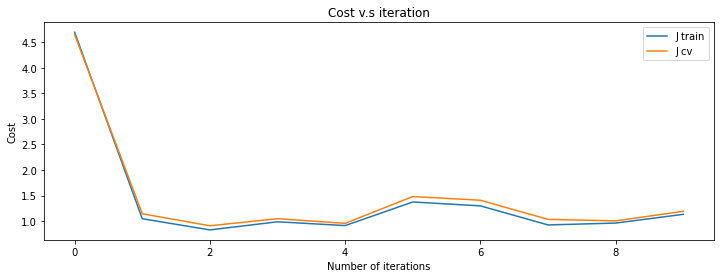

In [ ]:
#Running logistic gradient descent
w_final_lo,b_final_lo,J_train_history,J_cv_history = gradient_descent_lo(X_train_c,Y_train_c,w_initial_lo,b_initial_lo,0.00001,1000,0.8,0,predict_lo,compute_cost_lo,modify_data_lo)
plt.figure(figsize=(12,4))
plt.plot(J_train_history , label = "J train")
plt.plot(J_cv_history , label = "J cv")
plt.title("Cost v.s iteration")
plt.ylabel("Cost")
plt.xlabel("Number of iterations")
plt.legend()
plt.show()

As we see our cost function fluctuates so we apply z-score normalization on the data

Iteration : 0  Cost : 1.2892574227042162
Iteration : 100  Cost : 0.4668359679395677
Iteration : 200  Cost : 0.4310063400251607
Iteration : 300  Cost : 0.41296327313909703
Iteration : 400  Cost : 0.4011666137962928
Iteration : 500  Cost : 0.39247792489860883
Iteration : 600  Cost : 0.38562536204882986
Iteration : 700  Cost : 0.37997680243445286
Iteration : 800  Cost : 0.37517550896715846
Iteration : 900  Cost : 0.371001796208753


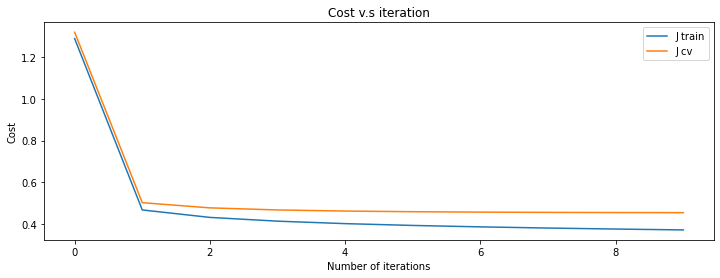

In [ ]:
X_train_cn,u,s = z_score_normalization(X_train_c)
w_final_lo,b_final_lo,J_train_history,J_cv_history = gradient_descent_lo(X_train_cn,Y_train_c,w_initial_lo,b_initial_lo,0.1,1000,0.8,0,predict_lo,compute_cost_lo,modify_data_lo)
plt.figure(figsize=(12,4))
plt.plot(J_train_history , label = "J train")
plt.plot(J_cv_history , label = "J cv")
plt.title("Cost v.s iteration")
plt.ylabel("Cost")
plt.xlabel("Number of iterations")
plt.legend()
plt.show()

Iteration : 0  Cost : 0.36731141909196086
Iteration : 100  Cost : 0.36400486420091605
Iteration : 200  Cost : 0.3610107077541242
Iteration : 300  Cost : 0.35827599193128246
Iteration : 400  Cost : 0.355760361636665
Iteration : 500  Cost : 0.3534323357386622
Iteration : 600  Cost : 0.35126685103970856
Iteration : 700  Cost : 0.34924359846114233
Iteration : 800  Cost : 0.3473458695257067
Iteration : 900  Cost : 0.3455597390959385


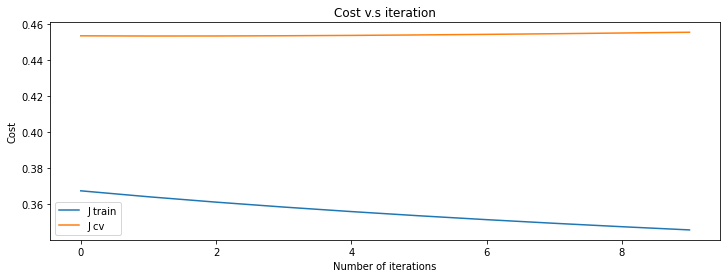

In [ ]:
#Further continuing the descent with  learning rate
w_final_lo,b_final_lo,J_train_history,J_cv_history = gradient_descent_lo(X_train_cn,Y_train_c,w_final_lo,b_final_lo,0.1,1000,0.8,0,predict_lo,compute_cost_lo,modify_data_lo)
plt.figure(figsize=(12,4))
plt.plot(J_train_history , label = "J train")
plt.plot(J_cv_history , label = "J cv")
plt.title("Cost v.s iteration")
plt.ylabel("Cost")
plt.xlabel("Number of iterations")
plt.legend()
plt.show()

The cost function has almost saturated now we compute accuracy

##Computing Accuracy of classification model

In [ ]:
def accuracy_lo(X,Y,w,b):
  m = len(Y) #Getting number of training examples
  probability,prediction = predict_lo(X,w,b)
  cnt = (Y == prediction).sum()
  return cnt/m

In [ ]:
a = accuracy_lo(X_train_cn,Y_train_c,w_final_lo,b_final_lo)
print(f"Accuracy:- {a*100}%")

Accuracy:- 87.47333333333333%


##Plotting the prediction
Here we used our trained model to make prediction on the training dataset(So it can be compared with the previous plot of the classification data in knn)

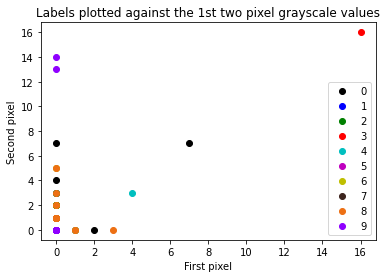

In [ ]:
#We will pick the first 2 features of our training dataset and plot it on the 2D plane(After normalization)
X_plot = X_train_c[:,:2]
X_plot_0 = []
X_plot_1 = []
X_plot_2 = []
X_plot_3 = []
X_plot_4 = []
X_plot_5 = []
X_plot_6 = []
X_plot_7 = []
X_plot_8 = []
X_plot_9 = []
probability,Y_plot = predict_lo(X_train_cn,w_final_lo,b_initial_lo)
for i in range(Y_train_c.size):
  if Y_plot[i] == 0:
    X_plot_0.append(X_plot[i])
  elif Y_plot[i] == 1:
    X_plot_1.append(X_plot[i])
  elif Y_plot[i] == 2:
    X_plot_2.append(X_plot[i])
  elif Y_plot[i] == 3:
    X_plot_3.append(X_plot[i])
  elif Y_plot[i] == 4:
    X_plot_4.append(X_plot[i])
  elif Y_plot[i] == 5:
    X_plot_5.append(X_plot[i])
  elif Y_plot[i] == 6:
    X_plot_6.append(X_plot[i])
  elif Y_plot[i] == 7:
    X_plot_7.append(X_plot[i])
  elif Y_plot[i] == 8:
    X_plot_8.append(X_plot[i])
  elif Y_plot[i] == 9:
    X_plot_9.append(X_plot[i])
X_0 = np.array(X_plot_0)
X_1 = np.array(X_plot_1)
X_2 = np.array(X_plot_2)
X_3 = np.array(X_plot_3)
X_4 = np.array(X_plot_4)
X_5 = np.array(X_plot_5)
X_6 = np.array(X_plot_6)
X_7 = np.array(X_plot_7)
X_8 = np.array(X_plot_8)
X_9 = np.array(X_plot_9)
plt.scatter(X_0[:,0],X_0[:,1],color='k',marker='o',label=0)
plt.scatter(X_1[:,0],X_1[:,1],color='b',marker='o',label=1)
plt.scatter(X_2[:,0],X_2[:,1],color='g',marker='o',label=2)
plt.scatter(X_3[:,0],X_3[:,1],color='r',marker='o',label=3)
plt.scatter(X_4[:,0],X_4[:,1],color='c',marker='o',label=4)
plt.scatter(X_5[:,0],X_5[:,1],color='m',marker='o',label=5)
plt.scatter(X_6[:,0],X_6[:,1],color='y',marker='o',label=6)
plt.scatter(X_7[:,0],X_7[:,1],color='#3d251e',marker='o',label=7)
plt.scatter(X_8[:,0],X_8[:,1],color='#ed7014',marker='o',label=8)
plt.scatter(X_9[:,0],X_9[:,1],color='#8f00ff',marker='o',label=9)
plt.title("Labels plotted against the 1st two pixel grayscale values")
plt.xlabel("First pixel")
plt.ylabel("Second pixel")
plt.legend()
plt.show()

##Visualizing performance of logistic model

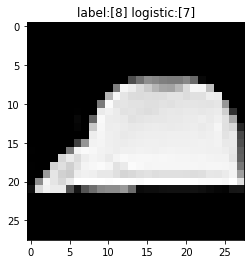

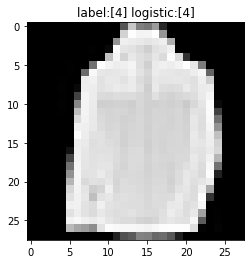

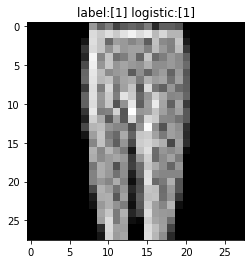

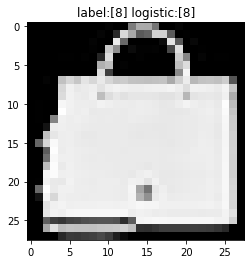

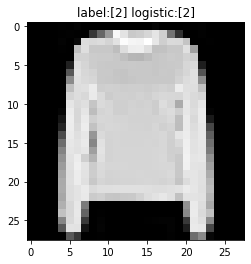

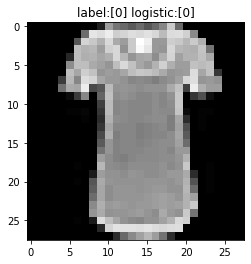

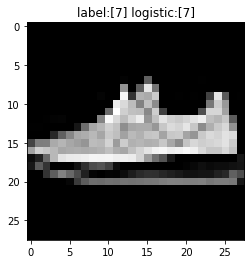

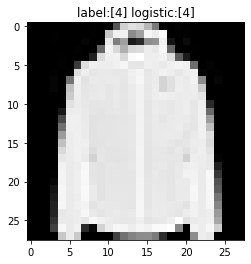

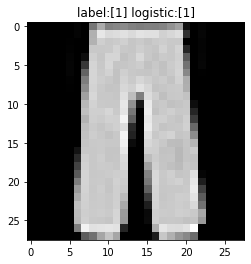

In [ ]:
for i in range(9):
  data = X_train_c[i].reshape(28,28)
  plt.imshow(data,cmap="Greys_r")
  prob,Y_lo = predict_lo(X_train_cn,w_final_lo,b_final_lo)
  ans = Y_lo[i]
  plt.title(f"label:{Y_train_c[i]} logistic:{ans}")
  plt.show()

##Generalizing Logistic Regression for n features(USING CLASSES)
Following code will later be used to make my own python library

In [ ]:
##Functions defined outside of classes are not to be directly accessible by the users of the library
def predict_lo(X,w,b):
  m,n = X.shape
  a = np.matmul(X,w.T) + b
  c = np.exp(a)
  d = np.sum(c,axis=1).reshape(m,1)
  probability = c/d
  prediction = probability.argmax(axis=1).reshape(m,1)
  return probability,prediction

def compute_cost_lo(X,Y,w,b):
  m = len(Y)
  probability,prediction = predict_lo(X,w,b)
  l = np.choose(Y.T,probability.T).T
  loss = (-1)*np.log(l)
  cost = np.sum(loss)/m
  return cost

def train_test_split(X,Y,ratio):
    m,n = X.shape
    a = m*ratio
    a = round(a)
    X_train_r = X[:a]
    X_cv_r = X[a:]
    Y_train_r = Y[:a]
    Y_cv_r = Y[a:]
    return X_train_r,X_cv_r,Y_train_r,Y_cv_r

def modify_data_lo(X,Y):
  Y_train_ca = np.bincount(Y.flatten())
  Y_train_ca = Y_train_ca.reshape(1,Y_train_ca.size)
  ab = pd.DataFrame(Y,columns = ["Category"])
  Y_train_cb = pd.get_dummies(ab,columns = ["Category"])
  Y_train_cb = np.array(Y_train_cb)
  return Y_train_cb,Y_train_ca

class LogisticRegression:
  def __init__(self,X,Y,alpha,l,iters,ratio):
    self.X,self.mean,self.std_dev = z_score_normalization(X)
    self.Y = Y
    m,n = self.X.shape
    self.m = m
    self.n = n
    self.k = len(np.unique(self.Y))
    self.alpha = alpha
    self.l = l
    self.iters = iters
    self.ratio = ratio
    np.random.seed(7)
    self.w = 0.0001*(np.random.randn(self.k,self.n)-0.5)
    self.b = np.random.randn(1,self.k)
    self.J_train_history = []
    self.J_cv_history = []
  
  def predict(self):  
    a = np.matmul(self.X,(self.w).T) + self.b
    c = np.exp(a)
    d = np.sum(c,axis=1).reshape(self.m,1)
    probability = c/d
    prediction = probability.argmax(axis=1).reshape(self.m,1)
    return probability,prediction
  
  def compute_cost(self):
    probability,prediction = self.predict()
    l = np.choose((self.Y).T,probability.T).T
    loss = (-1)*np.log(l)
    cost = np.sum(loss)/(self.m)
    return cost
  
  def gradient_descent(self):
    J_train_history = []
    J_cv_history = []
    X_train,X_cv,Y_train,Y_cv = train_test_split(self.X,self.Y,self.ratio)
    m,n = X_train.shape 
    Y_train = Y_train.astype(np.int64)
    Y_cv = Y_cv.astype(np.int64)
    X_w,X_b = modify_data_lo(X_train,Y_train)
    for i in range(self.iters):
      probability,prediction = predict_lo(X_train,self.w,self.b)
      dj_db = (np.sum(probability,axis=0).reshape(1,-1) - X_b)/m 
      dj_dw = ((self.l)*(self.w) - np.matmul((X_w - probability).T,X_train))/m
      self.w = self.w-self.alpha*dj_dw
      self.b = self.b-self.alpha*dj_db
      if i<=100000: 
        if i%(np.math.ceil(self.iters/10)) == 0:
          J_train_history.append(compute_cost_lo(X_train, Y_train, self.w, self.b))
          J_cv_history.append(compute_cost_lo(X_cv, Y_cv, self.w, self.b))
          print(f"Iteration :{i} Cost :{J_train_history[-1]}")   
    self.J_train_history = J_train_history
    self.J_cv_history = J_cv_history
    return self.w, self.b, J_train_history,J_cv_history 
  
  def reset_model(self):
    np.random.seed(7)
    self.w = 0.0001*(np.random.randn(self.k,self.n)-0.5)
    self.b = np.random.randn(1,self.k)
    self.J_train_history = []
    self.J_cv_history = []
  
  def accuracy(self):
    probability,prediction = self.predict()
    cnt = (self.Y == prediction).sum()
    return cnt/(self.m)

##Using our trained data to make a prediction on test dataset

In [ ]:
#Now we load and print our test data
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/classification_test.csv") #Loading data from google drive
classification_test_data = np.array(df) #Converting loaded data in a matrix
test_id_c = classification_test_data[:,0] #Getting the Id's of all labels
test_id_c = test_id_c.reshape(test_id_c.size,1)
X_test_c = classification_test_data[:,1:] #Extracting X_test
# Printing the first 5 rows of our loaded data
print("Input:-\n",X_test_c[:5])
print("Shape of test data:-",X_test_c.shape)
print("Test Id's:-\n",test_id_c[:5])

Input:-
 [[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ... 56  0  0]
 [ 0  0  0 ...  0  0  0]]
Shape of test data:- (10000, 784)
Test Id's:-
 [[25672]
 [59964]
 [66230]
 [50801]
 [83307]]


Now we make a prediction on the test data

In [ ]:
#We normalize data before making prediction
Xn,u,s = z_score_normalization(X_test_c)
X_test_cn = (X_test_c - u)/s
probability,Y_test_prediction_c = predict_lo(X_test_cn,w_final_lo,b_final_lo)

In [ ]:
#We also append the id's of data with our prediction
prediction_c = np.append(test_id_c,Y_test_prediction_c,axis=1)
print(prediction_c[:5])

[[25672     0]
 [59964     1]
 [66230     2]
 [50801     6]
 [83307     1]]


Now finally we export our prediction back into a csv file

In [ ]:
dfc=pd.DataFrame(prediction_c) #Convert matrix to dataframe
dfc.columns = ["ids","prediction"] #Set labels to our dataframe
dfc.to_csv("classification_test_prediction_logistic.csv",index=False)#Convert dataframe to csv file

Saving trained parameters for easier access later

In [ ]:
#These files can later be loaded using np.load()
np.save("logistic_w.npy",w_final_lo)
np.save("logistic_b.npy",b_final_lo)

In [ ]:
w_ans = np.load("logistic_w.npy")
b_ans = np.load("logistic_b.npy")
print("Weights:-\n",w_ans)
print("Bias:-\n",b_ans)

Weights:-
 [[ 4.60499744e-03  2.21762960e-02  4.65383559e-02 ...  1.95453129e-02
  -4.47485832e-02  6.81211513e-02]
 [-1.35315680e-04 -2.64694940e-02 -1.62258057e-02 ... -4.63252968e-02
  -3.40033643e-02 -1.44560067e-02]
 [-1.85692433e-02 -6.94154641e-02  6.25613916e-02 ...  2.91159408e-02
   6.40658608e-02 -2.09487875e-02]
 ...
 [ 1.13458923e-03  9.41934326e-04 -1.25674286e-03 ... -7.79246671e-03
  -8.09412217e-03 -4.42321021e-03]
 [-2.12564542e-02  6.89463911e-02 -4.68634154e-02 ...  9.99682028e-03
  -2.51726571e-02 -7.06657316e-02]
 [ 1.84305014e-05  6.96932272e-03 -3.27490221e-03 ...  1.95327241e-02
   5.82716751e-02  4.00430767e-03]]
Bias:-
 [[ 0.40224244  1.21445647 -1.04985312  1.67063337  0.01136874 -0.4596573
   1.47351049  0.14819014  1.17215525 -0.25959293]]


# Neural Networks

##Creating the model

In [ ]:
#For the L'th layer W is a matrix where each column corresponds to the weights of each neuron and b is the bias vector(with just 1 row)
def dense(A_in,W,b,activation,z_list):
  z = np.matmul(A_in,W) + b
  z_list.append(z)
  if activation == "sigmoid":
    A_out = 1/(1+np.exp(-z)) 
  elif activation == "linear":
    A_out = z
  elif activation == "relu":
    A_out = np.maximum(z,0)
  elif activation == "tanh":
    A_out = (np.exp(z) - np.exp(-z))/(np.exp(z) + np.exp(-z))
  elif activation == "softmax":
    a = np.exp(z)
    sum = np.sum(a,axis=1).reshape(-1,1)
    A_out = a/sum
  return A_out,z_list

In [ ]:
#Now we will constuct the gen_w_b function which will define the architecture of our neural network(Unilayer)
def gen_w_b(X,units):
  W_list = []
  b_list = []
  m,n = X.shape #m is no.of training examples
  np.random.seed(264)
  for i in range(len(units)):
    if i==0:
      W_list.append(0.0000001*(np.random.randn(n,units[0])-0.5))
    else:
      W_list.append(0.0000001*(np.random.randn(units[i-1],units[i])-0.5))
    b_list.append(0.0000001*(np.random.randn(1,units[i])-0.5))
  return W_list,b_list

##Forward propogation

In [ ]:
#Now this function will perform forward propogation in the network
def f_prop(X,W_list,b_list,activation):
  a_out = X
  z_list = []
  z_list.append(X)
  a_out_l = []
  a_out_l.append(X)
  for i in range(len(activation)):
    a_out,z_list = dense(a_out,W_list[i],b_list[i],activation[i],z_list)
    a_out_l.append(a_out)
  return a_out,z_list,a_out_l

##Cost function
The cost function of the neural network will depend on the type of problem we are solving.As the activation of the last neuron also depends on the type of problem we are solving

In [ ]:
def compute_cost(X,Y,W_list,b_list,activation,cost):
   m = len(Y) #Getting the number of training examples
   if cost == "mean_squared_error": #Regression problems
      f_wb,z_list,a_out_l = f_prop(X,W_list,b_list,activation)
      err = (f_wb - Y)**2
      err = err.reshape(m,1)
      cost = np.sum(err)/(2*m)
   elif cost == "binary_cross_entropy":  #Binary class classification
     f_wb,z_list,a_out_l = f_prop(X,W_list,b_list,activation)
     loss = -Y*np.log(f_wb)-(1-Y)*np.log(1-f_wb)
     cost = np.sum(loss)/m
   elif cost == "cross_entropy": #Multi class classification
      probability,z_list,a_out_l = f_prop(X,W_list,b_list,activation)
      Y = np.array(Y,dtype="int64")
      l = np.choose(Y.T,probability.T).T
      loss = (-1)*np.log(l)
      cost = np.sum(loss)/m
   return cost

##Regularized cost function

In [ ]:
def compute_cost_l(X,Y,W_list,b_list,activation,cost,l):
   m = len(Y) #Getting the number of training examples
   if cost == "mean_squared_error": #Regression problems
      f_wb,z_list,a_out_l = f_prop(X,W_list,b_list,activation)
      err = (f_wb - Y)**2
      err = err.reshape(m,1)
      cost = np.sum(err)/(2*m)
   elif cost == "binary_cross_entropy":  #Binary class classification
     f_wb,z_list,a_out_l = f_prop(X,W_list,b_list,activation)
     loss = -Y*np.log(f_wb)-(1-Y)*np.log(1-f_wb)
     cost = np.sum(loss)/m
   elif cost == "cross_entropy": #Multi class classification
      probability,z_list,a_out_l = f_prop(X,W_list,b_list,activation)
      l = np.choose(Y.T,probability.T).T
      loss = (-1)*np.log(l)
      cost = np.sum(loss)/m
   cnt = 0
   for i in range(len(W_list)):
     cnt+=np.sum((W_list[i])**2)
   cnt = (l/2*m)*cnt
   cost+=cnt
   return cost

## Back Propogation

In [ ]:
#Now we compute the function which has derivatives of all activation functions
def func_d(z,activation):
  if activation == "sigmoid":
    A_out = np.exp(-z)/(1+np.exp(-z))**2 
  elif activation == "linear":
    A_out = np.full(z.shape,1)
  elif activation == "relu":
    def d_relu(z):
      if z>0:
        return 1
      else:
        return 0
    d_relu = np.vectorize(d_relu)
    A_out = d_relu(z)
  elif activation == "tanh":
    a_out = (np.exp(z) - np.exp(-z))/(np.exp(z) + np.exp(-z))
    A_out = 1 - (a_out)**2
  elif activation == "softmax":
    a = np.exp(z)
    sum = np.sum(a,axis=1).reshape(-1,1)
    a_out = a/sum
    A_out = a_out - (a_out)**2
  return A_out

###Assumptions
For the neural network to work correctly it has been assumed that for the cost function "Binary cross entropy" and "Cross entropy" the activation of the output layer is "sigmoid" and "softmax" respectively.

In [ ]:
def b_prop(X,Y,W_list,b_list,activation,cost,l,a_out_l,z_list):
  m,o = X.shape
  n = len(activation)
  dj_dw = []
  dj_db = []
  if cost == "mean_squared_error":
    act = activation[-1]
    Y_s = Y
  elif cost == "cross_entropy":
    act = "linear"
    ab = pd.DataFrame(Y,columns = ["Category"])
    Y_s = pd.get_dummies(ab,columns = ["Category"])
    Y_s = np.array(Y_s)
  else:
    act = "linear"
    Y_s = Y
  if n==1:
    s = (a_out_l[-1]-Y_s)/m
    s = s*func_d(z_list[-1],act)
    dj_dw_i = np.matmul((a_out_l[-2]).T,s)
    dj_db_i = np.sum(s,axis=0).reshape(1,-1)
    dj_dw_i += (l/m)*W_list[-1]
    dj_dw.append(dj_dw_i)
    dj_db.append(dj_db_i)
  else:
    s = (a_out_l[-1]-Y_s)/m
    s = s*func_d(z_list[-1],act)
    dj_dw_i = np.matmul((a_out_l[-2]).T,s)
    dj_db_i = np.sum(s,axis=0).reshape(1,-1)
    dj_dw_i += (l/m)*W_list[-1]
    dj_dw.append(dj_dw_i)
    dj_db.append(dj_db_i)
    for i in range(2,n+1):
      s = np.matmul(s,(W_list[1-i]).T)
      s = s*func_d(z_list[-i],activation[-i])
      dj_dw_i = np.matmul((a_out_l[-(i+1)]).T,s)
      dj_db_i = np.sum(s,axis=0).reshape(1,-1)
      dj_dw_i += (l/m)*W_list[-i]
      dj_dw.append(dj_dw_i)
      dj_db.append(dj_db_i)
  dj_dw.reverse()
  dj_db.reverse()
  return dj_dw,dj_db

##Gradient Descent

In [ ]:
def gradient_descent_nn(X,Y,W_list,b_list,alpha,iters,ratio,l,cost,activation):
  J_train_history = [] #We create a list containg cost after every iteration(For later plotting and analysis)
  J_cv_history = []
  W_list = W_list.copy()
  b_list = b_list
  X_train,X_cv,Y_train,Y_cv = train_test_split(X,Y,ratio)
  m,n = X_train.shape #Getting the number of training examples
  for i in range(iters):
    #Compute gradient dj_dw and dj_db
    f_wb,z_list,a_out_l = f_prop(X_train,W_list,b_list,activation)
    dj_dw,dj_db = b_prop(X_train,Y_train,W_list,b_list,activation,cost,l,a_out_l,z_list)
    #Update parameters W,b (Simultaneously)
    for j in range(len(W_list)):
      W_list[j] = W_list[j] - alpha*(dj_dw[j])
      b_list[j] = b_list[j] - alpha*(dj_db[j])
    #Record Cost J after every iteration
    #Note:- Even though we have applied regularization the method for computing training and testing error is still same
    J_train_history.append(compute_cost(X_train,Y_train,W_list,b_list,activation,cost)) #Add the current cost to J_history
    J_cv_history.append(compute_cost(X_cv,Y_cv,W_list,b_list,activation,cost))
    # Print cost after interval of 10 times,[-1] refers to the last element(reverse indexing)
    if i%(np.math.ceil(iters / 10)) == 0:
      print("Iteration :",i," Cost :",J_train_history[-1]) #F-strings used to encode variables i and J_history  
  return W_list, b_list, J_train_history,J_cv_history #return final w,b and J_history(for graphing)

##Unilayer regression by neural network

###Neural network trained on linear train data(single layer)

In [ ]:
#Now we load and print our training data
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/linear_train.csv") #Loading data from google drive
linear_train_data = np.array(df) #Converting loaded data in a matrix
X_train_l = linear_train_data[:,1:21] #Extracting X_train(Input data)
Y_train_l = linear_train_data[:,21] ##Extracting Y_train(Labels)
Y_train_l = Y_train_l.reshape(Y_train_l.size,1)
# Printing the first 5 rows of our loaded data
print("Input\n",X_train_l[:5])
print("labels\n",Y_train_l[:5])
print(X_train_l.shape)
print(Y_train_l.shape)

Input
 [[-2.84685568e+02  2.84567363e+02  1.84627063e+01  1.23804349e-02
  -5.23945804e+01 -9.42412935e-01  6.74619000e+00  1.95956259e+01
   5.54989342e+02  1.56015074e+03  7.24516543e+01  3.34519920e+01
  -9.17121371e+00  5.28122484e+02 -1.95959388e+03 -4.73485285e+01
   7.67129260e+02 -1.20010842e+01  8.39780551e+01  7.37317448e+02]
 [-4.28480005e+02  3.07240676e+02  2.26328973e+01 -9.96571386e-02
   6.29468547e+00  3.04407459e+01  9.59197746e+01 -5.24509925e+01
  -8.72531179e+02  1.54493351e+03  1.37910992e+02  1.48483314e+01
  -3.35568666e+01 -5.69261772e+02 -2.01446309e+03  2.00421324e+01
   7.69298704e+02  1.80573704e+01 -5.55216301e+01  7.75407458e+02]
 [-2.58008787e+01  2.37433758e+02 -4.67504670e-01 -1.15813166e-01
  -7.83707930e+00  2.15989215e+01  1.58095089e+02  2.55439748e+00
   1.36298244e+02  1.55070566e+03  9.15344488e+01 -1.26624490e+01
   2.89563090e+01  1.06950459e+03 -1.93252477e+03  1.84196836e+01
   7.81523541e+02  7.06526251e+01  3.02121708e+02  8.10402101e+02]


In [ ]:
#Normalizing the data
X_train_ln,u,s = z_score_normalization(X_train_l)
print("Normalized Data:-",X_train_ln[:5])
print("Mean of orignal data:-",u)
print("std_dev of orignal data:-",s)

Normalized Data:- [[-9.97229965e-01  1.20760112e+00  6.47141731e-01  5.58979636e-02
  -1.82633253e+00 -1.66062592e+00 -1.97997505e+00  6.92966534e-01
   2.45635721e+00  1.15316986e-03 -2.01506848e+00  1.17952361e+00
  -3.21477112e-01  9.29032750e-01  9.29032750e-01 -1.65097309e+00
   7.79641579e-02 -4.23566850e-01  1.47061762e-01 -1.81833211e+00]
 [-1.50051622e+00  2.00042615e+00  7.92971133e-01 -4.64416390e-01
   2.24844480e-01  5.21365212e-01  1.14846851e+00 -1.82080832e+00
  -2.52310984e+00 -5.32708976e-01  2.75708674e-01  5.29524455e-01
  -1.17286557e+00 -9.94084367e-01 -9.94084367e-01  6.97648543e-01
   1.53589938e-01  6.28584832e-01 -8.31581001e-01 -4.80629454e-01]
 [-9.11232394e-02 -4.40534845e-01 -1.48378631e-02 -5.39446690e-01
  -2.69057609e-01 -9.33843247e-02  3.32974183e+00  9.83819090e-02
   9.95881864e-01 -3.30206209e-01 -1.34725803e+00 -4.31683365e-01
   1.00968809e+00  1.87778082e+00  1.87778082e+00  6.41104828e-01
   5.79741858e-01  2.46960382e+00  1.67742154e+00  7.483

In [ ]:
units_lin = [20,1]
activation_lin = ["relu","linear"]
W_lin,b_lin = gen_w_b(X_train_ln,units_lin)

Iteration : 0  Cost : 30434.83604219371
Iteration : 100  Cost : 30402.007765996314
Iteration : 200  Cost : 5153.198441234275
Iteration : 300  Cost : 4812.365100435765
Iteration : 400  Cost : 4772.67239584571
Iteration : 500  Cost : 4772.428962919995
Iteration : 600  Cost : 4772.377909250503
Iteration : 700  Cost : 4772.291929180327
Iteration : 800  Cost : 4772.098795343477
Iteration : 900  Cost : 4771.863789798615


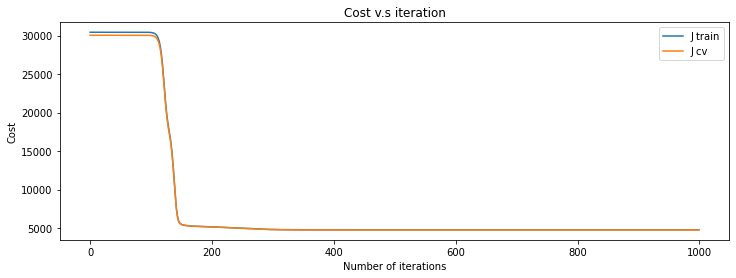

In [ ]:
#Running gradient descent for neural network
W_lin,b_lin,J_train_history,J_cv_history = gradient_descent_nn(X_train_ln,Y_train_l,W_lin,b_lin,0.001,1000,0.8,0,"mean_squared_error",activation_lin)
plt.figure(figsize=(12,4))
plt.plot(J_train_history , label = "J train")
plt.plot(J_cv_history , label = "J cv")
plt.title("Cost v.s iteration")
plt.ylabel("Cost")
plt.xlabel("Number of iterations")
plt.legend()
plt.show()

###Neural network trained on polynomial train data(single layer)

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/polynomial_train.csv") #Loading data from google drive
polynomial_train_data = np.array(df) #Converting loaded data in a matrix
X_train_p = polynomial_train_data[:,1:4]
Y_train_p = polynomial_train_data[:,4]
Y_train_p = Y_train_p.reshape(Y_train_p.size,1)

In [ ]:
print(X_train_p[:5])
print(Y_train_p[:5])

[[-1113.92458108   952.10540425  -276.04588086]
 [-2229.48022767  1111.48856784   -93.4541072 ]
 [ 2717.25771283    53.43123706  -179.22859092]
 [-1638.78396509  -632.91944742  -106.17023734]
 [ 5173.93433792  -721.89557709   -75.07484001]]
[[-1.29428892e+03]
 [-2.71468701e+04]
 [ 6.47430017e+04]
 [-7.34987079e+03]
 [ 1.65132815e+06]]


In [ ]:
def combo(k,i):
  if(k == 1):
    return np.array([[i]],dtype=int)
  matrix = np.empty((0,k),dtype=int)
  for j in range(i+1):
    m,n = combo(k-1,j).shape
    a = np.full([m,1],i-j,dtype=int)
    mt = np.append(a,combo(k-1,j),axis=1)
    matrix = np.append(matrix,mt,axis = 0)
  return matrix

def get_terms(X,d):
  m,n = X.shape
  e = np.empty((m,0))
  for i in range(1,d+1): 
    c = np.empty((m,0))
    mat = combo(n,i)
    a,b = mat.shape
    for j in range(a):
      f = np.prod(np.power(X,mat[j]),axis=1)
      f = f.reshape(m,1)
      c = np.append(c,f,axis = 1)
    e = np.append(e,c,axis=1)
  return e

In [ ]:
#Getting the terms for a 3 degree polynomial
X_train_pm = get_terms(X_train_p,5)
print(X_train_pm[:5])
print(X_train_pm.shape)

[[-1.11392458e+03  9.52105404e+02 -2.76045881e+02  1.24082797e+06
  -1.06057361e+06  3.07494292e+05  9.06504701e+05 -2.62824775e+05
   7.62013283e+04 -1.38218878e+09  1.18139902e+09 -3.42525451e+08
  -1.00977787e+09  2.92766977e+08 -8.48825328e+07  8.63088025e+08
  -2.50236889e+08  7.25516965e+07 -2.10350628e+07  1.53965406e+12
  -1.31598941e+12  3.81547519e+11  1.12481639e+12 -3.26120333e+11
   9.45527397e+10 -9.61414966e+11  2.78745021e+11 -8.08171182e+10
   2.34314735e+10  8.21750773e+11 -2.38251894e+11  6.90768623e+10
  -2.00275970e+10  5.80664244e+09 -1.71505850e+15  1.46591295e+15
  -4.25015160e+14 -1.25296063e+15  3.63273455e+14 -1.05324621e+14
   1.07094376e+15 -3.10500931e+14  9.00241745e+13 -2.61008943e+13
  -9.15368385e+14  2.65394641e+14 -7.69464150e+13  2.23092326e+13
  -6.46816175e+12  7.82393352e+14 -2.26840916e+14  6.57684540e+13
  -1.90683833e+13  5.52853565e+12 -1.60289973e+12]
 [-2.22948023e+03  1.11148857e+03 -9.34541072e+01  4.97058209e+06
  -2.47804179e+06  2.0835

In [ ]:
#Normalizing the data
X_train_pmn,u,s = z_score_normalization(X_train_pm)
print("Normalized Data:-",X_train_pmn[:5])
print("Mean of orignal data:-",u)
print("std_dev of orignal data:-",s)

Normalized Data:- [[-4.13847686e-01  9.81327881e-01 -1.77549966e+00 -5.98373873e-01
  -4.96850944e-01  6.74999167e-01  4.16404144e-01 -1.89084440e+00
   2.17658081e+00 -3.00079882e-02 -8.71771960e-02  4.37675673e-01
  -3.63296744e-01  8.24319963e-01 -8.62123770e-01  2.83184379e-01
  -1.18440351e+00  2.55849345e+00 -2.30563662e+00 -3.11229296e-01
  -1.99137240e-02  3.87515991e-02 -2.65371908e-01 -8.87502218e-03
  -2.87957551e-01 -1.99456957e-01  6.00685602e-01 -1.06583913e+00
   9.61263369e-01 -4.55578638e-02 -6.41450660e-01  1.72252703e+00
  -2.93140331e+00  2.24409339e+00 -4.87792739e-03 -1.02026771e-01
   2.71068877e-01 -1.81943669e-02  2.99128756e-02 -4.30366585e-02
  -9.69732721e-02  1.72275325e-01  8.90463825e-02  1.71559477e-01
  -9.25623894e-02  3.26402470e-01 -7.69217252e-01  1.19910205e+00
  -9.71776864e-01 -3.21111756e-02 -1.30352074e-01  8.95888836e-01
  -2.02248338e+00  3.00698324e+00 -2.03924002e+00]
 [-8.05078008e-01  1.20523369e+00  7.89920950e-01 -2.74647177e-01
  -1.15

In [ ]:
units_poly = [20,1]
activation_poly = ["relu","linear"]
W_poly,b_poly = gen_w_b(X_train_pmn,units_poly)

Iteration : 0  Cost : 3153645166633.5425
Iteration : 100  Cost : 64356393552.10783
Iteration : 200  Cost : 51035471883.13266
Iteration : 300  Cost : 17432014545.973907
Iteration : 400  Cost : 12329820075.233047
Iteration : 500  Cost : 8660166670.237762
Iteration : 600  Cost : 6551305212.516223
Iteration : 700  Cost : 6842751282.281663
Iteration : 800  Cost : 5207453161.725622
Iteration : 900  Cost : 4382922081.644615


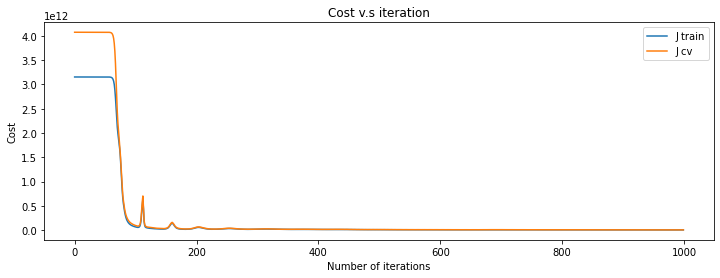

In [ ]:
#Takes a lot of time
W_poly,b_poly,J_train_history,J_cv_history = gradient_descent_nn(X_train_pmn,Y_train_p,W_poly,b_poly,0.0000001,1000,0.8,0,"mean_squared_error",activation_poly)
plt.figure(figsize=(12,4))
plt.plot(J_train_history , label = "J train")
plt.plot(J_cv_history , label = "J cv")
plt.title("Cost v.s iteration")
plt.ylabel("Cost")
plt.xlabel("Number of iterations")
plt.legend()
plt.show()

###Neural network trained on classification data(single layer)

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/classification_train.csv") #Loading data from google drive
classification_train_data = np.array(df) #Converting loaded data in a matrix
X_train_c = classification_train_data[:,2:786]
Y_train_c = classification_train_data[:,1]
Y_train_c = Y_train_c.reshape(Y_train_c.size,1)

In [ ]:
print(X_train_c[:5])
print(Y_train_c[:5])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[8]
 [4]
 [1]
 [8]
 [2]]


In [ ]:
#Normalizing the data
X_train_cn,u,s = z_score_normalization(X_train_c)
print("Normalized Data:-",X_train_cn[:5])

Normalized Data:- [[-0.01100826 -0.02635862 -0.03452104 ... -0.15842376 -0.09071855
  -0.03516399]
 [-0.01100826 -0.02635862 -0.03452104 ... -0.15842376 -0.09071855
  -0.03516399]
 [-0.01100826 -0.02635862 -0.03452104 ... -0.15842376 -0.09071855
  -0.03516399]
 [-0.01100826 -0.02635862 -0.03452104 ... -0.15842376 -0.09071855
  -0.03516399]
 [-0.01100826 -0.02635862 -0.03452104 ... -0.15842376 -0.09071855
  -0.03516399]]


In [ ]:
units_cl = [100,10]
activation_cl = ["relu","softmax"]
W_cl,b_cl = gen_w_b(X_train_cn,units_cl)

Iteration : 0  Cost : 2.3025846117819646
Iteration : 100  Cost : 1.748567855040293
Iteration : 200  Cost : 0.899030277252443
Iteration : 300  Cost : 0.5806661193206272
Iteration : 400  Cost : 0.49001160527723336
Iteration : 500  Cost : 0.44617868769634794
Iteration : 600  Cost : 0.4211193097528776
Iteration : 700  Cost : 0.4032573355271811
Iteration : 800  Cost : 0.3891138437507029
Iteration : 900  Cost : 0.3770705386229412


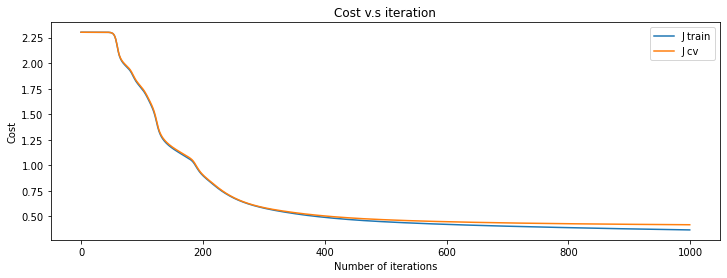

In [ ]:
W_cl,b_cl,J_train_history,J_cv_history = gradient_descent_nn(X_train_cn,Y_train_c,W_cl,b_cl,0.1,1000,0.8,0,"cross_entropy",activation_cl)
plt.figure(figsize=(12,4))
plt.plot(J_train_history , label = "J train")
plt.plot(J_cv_history , label = "J cv")
plt.title("Cost v.s iteration")
plt.ylabel("Cost")
plt.xlabel("Number of iterations")
plt.legend()
plt.show()

##Genralizing neural network for n layers using classes

In [ ]:
def z_score_normalization(X):
  m,n = (X).shape
  mean = np.sum(X,axis=0)/m 
  mean = mean.reshape(1,-1)
  sq_X = X**2 
  sq_mean = np.sum(sq_X,axis=0)/m 
  sq_mean = sq_mean.reshape(1,-1)
  std_dev = np.sqrt(sq_mean - (mean)**2) 
  std_dev = std_dev.reshape(1,-1)
  X_normalized = (X - mean)/std_dev 
  return X_normalized, mean, std_dev

def train_test_split(X,Y,ratio):
    m,n = X.shape
    a = m*ratio
    a = round(a)
    Z = np.append(X,Y,axis=1)
    np.random.seed(261)
    np.random.shuffle(Z)
    X = Z[:,:-1]
    Y = Z[:,-1]
    Y = Y.reshape(Y.size,1)
    X_train_r = X[:a]
    X_cv_r = X[a:]
    Y_train_r = Y[:a]
    Y_cv_r = Y[a:]
    return X_train_r,X_cv_r,Y_train_r,Y_cv_r

def dense(A_in,W,b,activation,z_list):
  z = np.matmul(A_in,W) + b
  z_list.append(z)
  if activation == "sigmoid":
    A_out = 1/(1+np.exp(-z)) 
  elif activation == "linear":
    A_out = z
  elif activation == "relu":
    A_out = np.maximum(z,0)
  elif activation == "tanh":
    A_out = (np.exp(z) - np.exp(-z))/(np.exp(z) + np.exp(-z))
  elif activation == "softmax":
    a = np.exp(z)
    sum = np.sum(a,axis=1).reshape(-1,1)
    A_out = a/sum
  return A_out,z_list

def gen_w_b(X,units):
  W_list = []
  b_list = []
  m,n = X.shape 
  np.random.seed(111)
  for i in range(len(units)):
    if i==0:
      W_list.append(1*(np.random.randn(n,units[0])-0.5))
    else:
      W_list.append(1*(np.random.randn(units[i-1],units[i])-0.5))
    b_list.append(1*(np.random.randn(1,units[i])-0.5))
  return W_list,b_list

def f_prop(X,W_list,b_list,activation):
  a_out = X
  z_list = []
  z_list.append(X)
  a_out_l = []
  a_out_l.append(X)
  for i in range(len(activation)):
    a_out,z_list = dense(a_out,W_list[i],b_list[i],activation[i],z_list)
    a_out_l.append(a_out)
  return a_out,z_list,a_out_l

def compute_cost(X,Y,W_list,b_list,activation,cost):
   m = len(Y)
   if cost == "mean_squared_error": 
      f_wb,z_list,a_out_l = f_prop(X,W_list,b_list,activation)
      err = (f_wb - Y)**2
      err = err.reshape(m,1)
      cost = np.sum(err)/(2*m)
   elif cost == "binary_cross_entropy":  
     f_wb,z_list,a_out_l = f_prop(X,W_list,b_list,activation)
     loss = -Y*np.log(f_wb)-(1-Y)*np.log(1-f_wb)
     cost = np.sum(loss)/m
   elif cost == "cross_entropy": 
      probability,z_list,a_out_l = f_prop(X,W_list,b_list,activation)
      Y = np.array(Y,dtype="int64")
      l = np.choose(Y.T,probability.T).T
      loss = (-1)*np.log(l)
      cost = np.sum(loss)/m
   return cost

def func_d(z,activation):
  if activation == "sigmoid":
    A_out = np.exp(-z)/(1+np.exp(-z))**2 
  elif activation == "linear":
    A_out = np.full(z.shape,1)
  elif activation == "relu":
    def d_relu(z):
      if z>0:
        return 1
      else:
        return 0
    d_relu = np.vectorize(d_relu)
    A_out = d_relu(z)
  elif activation == "tanh":
    a_out = (np.exp(z) - np.exp(-z))/(np.exp(z) + np.exp(-z))
    A_out = 1 - (a_out)**2
  elif activation == "softmax":
    a = np.exp(z)
    sum = np.sum(a,axis=1).reshape(-1,1)
    a_out = a/sum
    A_out = a_out - (a_out)**2
  return A_out

def b_prop(X,Y,W_list,b_list,activation,cost,l,a_out_l,z_list):
  m,o = X.shape
  n = len(activation)
  dj_dw = []
  dj_db = []
  if cost == "mean_squared_error":
    act = activation[-1]
    Y_s = Y
  elif cost == "cross_entropy":
    act = "linear"
    ab = pd.DataFrame(Y,columns = ["Category"])
    Y_s = pd.get_dummies(ab,columns = ["Category"])
    Y_s = np.array(Y_s)
  else:
    act = "linear"
    Y_s = Y
  if n==1:
    s = (a_out_l[-1]-Y_s)/m
    s = s*func_d(z_list[-1],act)
    dj_dw_i = np.matmul((a_out_l[-2]).T,s)
    dj_db_i = np.sum(s,axis=0).reshape(1,-1)
    dj_dw_i += (l/m)*W_list[-1]
    dj_dw.append(dj_dw_i)
    dj_db.append(dj_db_i)
  else:
    s = (a_out_l[-1]-Y_s)/m
    s = s*func_d(z_list[-1],act)
    dj_dw_i = np.matmul((a_out_l[-2]).T,s)
    dj_db_i = np.sum(s,axis=0).reshape(1,-1)
    dj_dw_i += (l/m)*W_list[-1]
    dj_dw.append(dj_dw_i)
    dj_db.append(dj_db_i)
    for i in range(2,n+1):
      s = np.matmul(s,(W_list[1-i]).T)
      s = s*func_d(z_list[-i],activation[-i])
      dj_dw_i = np.matmul((a_out_l[-(i+1)]).T,s)
      dj_db_i = np.sum(s,axis=0).reshape(1,-1)
      dj_dw_i += (l/m)*W_list[-i]
      dj_dw.append(dj_dw_i)
      dj_db.append(dj_db_i)
  dj_dw.reverse()
  dj_db.reverse()
  return dj_dw,dj_db

def gradient_descent_nn(X,Y,W_list,b_list,alpha,iters,ratio,l,cost,activation):
  J_train_history = [] 
  J_cv_history = []
  W_list = W_list.copy()
  b_list = b_list
  X_train,X_cv,Y_train,Y_cv = train_test_split(X,Y,ratio)
  m,n = X_train.shape 
  for i in range(iters):
    f_wb,z_list,a_out_l = f_prop(X_train,W_list,b_list,activation)
    dj_dw,dj_db = b_prop(X_train,Y_train,W_list,b_list,activation,cost,l,a_out_l,z_list)
    for j in range(len(W_list)):
      W_list[j] = W_list[j] - alpha*(dj_dw[j])
      b_list[j] = b_list[j] - alpha*(dj_db[j])
    J_train_history.append(compute_cost(X_train,Y_train,W_list,b_list,activation,cost)) 
    J_cv_history.append(compute_cost(X_cv,Y_cv,W_list,b_list,activation,cost))
    if i%(np.math.ceil(iters / 10)) == 0:
      print("Iteration :",i," Cost :",J_train_history[-1])   
  return W_list, b_list, J_train_history,J_cv_history 

class NeuralNetwork:
  def __init__(self,X,Y,units,activation,cost,alpha,iters,ratio,l):
    self.X,u,s = z_score_normalization(X)
    self.Y = Y
    self.units = units
    self.activation = activation
    self.cost = cost
    self.w,self.b = gen_w_b(self.X,self.units)
    self.alpha = alpha
    self.iters = iters
    self.ratio = ratio
    self.l = l
    self.J_train_history = []
    self.J_cv_history = []
  
  def predict(self):
    a_out,g1,g2 = f_prop(self.X,self.w,self.b,self.activation)
    if self.cost == "binary_cross_entropy":
      def d_s(z):
        if z>=0.5:
          return 1
        else:
          return 0
      d_s = np.vectorize(d_s)
      A_out = d_s(a_out)
    elif self.cost == "cross_entropy":
      m,n = a_out.shape
      A_out = a_out.argmax(axis=1).reshape(m,1)
    else:
      A_out=a_out
    return A_out
  
  def compute_cost(self):
    return compute_cost(self.X,self.Y,self.w,self.b,self.activation,self.cost)
  
  def gradient_descent(self):
    self.w,self.b,self.J_train_history,self.J_cv_history = gradient_descent_nn(self.X,self.Y,self.w,self.b,self.alpha,self.iters,self.ratio,self.l,self.cost,self.activation)
    return self.w,self.b,self.J_train_history,self.J_cv_history

  def accuracy(self):
    if self.cost == "binary_cross_entropy" or self.cost == "cross_entropy":
      m,n = self.Y.shape
      cnt = (self.predict() == self.Y).sum()
      acc = cnt/(m)
    else:
      m,n = self.Y.shape
      mean = np.sum(self.Y)/m
      sq_Y = (self.Y)**2 
      sq_mean = np.sum(sq_Y)/m 
      var_y = sq_mean - (mean)**2 
      acc = 1 -2*(self.compute_cost())/(var_y) 
    return acc

  def reset_model(self):
    self.w,self.b = gen_w_b(self.X,self.units)
    self.J_cv_history = []
    self.J_cv_history = []

###Regression neural network for linear data

In [ ]:
m,n = X_train_l.shape
print(0.8*m)

40000.0


In [ ]:
#Defining the network
nn_l = NeuralNetwork(X_train_l,Y_train_l,[20,10,5,1],["relu","relu","relu","linear"],"mean_squared_error",0.0001,1000,0.8,0)

In [ ]:
#Prediction
print(nn_l.predict())

[[ 0.81338808]
 [ 8.88628017]
 [-0.30239918]
 ...
 [ 0.81338808]
 [ 0.67483012]
 [ 6.97319868]]


In [ ]:
#Computing cost
print(nn_l.compute_cost())

30119.295523821635


Iteration : 0  Cost : 30016.37657795735
Iteration : 100  Cost : 7617.574481554155
Iteration : 200  Cost : 5283.3513055249205
Iteration : 300  Cost : 5062.244001898572
Iteration : 400  Cost : 4970.76970152499
Iteration : 500  Cost : 4919.0172792632
Iteration : 600  Cost : 4884.767141034406
Iteration : 700  Cost : 4861.266446998209
Iteration : 800  Cost : 4843.721712015809
Iteration : 900  Cost : 4829.659580718229


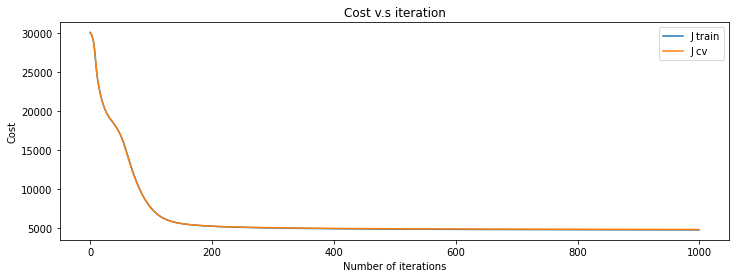

In [ ]:
#Running gradient descent
nn_l.reset_model()
nn_l.w,nn_l.b,J_train_history,J_cv_history = nn_l.gradient_descent()
plt.figure(figsize=(12,4))
plt.plot(J_train_history , label = "J train")
plt.plot(J_cv_history , label = "J cv")
plt.title("Cost v.s iteration")
plt.ylabel("Cost")
plt.xlabel("Number of iterations")
plt.legend()
plt.show()

In [ ]:
#Running for another 1000 iterations
nn_l.w,nn_l.b,J_train_history,J_cv_history = nn_l.gradient_descent()
plt.figure(figsize=(12,4))
plt.plot(J_train_history , label = "J train")
plt.plot(J_cv_history , label = "J cv")
plt.title("Cost v.s iteration")
plt.ylabel("Cost")
plt.xlabel("Number of iterations")
plt.legend()
plt.show()

Iteration : 0  Cost : 4817.745527778063
Iteration : 100  Cost : 4807.394065312107
Iteration : 200  Cost : 4798.7718312369125
Iteration : 300  Cost : 4791.436921572995
Iteration : 400  Cost : 4785.285681211796
Iteration : 500  Cost : 4780.161497662352
Iteration : 600  Cost : 4775.761554710601
Iteration : 700  Cost : 4771.932301550415
Iteration : 800  Cost : 4768.647393771692


In [ ]:
#Running for another 500 iterations
nn_l.iters = 500
nn_l.w,nn_l.b,J_train_history,J_cv_history = nn_l.gradient_descent()
plt.figure(figsize=(12,4))
plt.plot(J_train_history , label = "J train")
plt.plot(J_cv_history , label = "J cv")
plt.title("Cost v.s iteration")
plt.ylabel("Cost")
plt.xlabel("Number of iterations")
plt.legend()
plt.show()

### Computing accuracy

In [ ]:
#Computing accuracy
print("Accuracy:",nn_l.accuracy()*100,"%")

Accuracy: 84.2902550933637 %


###Making a prediction on test dataset

In [ ]:
#Now we load and print our test data
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/linear_test_data.csv") #Loading data from google drive
linear_test_data = np.array(df) #Converting loaded data in a matrix
test_id = linear_test_data[:,0] #Getting the Id's of all labels
test_id = test_id.reshape(test_id.size,1)
X_test = linear_test_data[:,1:21] #Extracting X_test
# Printing the first 5 rows of our loaded data
print("Input:-\n",X_test[:5])
print("Shape of test data:-",X_test.shape)
print("Test Id's:-\n",test_id[:5])

Input:-
 [[ 1.46790641e+02  2.23711806e+02 -8.81370769e-01 -3.22720648e-01
  -6.01713281e+00  4.71780307e+01  3.56027114e+01 -8.93331718e+00
   9.53860762e+01  1.51000080e+03  1.81354189e+02 -7.96667078e+00
   4.60404718e+01  6.61719092e+02 -1.95291405e+03 -5.49544410e+00
   8.15628857e+02  4.88054597e+00  1.25785551e+02  8.00204772e+02]
 [ 3.32536530e+01  2.85935229e+02 -3.35261115e+00  2.07564961e-01
   2.78653332e+01  1.45097164e+01  3.92818477e+01 -4.86443143e+00
  -5.95380114e+02  1.56528744e+03  1.45700293e+02  3.16793720e+01
   7.40357985e+01  4.79886479e+02 -1.96200568e+03  3.29002076e+01
   7.52489552e+02  3.07482642e+01  1.30832421e+02  7.36119143e+02]
 [ 1.80531799e+02  2.08420343e+02  9.84618777e+00  5.60998188e-02
  -5.84284956e+01  3.02145173e+01  6.62515809e+01  3.15233551e+01
  -4.43783229e+02  1.59533095e+03  1.06941506e+02  4.03398423e+01
  -1.46387842e+00 -1.19202069e+03 -2.04560103e+03  7.89492522e+01
   7.62424938e+02 -4.42265754e+01  7.93928048e+00  8.33656738e+02

In [ ]:
#Before making a prediction we first have to normalize our data
X_train_normalized,mean,std_dev = z_score_normalization(X_train_l)
X_test_normalized = (X_test -mean)/std_dev
nn_l.X = X_test_normalized
Y_test_prediction = nn_l.predict()
#We also append the id's of data with our prediction
prediction = np.append(test_id,Y_test_prediction,axis = 1)
print(prediction[:5])

[[ 9.63960000e+04 -1.26932049e+01]
 [ 8.01660000e+04  1.63642367e+02]
 [ 2.05160000e+04  6.96617597e+01]
 [ 8.88810000e+04 -9.44618283e+01]
 [ 6.91150000e+04  2.84805040e+01]]


Now finally we export our prediction back into a csv file

In [ ]:
dfp=pd.DataFrame(prediction) #Convert matrix to dataframe
dfp.columns = ["ids","prediction"] #Set labels to our dataframe
dfp.to_csv("neural_network_linear_test_prediction.csv",index=False)#Convert dataframe to csv file

Also for ease of acess we store our trained w and b in npy files

In [ ]:
#These files can later be loaded using np.load()
np.savez("neural_network_linear_w",*nn_l.w)
np.savez("neural_network_linear_b",*nn_l.b)

In [ ]:
w_ans = np.load("neural_network_linear_w.npz")
b_ans = np.load("neural_network_linear_b.npz")
for i in range(len(w_ans)):
  print(f"Weight {i}:-\n",w_ans[f'arr_{i}'])
  print(f"Bias {i}:-\n",b_ans[f'arr_{i}'])

Weight 0:-
 [[-1.83105689e+00  2.41045767e+00  1.04003154e+00 -1.51291025e+00
  -2.30751004e+00 -5.84046664e-01 -1.01043174e+00  8.19397559e-01
  -1.46027728e+00 -1.33187121e+00 -8.12795152e-01 -1.52260272e+00
  -1.33068133e+00 -4.88084719e-01 -9.24403814e-01 -1.06071105e+00
  -1.55034772e+00 -3.14030940e-01 -1.37990397e+00 -3.90364247e-01]
 [-1.23899229e+00  2.07167734e+00 -1.54666918e+00 -1.24668889e+00
  -8.22744394e-01  7.45550507e-01 -2.14367645e+00  1.09709543e+00
  -7.25012050e-01  2.14103623e+00  6.94156274e-01 -1.28432324e+00
  -1.03998125e+00 -1.81506142e+00  4.65343043e-02 -1.25242834e+00
  -1.25865305e+00 -5.16713418e-01 -2.41881923e+00 -1.43829256e+00]
 [-1.90312157e+00  3.19974054e+00 -8.55847233e-01 -2.26194822e+00
  -1.86620285e+00  1.94507867e+00  1.88627374e-01  2.16022144e+00
   1.58206228e+00 -1.52295740e+00 -4.01238511e-01 -1.18315455e+00
   2.21186676e+00 -7.53752570e-01 -9.38251067e-01 -7.63083456e-01
  -1.86332748e+00  5.81858432e-01 -2.07270969e+00 -1.56664840e

###Regression neural network for polynomial data

In [ ]:
def gen_w_b(X,units):
  W_list = []
  b_list = []
  m,n = X.shape #m is no.of training examples
  np.random.seed(793)
  for i in range(len(units)):
    if i==0:
      W_list.append(1*(np.random.randn(n,units[0])-0.5))
    else:
      W_list.append(1*(np.random.randn(units[i-1],units[i])-0.5))
    b_list.append((1*np.random.randn(1,units[i])-0.5))
  return W_list,b_list

In [ ]:
print(X_train_pmn.shape)
m,n = X_train_pmn.shape
print(0.8*m)

(50000, 55)
40000.0


In [ ]:
#Defining the network
nn_p = NeuralNetwork(X_train_pmn,Y_train_p,[50,20,1],["relu","relu","linear"],"mean_squared_error",0.000000001,100,0.8,0)

In [ ]:
#Prediction
print(nn_p.predict())

[[ 2.07662805]
 [ 2.07662805]
 [-0.00907534]
 ...
 [ 2.07662805]
 [ 2.07662805]
 [ 2.07662805]]


In [ ]:
#Computing cost
print(nn_p.compute_cost())

3337941797226.632


Iteration : 0  Cost : 3183552116777.8687
Iteration : 10  Cost : 3183548860692.884
Iteration : 20  Cost : 3183540195085.989
Iteration : 30  Cost : 3183514283783.135
Iteration : 40  Cost : 3183447280059.4927
Iteration : 50  Cost : 3183306440269.9434
Iteration : 60  Cost : 3182987814610.332
Iteration : 70  Cost : 3182181281911.9897
Iteration : 80  Cost : 3179629600325.939
Iteration : 90  Cost : 3167104835554.172


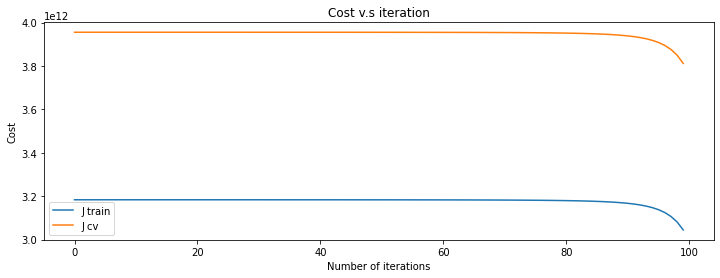

In [ ]:
#Running gradient descent
nn_p.reset_model()
nn_p.w,nn_p.b,J_train_history,J_cv_history = nn_p.gradient_descent()
plt.figure(figsize=(12,4))
plt.plot(J_train_history , label = "J train")
plt.plot(J_cv_history , label = "J cv")
plt.title("Cost v.s iteration")
plt.ylabel("Cost")
plt.xlabel("Number of iterations")
plt.legend()
plt.show()

Iteration : 0  Cost : 2990325298969.7104
Iteration : 10  Cost : 1701857488216.1174
Iteration : 20  Cost : 1522805128991.0107
Iteration : 30  Cost : 1482710753735.769
Iteration : 40  Cost : 1467889330349.898
Iteration : 50  Cost : 1460064654807.6323
Iteration : 60  Cost : 1455396229273.558
Iteration : 70  Cost : 1452273910283.8765
Iteration : 80  Cost : 1450039665185.2856
Iteration : 90  Cost : 1448369550280.747


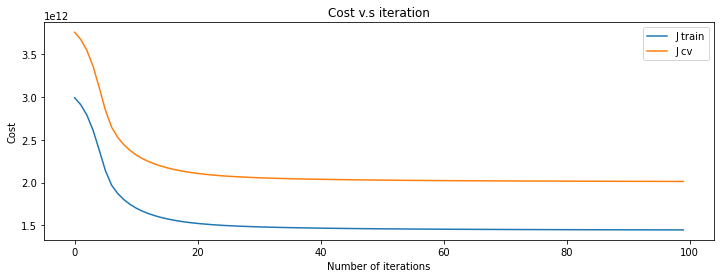

In [ ]:
nn_p.w,nn_p.b,J_train_history,J_cv_history = nn_p.gradient_descent()
plt.figure(figsize=(12,4))
plt.plot(J_train_history , label = "J train")
plt.plot(J_cv_history , label = "J cv")
plt.title("Cost v.s iteration")
plt.ylabel("Cost")
plt.xlabel("Number of iterations")
plt.legend()
plt.show()

Iteration : 0  Cost : 1447061769802.379
Iteration : 100  Cost : 81764321294.31145
Iteration : 200  Cost : 12264582737.319868
Iteration : 300  Cost : 5258980665.338381
Iteration : 400  Cost : 3736361963.730486
Iteration : 500  Cost : 2562194152.5098443
Iteration : 600  Cost : 2104278108.854472
Iteration : 700  Cost : 1504705077.7249162
Iteration : 800  Cost : 1215316801.5799
Iteration : 900  Cost : 997331536.1770265


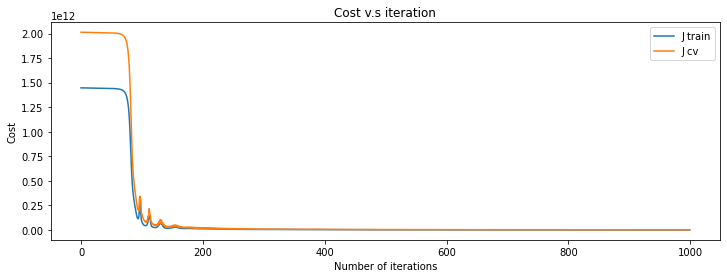

In [ ]:
nn_p.iters = 1000
nn_p.w,nn_p.b,J_train_history,J_cv_history = nn_p.gradient_descent()
plt.figure(figsize=(12,4))
plt.plot(J_train_history , label = "J train")
plt.plot(J_cv_history , label = "J cv")
plt.title("Cost v.s iteration")
plt.ylabel("Cost")
plt.xlabel("Number of iterations")
plt.legend()
plt.show()

Iteration : 0  Cost : 877872082.3322358
Iteration : 100  Cost : 763840564.203767
Iteration : 200  Cost : 689004816.217894
Iteration : 300  Cost : 633735702.3345405
Iteration : 400  Cost : 601579109.7289829
Iteration : 500  Cost : 560888880.3838322
Iteration : 600  Cost : 536638554.9416556
Iteration : 700  Cost : 519030990.6882034
Iteration : 800  Cost : 441152610.25278175
Iteration : 900  Cost : 403654194.9635543


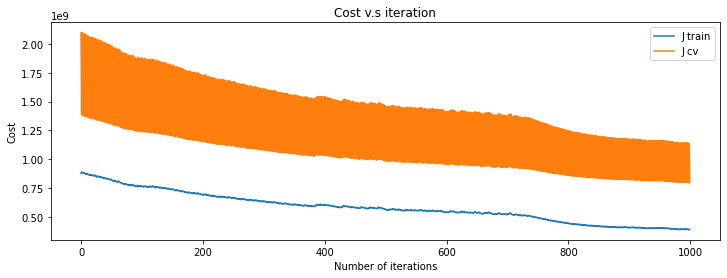

In [ ]:
nn_p.iters = 1000
nn_p.w,nn_p.b,J_train_history,J_cv_history = nn_p.gradient_descent()
plt.figure(figsize=(12,4))
plt.plot(J_train_history , label = "J train")
plt.plot(J_cv_history , label = "J cv")
plt.title("Cost v.s iteration")
plt.ylabel("Cost")
plt.xlabel("Number of iterations")
plt.legend()
plt.show()

Iteration : 0  Cost : 385609893.94813144
Iteration : 100  Cost : 353649562.70077056
Iteration : 200  Cost : 332354713.47357786
Iteration : 300  Cost : 308699839.0901404
Iteration : 400  Cost : 301568200.137541
Iteration : 500  Cost : 304966402.2091874
Iteration : 600  Cost : 282173432.26444435
Iteration : 700  Cost : 265488254.0492956
Iteration : 800  Cost : 257688315.4070604
Iteration : 900  Cost : 248887738.6565711


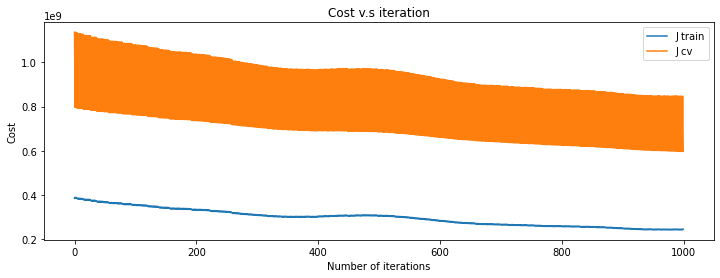

In [ ]:
nn_p.iters = 1000
nn_p.w,nn_p.b,J_train_history,J_cv_history = nn_p.gradient_descent()
plt.figure(figsize=(12,4))
plt.plot(J_train_history , label = "J train")
plt.plot(J_cv_history , label = "J cv")
plt.title("Cost v.s iteration")
plt.ylabel("Cost")
plt.xlabel("Number of iterations")
plt.legend()
plt.show()

Iteration : 0  Cost : 243857531.1980001
Iteration : 100  Cost : 248076149.84489077
Iteration : 200  Cost : 234922038.58921826
Iteration : 300  Cost : 218767019.84833848
Iteration : 400  Cost : 218716320.9800687
Iteration : 500  Cost : 217585974.61218646
Iteration : 600  Cost : 205450783.63869396
Iteration : 700  Cost : 200050429.59123844
Iteration : 800  Cost : 199860121.0918192
Iteration : 900  Cost : 193745395.28581342


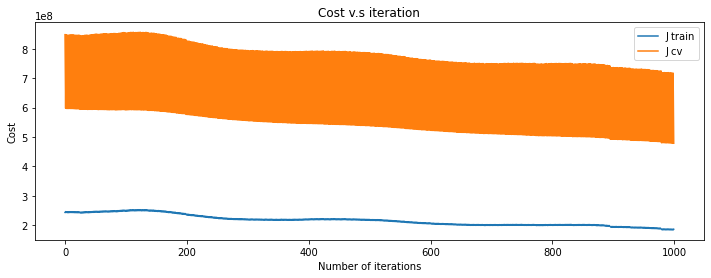

In [ ]:
nn_p.iters = 1000
nn_p.w,nn_p.b,J_train_history,J_cv_history = nn_p.gradient_descent()
plt.figure(figsize=(12,4))
plt.plot(J_train_history , label = "J train")
plt.plot(J_cv_history , label = "J cv")
plt.title("Cost v.s iteration")
plt.ylabel("Cost")
plt.xlabel("Number of iterations")
plt.legend()
plt.show()

Iteration : 0  Cost : 154019676.032477
Iteration : 100  Cost : 93916707.78173327
Iteration : 200  Cost : 93240498.68422365
Iteration : 300  Cost : 92834020.01512264
Iteration : 400  Cost : 92585092.2485921
Iteration : 500  Cost : 92342211.79898104
Iteration : 600  Cost : 92102809.42106342
Iteration : 700  Cost : 91871267.97042099
Iteration : 800  Cost : 91646518.03530759
Iteration : 900  Cost : 91423416.42961188


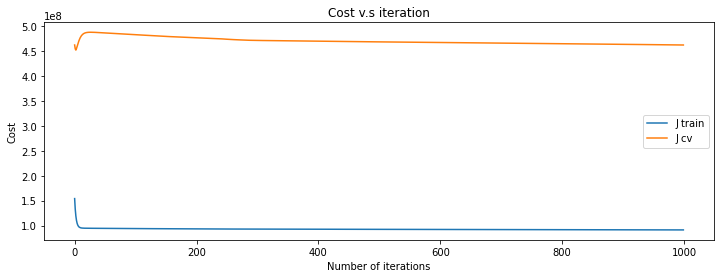

In [ ]:
nn_p.alpha = 0.0000000001
nn_p.iters = 1000
nn_p.w,nn_p.b,J_train_history,J_cv_history = nn_p.gradient_descent()
plt.figure(figsize=(12,4))
plt.plot(J_train_history , label = "J train")
plt.plot(J_cv_history , label = "J cv")
plt.title("Cost v.s iteration")
plt.ylabel("Cost")
plt.xlabel("Number of iterations")
plt.legend()
plt.show()

###Computing accuracy

In [ ]:
#Computing accuracy
print("Accuracy:",nn_p.accuracy()*100,"%")

###Making a prediction on test dataset

In [ ]:
#Now we load and print our test data
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/polynomial_test_data.csv") #Loading data from google drive
polynomial_test_data = np.array(df) #Converting loaded data in a matrix
test_id_p = polynomial_test_data[:,0] #Getting the Id's of all labels
test_id_p = test_id_p.reshape(test_id_p.size,1)
X_test_p = polynomial_test_data[:,1:] #Extracting X_test
# Printing the first 5 rows of our loaded data
print("Input:-\n",X_test_p[:5])
print("Shape of test data:-",X_test_p.shape)
print("Test Id's:-\n",test_id_p[:5])

Input:-
 [[ -961.62219071   789.96658017   -43.66047882]
 [ 3460.00513094   786.0925266   -144.09665669]
 [ 1648.28142716   241.98559957  -267.04082638]
 [-5361.10041917  1062.66977945  -199.00704273]
 [-2303.2086879   -248.18576782  -317.46895045]]
Shape of test data:- (20000, 3)
Test Id's:-
 [[78886.]
 [35987.]
 [63576.]
 [86537.]
 [45235.]]


In [ ]:
#Before making a prediction we first have to normalize our data
X_train_pm = get_terms(X_train_p,5)
X_train_pmn,mean,std_dev = z_score_normalization(X_train_pm)
X_test_pm = get_terms(X_test_p,5)
X_test_pmn = (X_test_pm -mean)/std_dev
nn_p.X = X_test_pmn
Y_test_prediction = nn_p.predict()
#We also append the id's of data with our prediction
prediction = np.append(test_id_p,Y_test_prediction,axis = 1)
print(prediction[:5])

[[   78886.            -4935.10059487]
 [   35987.           248048.65985447]
 [   63576.            17644.74438688]
 [   86537.         -2022141.12975916]
 [   45235.           -35642.17799029]]


Now finally we export our prediction back into a csv file

In [ ]:
dfp=pd.DataFrame(prediction) #Convert matrix to dataframe
dfp.columns = ["ids","prediction"] #Set labels to our dataframe
dfp.to_csv("neural_network_polynomial_test_prediction.csv",index=False)#Convert dataframe to csv file

Also for ease of acess we store our trained parameters w and b in npy files

In [ ]:
#These files can later be loaded using np.load()
np.savez("neural_network_polynomial_w",*nn_p.w)
np.savez("neural_network_polynomial_b",*nn_p.b)

In [ ]:
w_ans = np.load("neural_network_polynomial_w.npz")
b_ans = np.load("neural_network_polynomial_b.npz")
for i in range(len(w_ans)):
  print(f"Weight {i}:-\n",w_ans[f'arr_{i}'])
  print(f"Bias {i}:-\n",b_ans[f'arr_{i}'])

Weight 0:-
 [[ 1.79644461  2.03652129  1.00233951 ...  2.79363405 -1.77070151
   1.75935245]
 [-2.68202739 -0.26042284  1.50666377 ... -0.78823029 -2.23439039
   3.2553567 ]
 [ 2.53519526 -0.33846243 -0.91079199 ... -0.72025854  0.38209479
   0.05324931]
 ...
 [-0.18623248  2.08241336  1.19129117 ... -1.19961117  1.00130501
  -0.17872672]
 [-0.27811208 -3.0277134  -2.07372922 ... -0.7148735   0.4622676
  -0.94711082]
 [ 2.0086583  -0.14742833 -0.00532066 ... -0.13597307  1.62671413
  -0.559478  ]]
Bias 0:-
 [[ -5.16165252   0.48014376  -2.74896845   2.52204853  -0.46565265
   -1.25186733 -13.51400313  -2.86800231  -1.0871809    0.8382731
    0.12585355  -1.68725104  -0.32296074  -7.77885803 -13.54044357
   -0.98643002   0.73741871  -0.92505417   2.42980691  -1.08572642
   -2.20115823  -1.27117654  -0.05423427   1.22472422  -1.88808263
   -3.36842563  -0.28957397  -0.88388272 -27.20897693  -1.71740542
   -0.15105633  -1.42936278  -9.93243464   0.35958478 -20.96542218
   -0.72234935  -4.

###Classification neural network

In [ ]:
print(X_train_cn.shape)

(30000, 784)


In [ ]:
def gen_w_b(X,units):
  W_list = []
  b_list = []
  m,n = X.shape #m is no.of training examples
  np.random.seed(793)
  for i in range(len(units)):
    if i==0:
      W_list.append(0.1*(np.random.randn(n,units[0])-0.5))
    else:
      W_list.append(0.1*(np.random.randn(units[i-1],units[i])-0.5))
    b_list.append((1*np.random.randn(1,units[i])-0.5))
  return W_list,b_list

In [ ]:
#Defining the network
nn_c = NeuralNetwork(X_train_cn,Y_train_c,[10,10,10],["relu","relu","softmax"],"cross_entropy",0.1,1000,0.8,0.1)

In [ ]:
#Prediction
print(nn_c.predict())

[[7]
 [7]
 [7]
 ...
 [7]
 [7]
 [7]]


In [ ]:
#Computing cost
print(nn_c.compute_cost())

2.7263288889597166


Iteration : 0  Cost : 2.6666547727279784
Iteration : 100  Cost : 1.351281847619872
Iteration : 200  Cost : 1.0153407544602944
Iteration : 300  Cost : 0.8700699201824783
Iteration : 400  Cost : 0.752931521280235
Iteration : 500  Cost : 0.6600143634714806
Iteration : 600  Cost : 0.6076328484022292
Iteration : 700  Cost : 0.5617727960231554
Iteration : 800  Cost : 0.5281580062379065
Iteration : 900  Cost : 0.5087688194894587


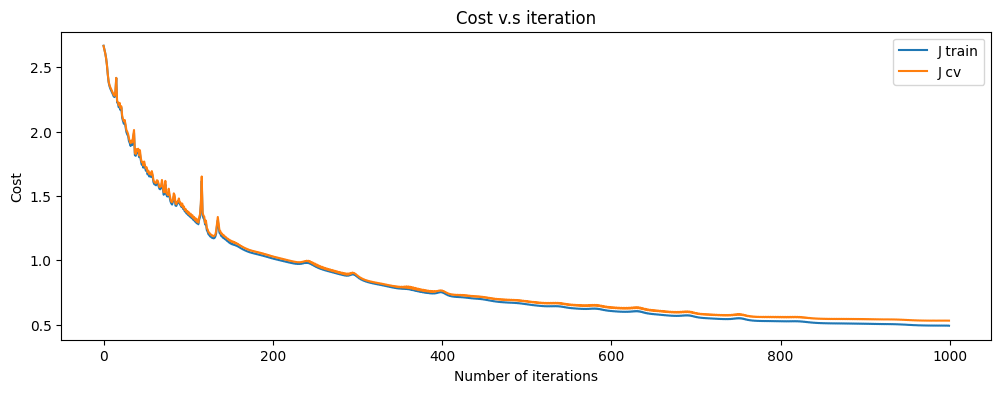

In [ ]:
#Running Gradient descent
nn_c.reset_model()
nn_c.w,nn_c.b,J_train_history,J_cv_history = nn_c.gradient_descent()
plt.figure(figsize=(12,4))
plt.plot(J_train_history , label = "J train")
plt.plot(J_cv_history , label = "J cv")
plt.title("Cost v.s iteration")
plt.ylabel("Cost")
plt.xlabel("Number of iterations")
plt.legend()
plt.show()

Iteration : 0  Cost : 0.49359167859226605
Iteration : 100  Cost : 0.4777278654660359
Iteration : 200  Cost : 0.46557181324720415
Iteration : 300  Cost : 0.4563112201764405
Iteration : 400  Cost : 0.447325412089145
Iteration : 500  Cost : 0.4373410337645584
Iteration : 600  Cost : 0.4296893733284794
Iteration : 700  Cost : 0.4216626842786334
Iteration : 800  Cost : 0.4143233648504558
Iteration : 900  Cost : 0.40930845171414787


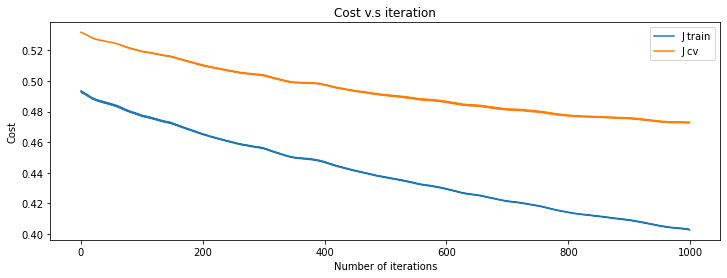

In [ ]:
nn_c.alpha=0.1
nn_c.w,nn_c.b,J_train_history,J_cv_history = nn_c.gradient_descent()
plt.figure(figsize=(12,4))
plt.plot(J_train_history , label = "J train")
plt.plot(J_cv_history , label = "J cv")
plt.title("Cost v.s iteration")
plt.ylabel("Cost")
plt.xlabel("Number of iterations")
plt.legend()
plt.show()

Iteration : 0  Cost : 0.4012911494686675
Iteration : 100  Cost : 0.3984923859933669
Iteration : 200  Cost : 0.3979115742946469
Iteration : 300  Cost : 0.39733847307476183
Iteration : 400  Cost : 0.39676185618080745
Iteration : 500  Cost : 0.39618704631480584
Iteration : 600  Cost : 0.39562382379193506
Iteration : 700  Cost : 0.3950632145912141
Iteration : 800  Cost : 0.39450860770247664
Iteration : 900  Cost : 0.3939701168363748


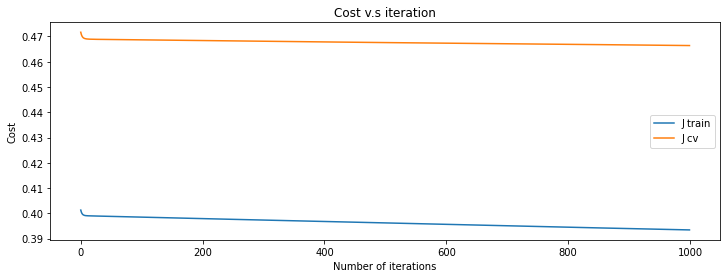

In [ ]:
nn_c.alpha=0.01
nn_c.w,nn_c.b,J_train_history,J_cv_history = nn_c.gradient_descent()
plt.figure(figsize=(12,4))
plt.plot(J_train_history , label = "J train")
plt.plot(J_cv_history , label = "J cv")
plt.title("Cost v.s iteration")
plt.ylabel("Cost")
plt.xlabel("Number of iterations")
plt.legend()
plt.show()

Iteration : 0  Cost : 0.3934367796575217
Iteration : 100  Cost : 0.3929132410326381
Iteration : 200  Cost : 0.39239939349986186
Iteration : 300  Cost : 0.3918909247147834
Iteration : 400  Cost : 0.39139106890148545
Iteration : 500  Cost : 0.39089697464465917
Iteration : 600  Cost : 0.3904085781587634
Iteration : 700  Cost : 0.3899204370346324
Iteration : 800  Cost : 0.3894383058910972
Iteration : 900  Cost : 0.3889624614665081


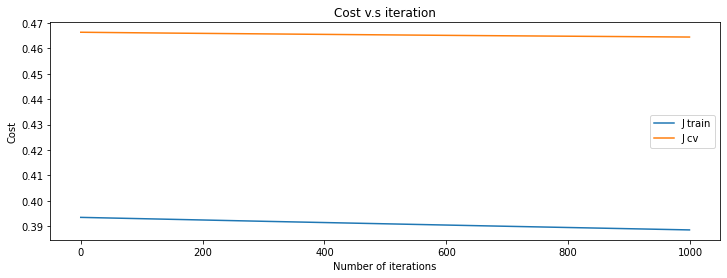

In [ ]:
nn_c.alpha=0.01
nn_c.iters=1000
nn_c.w,nn_c.b,J_train_history,J_cv_history = nn_c.gradient_descent()
plt.figure(figsize=(12,4))
plt.plot(J_train_history , label = "J train")
plt.plot(J_cv_history , label = "J cv")
plt.title("Cost v.s iteration")
plt.ylabel("Cost")
plt.xlabel("Number of iterations")
plt.legend()
plt.show()

Iteration : 0  Cost : 0.38849082210085756
Iteration : 100  Cost : 0.3880201088392639
Iteration : 200  Cost : 0.3875518129762226
Iteration : 300  Cost : 0.3870877278438795
Iteration : 400  Cost : 0.3866272886484327
Iteration : 500  Cost : 0.3861670993295365
Iteration : 600  Cost : 0.3857113593861062
Iteration : 700  Cost : 0.3852579519026044
Iteration : 800  Cost : 0.3848061494075668
Iteration : 900  Cost : 0.38435586673527217


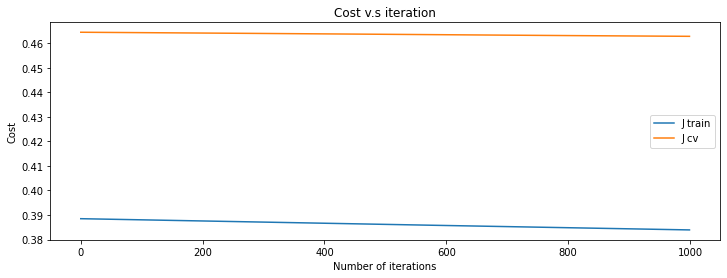

In [ ]:
nn_c.alpha=0.01
nn_c.iters = 1000
nn_c.w,nn_c.b,J_train_history,J_cv_history = nn_c.gradient_descent()
plt.figure(figsize=(12,4))
plt.plot(J_train_history , label = "J train")
plt.plot(J_cv_history , label = "J cv")
plt.title("Cost v.s iteration")
plt.ylabel("Cost")
plt.xlabel("Number of iterations")
plt.legend()
plt.show()

###Visualizing the performance of the classification neural network

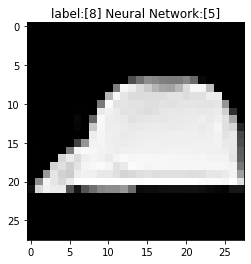

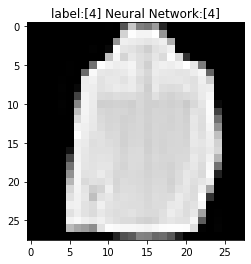

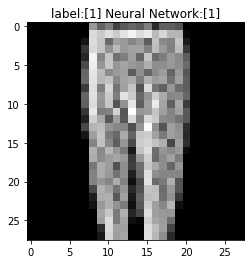

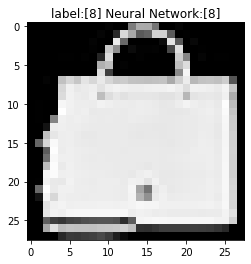

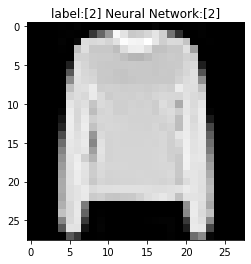

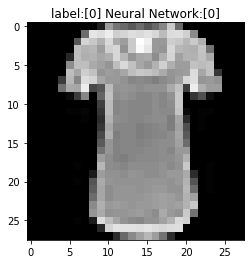

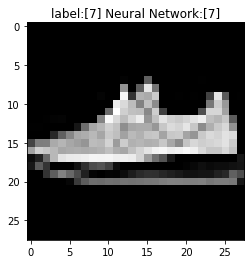

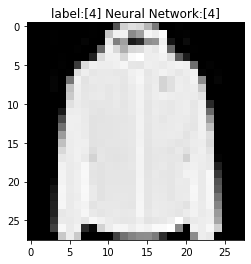

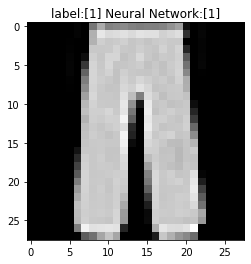

In [ ]:
for i in range(9):
  data = X_train_c[i].reshape(28,28)
  plt.imshow(data,cmap="Greys_r")
  Y_nn = nn_c.predict()
  plt.title(f"label:{Y_train_c[i]} Neural Network:{Y_nn[i]}")
  plt.show()

###Computing accuracy

In [ ]:
#Computing accuracy
print("Accuracy:",nn_c.accuracy()*100,"%")

###Making a prediction on test dataset

In [ ]:
#Now we load and print our test data
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/classification_test.csv") #Loading data from google drive
classification_test_data = np.array(df) #Converting loaded data in a matrix
test_id_c = classification_test_data[:,0] #Getting the Id's of all labels
test_id_c = test_id_c.reshape(test_id_c.size,1)
X_test_c = classification_test_data[:,1:] #Extracting X_test
# Printing the first 5 rows of our loaded data
print("Input:-\n",X_test_c[:5])
print("Shape of test data:-",X_test_c.shape)
print("Test Id's:-\n",test_id_c[:5])

Input:-
 [[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ... 56  0  0]
 [ 0  0  0 ...  0  0  0]]
Shape of test data:- (10000, 784)
Test Id's:-
 [[25672]
 [59964]
 [66230]
 [50801]
 [83307]]


In [ ]:
#Before making a prediction we first have to normalize our data
X_train_cn,mean,std_dev = z_score_normalization(X_train_c)
X_test_normalized = (X_test_c - mean)/std_dev
nn_c.X = X_test_normalized
Y_test_prediction = nn_c.predict()
#We also append the id's of data with our prediction
prediction = np.append(test_id_c,Y_test_prediction,axis = 1)
print(prediction[:5])

[[25672     0]
 [59964     1]
 [66230     2]
 [50801     6]
 [83307     3]]


In [ ]:
dfp=pd.DataFrame(prediction) #Convert matrix to dataframe
dfp.columns = ["ids","prediction"] #Set labels to our dataframe
dfp.to_csv("neural_network_classification_test_prediction.csv",index=False)#Convert dataframe to csv file

In [ ]:
#These files can later be loaded using np.load()
np.savez("neural_network_classification_w",*nn_c.w)
np.savez("neural_network_classification_b",*nn_c.b)

In [ ]:
w_ans = np.load("neural_network_classification_w.npz")
b_ans = np.load("neural_network_classification_b.npz")
for i in range(len(w_ans)):
  print(f"Weight {i}:-\n",w_ans[f'arr_{i}'])
  print(f"Bias {i}:-\n",b_ans[f'arr_{i}'])

Weight 0:-
 [[-0.11914845  0.03155535 -0.13057972 ... -0.17970445 -0.10839121
  -0.10947301]
 [-0.02029063  0.02244457 -0.209602   ...  0.03659483 -0.07157656
   0.03899897]
 [-0.02976522 -0.07005335  0.08056925 ... -0.2233862  -0.11888471
  -0.07615897]
 ...
 [-0.1549113  -0.10124373  0.04686185 ...  0.11208298 -0.00200963
  -0.02990471]
 [-0.06025719 -0.03365641 -0.07265976 ... -0.01016397  0.10154908
   0.00752983]
 [-0.00347085 -0.19543771  0.01676437 ... -0.17749072 -0.19013139
   0.02078938]]
Bias 0:-
 [[ 0.55592071 -0.23657113 -0.37869399 -1.49947364 -0.6364275  -1.6838306
  -0.75994289  0.36481042 -0.89266639  1.35002824]]
Weight 1:-
 [[-4.94926426e-02  2.52013841e-01 -1.57457860e-02 -3.50591955e-02
  -9.35465294e-02 -2.84153102e-01 -8.04129474e-02 -3.13470956e-01
  -1.50247153e-01  2.09733430e-01]
 [-1.86469541e-01 -5.63103306e-01  1.51353298e-01 -3.42601198e-02
  -6.84876077e-01 -9.03090578e-02  9.72586785e-02 -6.99413352e-02
  -2.47637032e-01 -2.35295481e-01]
 [-6.38874429e-